In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

s = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_1.xlsx')
s.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)
o = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_7.xlsx')
o.set_index('year_month', inplace=True)

In [3]:
df['Abstraction'] = w['Usage']
df['2526CC00033'] = s[' 2526CC00033']
df['D4N0127'] = s[' D4N0127']
df['D4N0146'] = s[' D4N0146']
df['D4N0147'] = s[' D4N0147']
df['D4N0148'] = s[' D4N0148']

In [4]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  2526CC00033  D4N0127  \
year_month                                                                
1950-01-01                NaN                 NaN          NaN      NaN   
1950-02-01                NaN                 NaN          NaN      NaN   
1950-03-01                NaN                 NaN          NaN      NaN   
1950-04-01                NaN                 NaN          NaN      NaN   
1950-05-01                NaN                 NaN          NaN      NaN   
...                       ...                 ...          ...      ...   
2019-08-01                NaN                 NaN     14.04337      NaN   
2019-09-01                NaN                 NaN     14.04000      NaN   
2019-10-01                NaN                 NaN          NaN      NaN   
2019-11-01                NaN                 NaN          NaN      NaN   
2019-12-01                NaN                 NaN          NaN      NaN   

            D4N0146  D4N0147  D4N0148  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ...  
2019-08-01      NaN      NaN      NaN  
2019-09-01      NaN  

In [5]:
df = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [6]:
df

2526CC00033  D4N0127  D4N0146  D4N0147  D4N0148  Temperature  \
year_month                                                                 
1950-01-01          NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01          NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01          NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01          NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01          NaN      NaN      NaN      NaN      NaN        14.60   
...                 ...      ...      ...      ...      ...          ...   
2019-08-01     14.04337      NaN      NaN      NaN      NaN          NaN   
2019-09-01     14.04000      NaN      NaN      NaN      NaN          NaN   
2019-10-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01          NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 9 columns]

In [7]:
f = lambda x: -x; 
gwls = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [8]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


2526CC00033    D4N0127    D4N0146    D4N0147    D4N0148
0  1977-01-01 1976-09-01 1977-01-01 1977-01-01 1977-01-01
1  2019-09-01 2005-01-01 2011-11-01 2015-06-01 2019-04-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [9]:

gwls = gwls[gwls.index > '1977-02-01']  
gwls = gwls[gwls.index < '2019-10-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

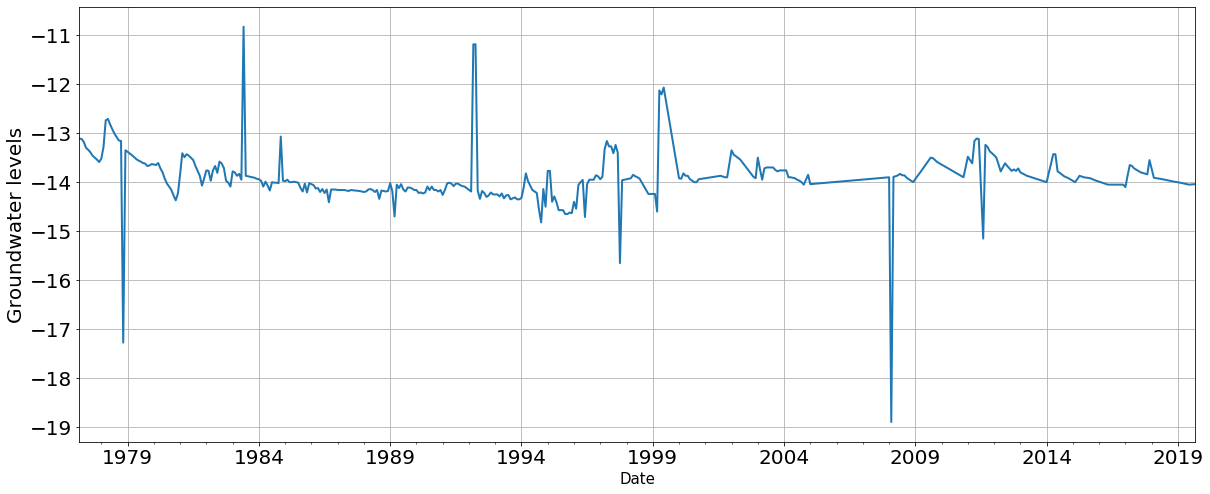

In [10]:
#visual illustration just to show all groundwater levels 

gwls['2526CC00033'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [11]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

2526CC00033  D4N0127  D4N0146    D4N0147    D4N0148  Temperature  \
year_month                                                                     
1977-03-01   -13.110000  -23.661    -7.19 -18.463667 -31.250889        20.70   
1977-04-01   -13.120000  -23.710    -7.31 -18.350000 -31.120000        19.60   
1977-05-01   -13.180000  -23.870    -7.17 -18.430000 -31.220000          NaN   
1977-06-01   -13.300000  -23.930    -7.30 -18.570000 -31.410000        12.75   
1977-07-01   -13.340000  -24.370    -7.35 -18.610000 -31.220000        12.30   
...                 ...      ...      ...        ...        ...          ...   
2019-05-01   -14.039667      NaN      NaN        NaN        NaN          NaN   
2019-06-01   -14.050000      NaN      NaN        NaN        NaN          NaN   
2019-07-01   -14.046739      NaN      NaN        NaN        NaN          NaN   
2019-08-01   -14.043370      NaN      NaN        NaN        NaN          NaN   
2019-09-01   -14.040000      NaN      NaN        NaN        NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1977-03-01     51.983333        NaN    436477.25  
1977-04-01     48.604167        NaN    436477.25  
1977-05-01     48.808333      1.406    436477.25  
1977-06-01     62.258333      1.207    436477.25  
1977-07-01     73.212500      1.163    436477.25  
...                  ...        ...          ...  
2019-05-01           NaN      0.234          NaN  
2019-06-01           NaN      0.237          NaN  
2019-07-01           NaN      0.234          NaN  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  

[511 rows x 9 columns]

### Reframing length of dataset based on bhid D4N0834 start and end dates 

In [12]:
pima = gwls.filter(['2526CC00033', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1976-12-01']  
pima = pima[pima.index < '2016-01-01'] 

In [13]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

2526CC00033      0
Temperature     12
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [14]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [15]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


2526CC00033 Temperature precip_trend  Discharge Abstraction
0  1977-03-01  1977-03-01   1977-03-01 1977-03-01  1977-03-01
1  2015-12-01  2015-12-01   2015-12-01 2015-12-01  2015-12-01

### Mutual information stats

In [16]:
from sklearn.feature_selection import mutual_info_regression

In [17]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['2526CC00033']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','2526CC00033','D4N0110' 

In [18]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.000000
precip_trend    0.326103
Discharge       0.750785
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [19]:
precip834  = pima.filter(['2526CC00033', 'precip_trend'])
discha834  = pima.filter(['2526CC00033', 'Discharge'])
temp834    = pima.filter(['2526CC00033', 'Temperature'])
abstr834   = pima.filter(['2526CC00033', 'Abstraction'])

In [20]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0834 = precip834.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip834[[ 'precip_trend']].shift(t) for t in lags for col in precip834})
# disharge
discha0834 = discha834.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha834[[ 'Discharge']].shift(t) for t in lags for col in discha834})
# temperature
temp0834 = temp834.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp834[[ 'Temperature']].shift(t) for t in lags for col in temp834})
# abstraction
abstr0834 = abstr834.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr834[[ 'Abstraction']].shift(t) for t in lags for col in abstr834})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

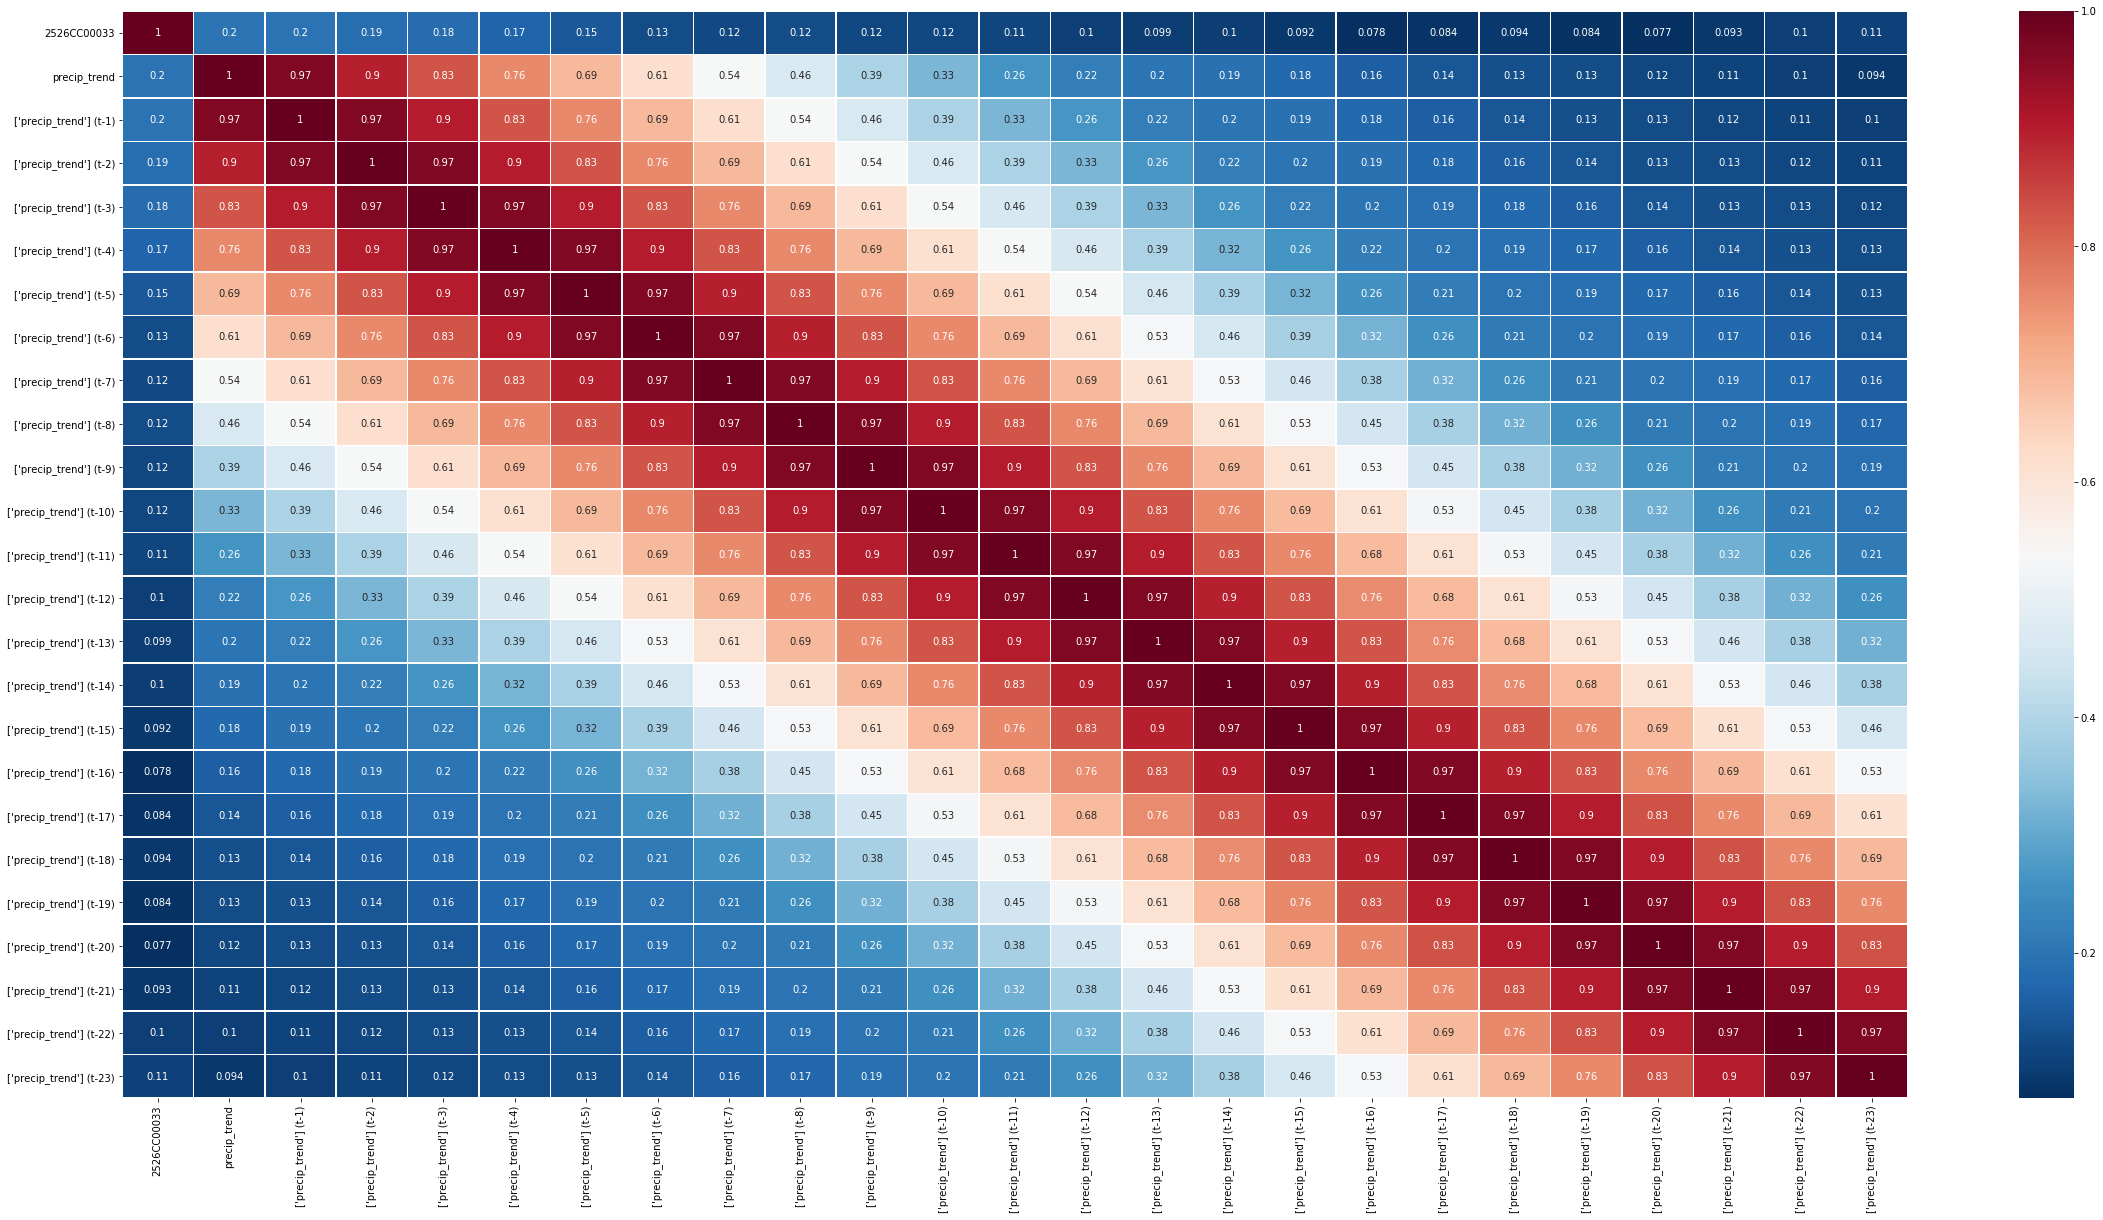

In [21]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

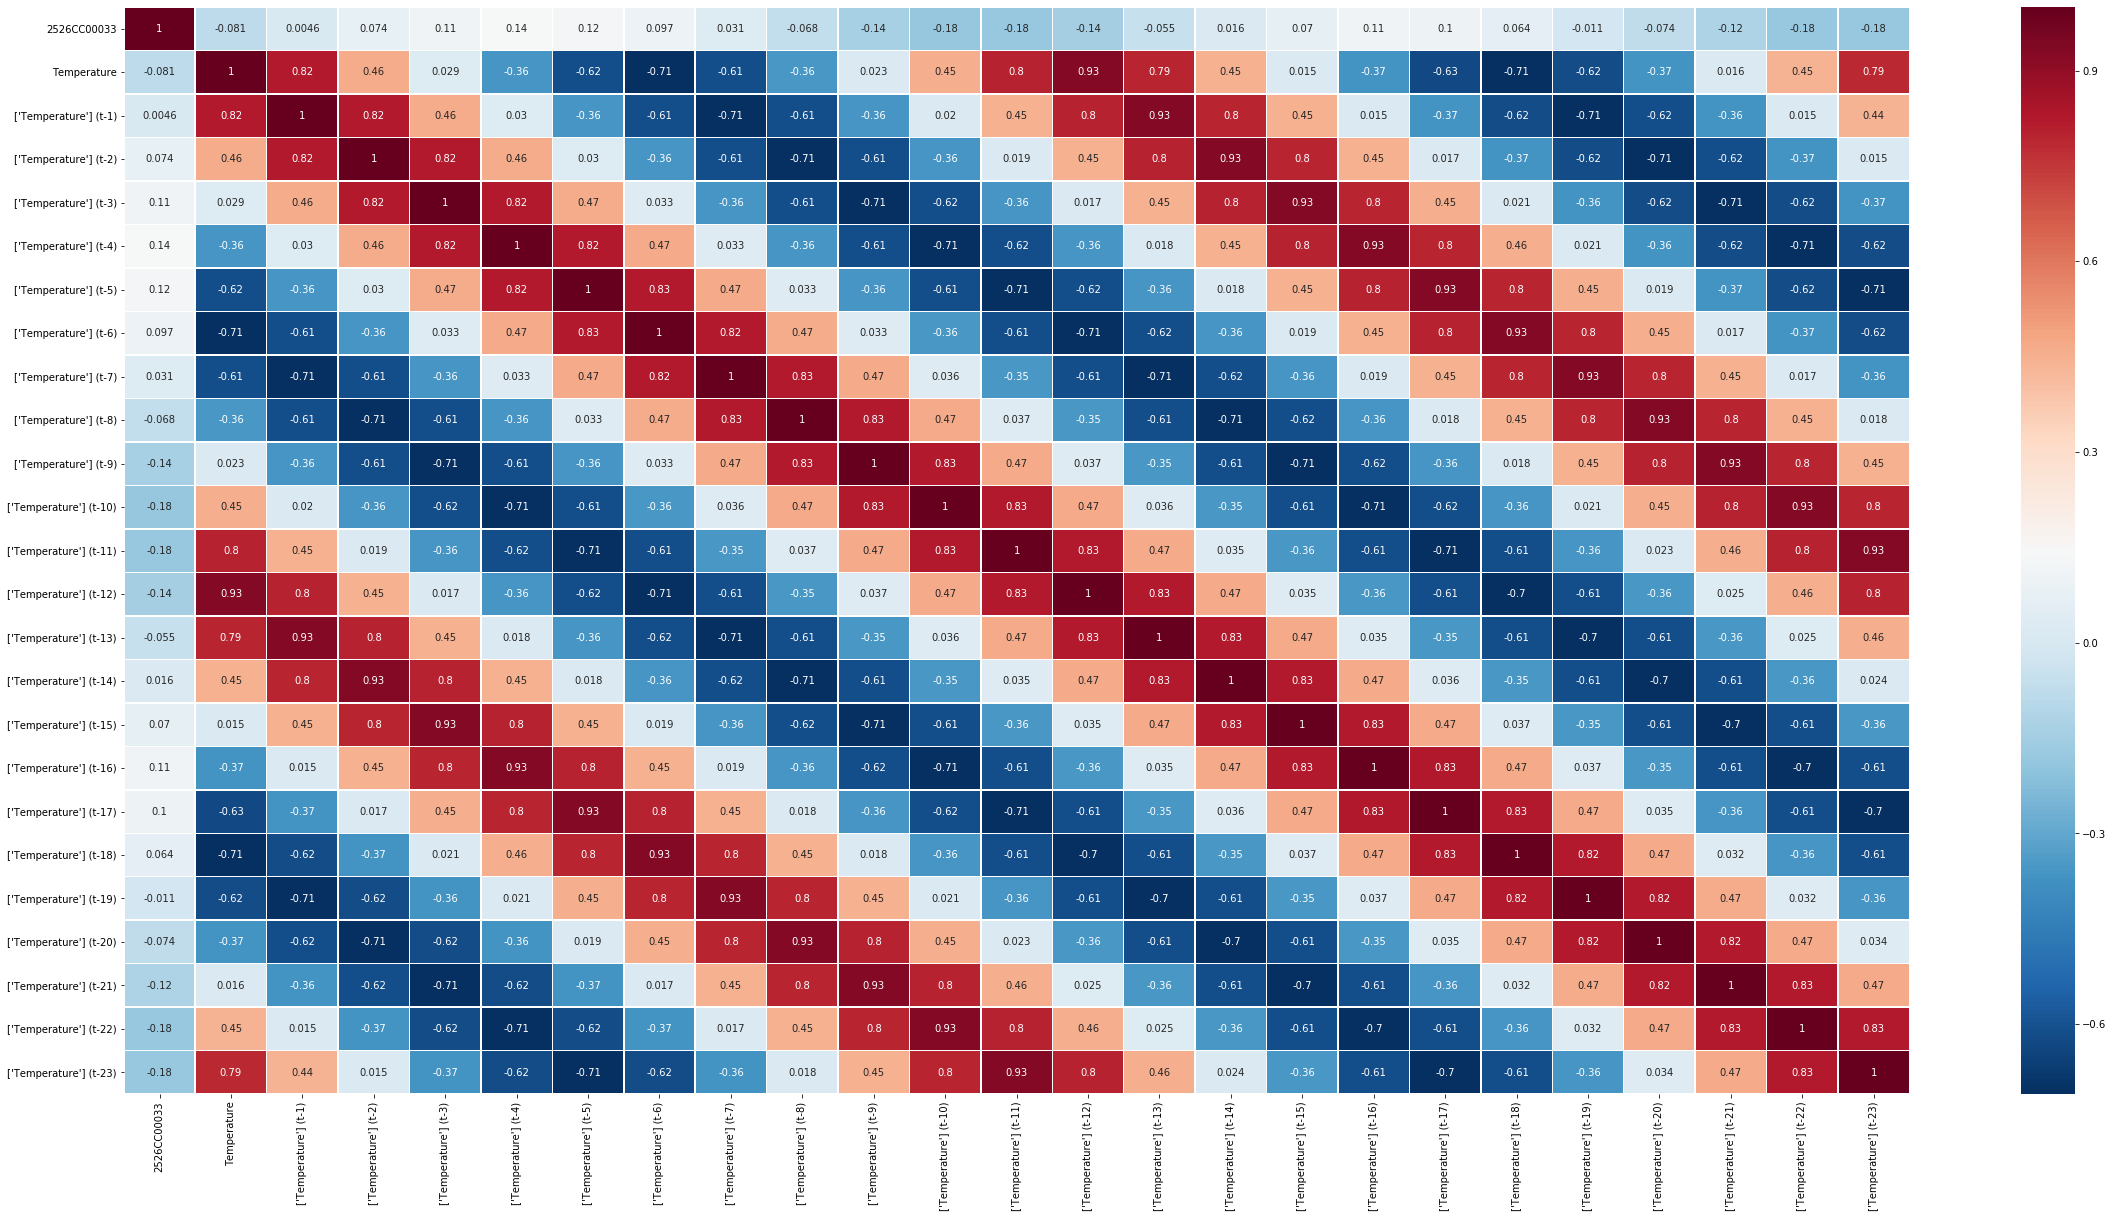

In [22]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0834.corr(method = 'spearman')
corrm2 = temp0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [23]:
pima['Temperature (t-5)'] = pima.Temperature.shift(4)
pima['precip_trend (t-16)'] = pima.precip_trend.shift(0)
pima

2526CC00033  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                   
1977-03-01   -13.110000    20.700000     51.983333      1.406    436477.25   
1977-04-01   -13.120000    19.600000     48.604167      1.406    436477.25   
1977-05-01   -13.180000    16.231148     48.808333      1.406    436477.25   
1977-06-01   -13.300000    12.750000     62.258333      1.207    436477.25   
1977-07-01   -13.340000    12.300000     73.212500      1.163    436477.25   
...                 ...          ...           ...        ...          ...   
2015-08-01   -13.913261    15.750000     34.150000      0.295   2598800.00   
2015-09-01   -13.920000    18.200000     35.208333      0.295   2598800.00   
2015-10-01   -13.939672    22.400000     38.425000      0.293   2598800.00   
2015-11-01   -13.960000    21.200000     42.875000      0.301   2598800.00   
2015-12-01   -13.974835    25.150000     45.775000      0.282   2598800.00   

            Temperature (t-5)  precip_trend (t-16)  
year_month                                          
1977-03-01                NaN            51.983333  
1977-04-01                NaN            48.604167  
1977-05-01                NaN            48.808333  
1977-06-01                NaN            62.258333  
1977-07-01              20.70            73.212500  
...                       ...                  ...  
2015-08-01              18.75            34.150000  
2015-09-01              15.70            35.208333  
2015-10-01              10.10            38.425000  
2015-11-01              11.40            42.875000  
2015-12-01              15.75            45.775000  

[466 rows x 7 columns]

In [24]:
X = pima[['Temperature (t-5)', 'precip_trend (t-16)', 'Discharge','Abstraction']] # Features
y = pima[['2526CC00033']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','2526CC00033','D4N0110' 

In [25]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [26]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-5)      0.128182
precip_trend (t-16)    0.321380
Discharge              0.753550
Abstraction            1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
rainfall = X['precip_trend (t-16)']
temperature = X['Temperature (t-5)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['2526CC00033']

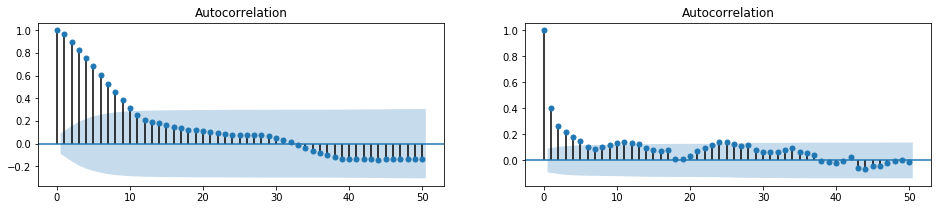

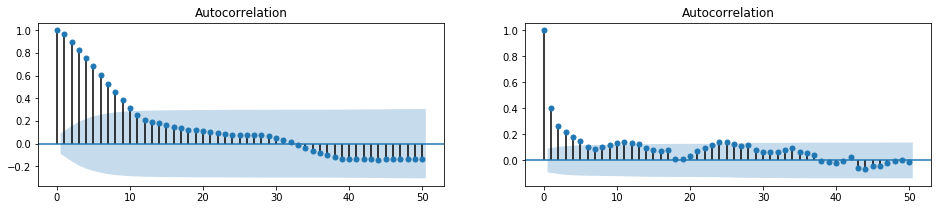

In [29]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

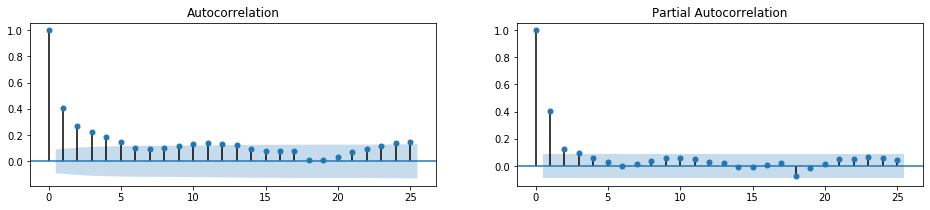

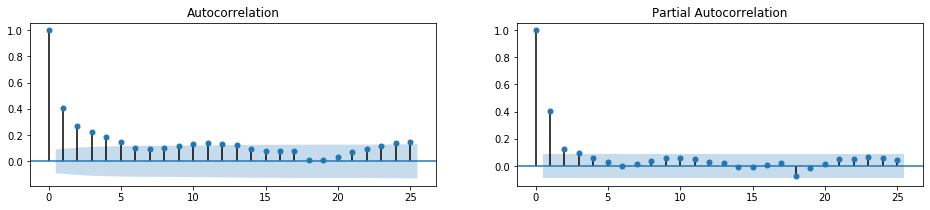

In [30]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

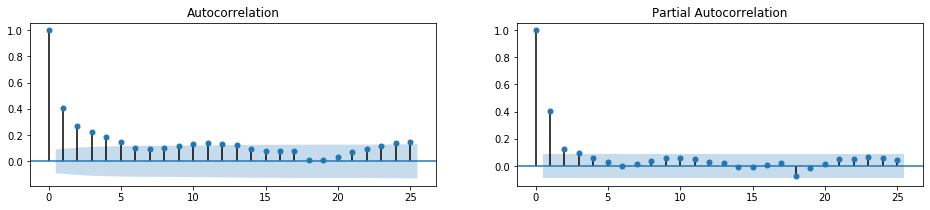

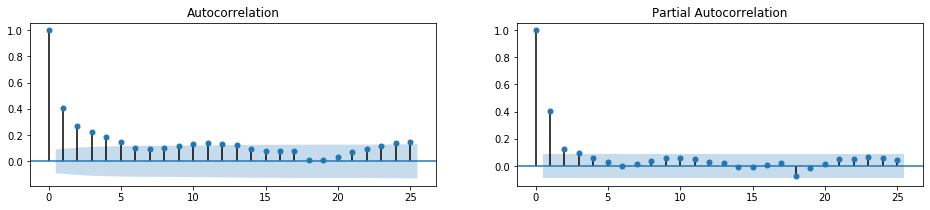

In [31]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

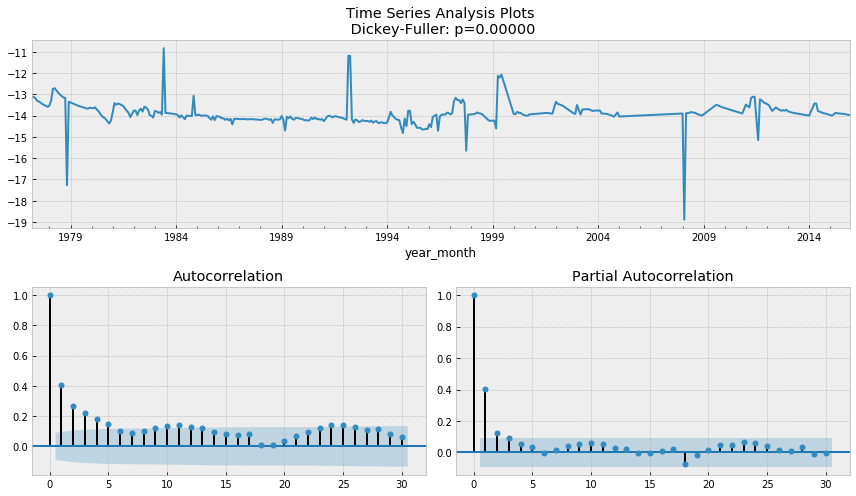

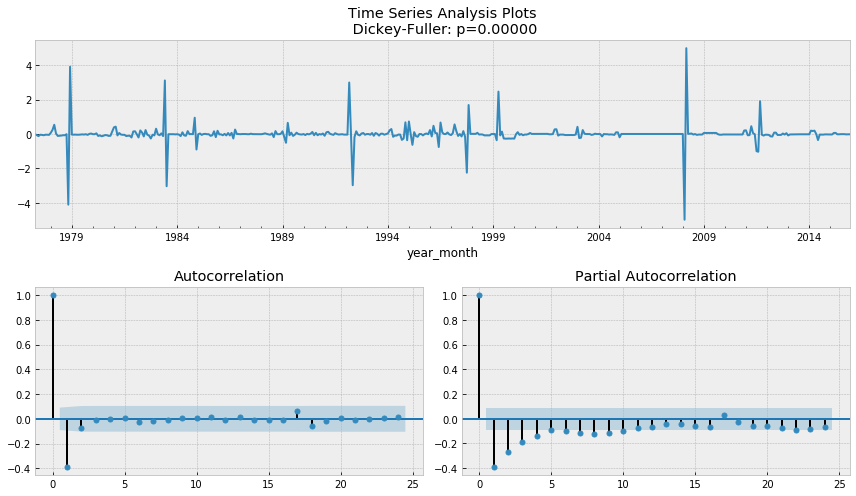

In [32]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0123_diff = bhid - bhid.shift(1)

tsplot(D4N0123_diff[1:], lags=24)

#### Rainfall

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


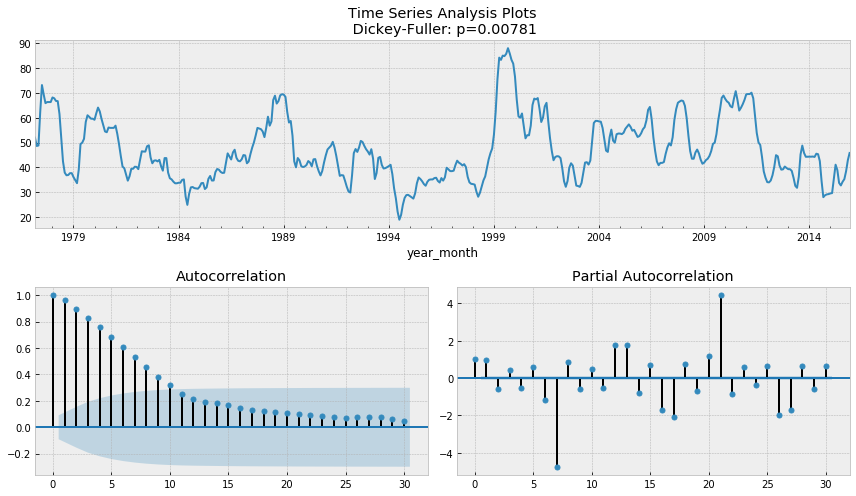

In [33]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

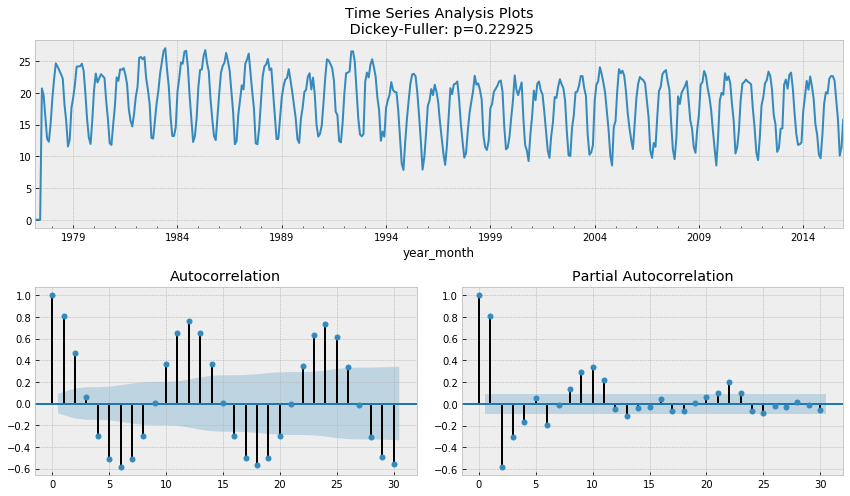

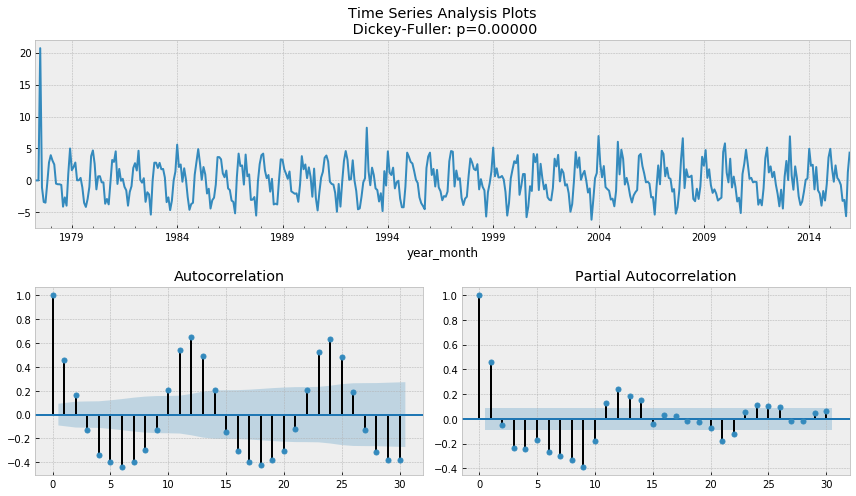

In [34]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

#Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)


tsplot(temp_diff[1:], lags=30)


#### Discharge

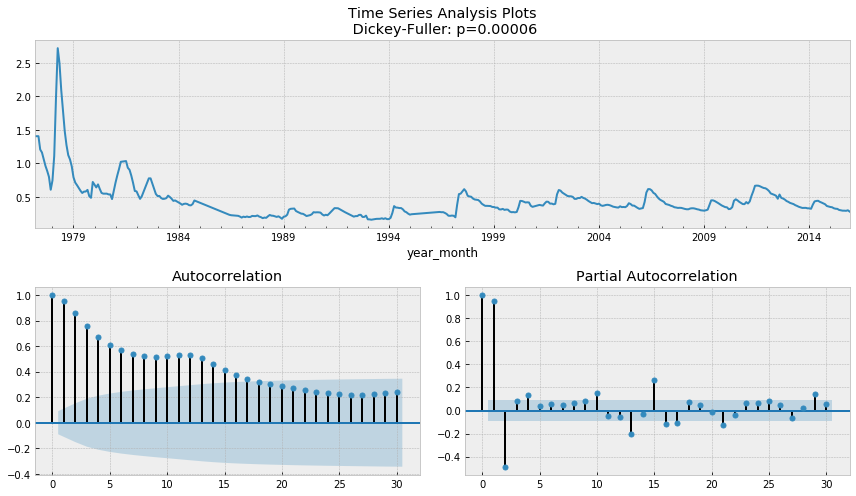

In [35]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

#### Usage

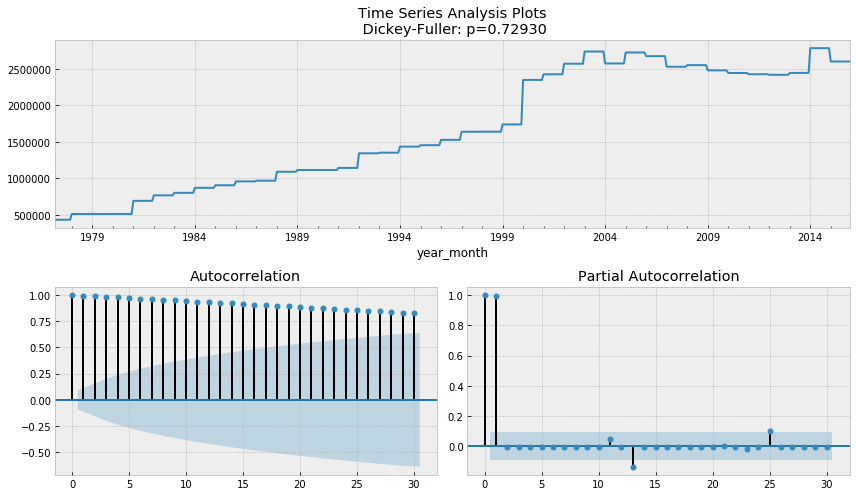

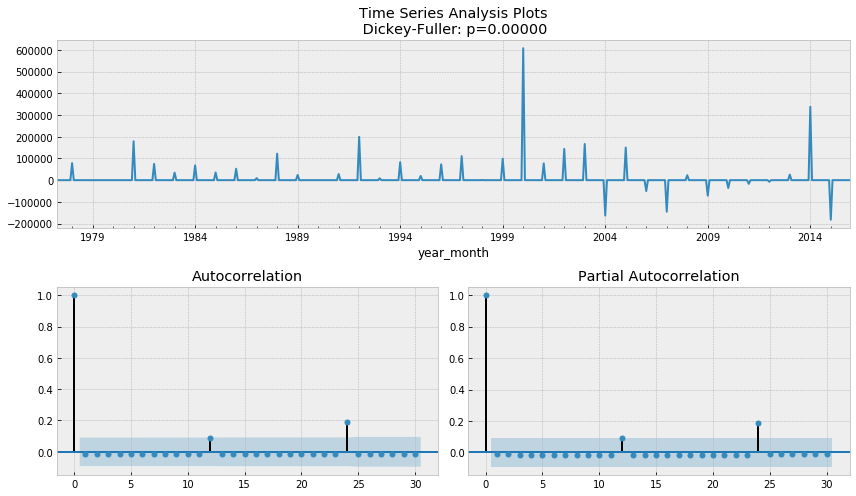

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [37]:
pima_diff = pd.DataFrame({'D4N0123': D4N0123_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': discharge, 'Abstraction': usage_diff}, columns=['D4N0123','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0123           1
Temperature       1
precip_trend    466
Discharge         0
Abstraction       1
dtype: int64

In [38]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','2526CC00033','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

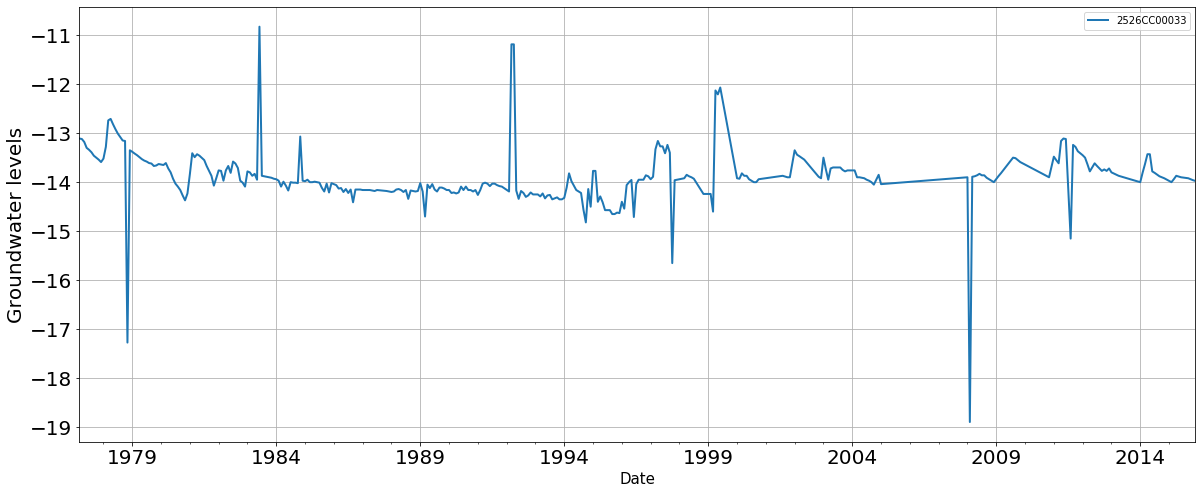

In [39]:
pima[['2526CC00033']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [40]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-16)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-5)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [41]:
pima

2526CC00033  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                   
1977-03-01   -13.110000    20.700000     51.983333      1.406    436477.25   
1977-04-01   -13.120000    19.600000     48.604167      1.406    436477.25   
1977-05-01   -13.180000    16.231148     48.808333      1.406    436477.25   
1977-06-01   -13.300000    12.750000     62.258333      1.207    436477.25   
1977-07-01   -13.340000    12.300000     73.212500      1.163    436477.25   
...                 ...          ...           ...        ...          ...   
2015-08-01   -13.913261    15.750000     34.150000      0.295   2598800.00   
2015-09-01   -13.920000    18.200000     35.208333      0.295   2598800.00   
2015-10-01   -13.939672    22.400000     38.425000      0.293   2598800.00   
2015-11-01   -13.960000    21.200000     42.875000      0.301   2598800.00   
2015-12-01   -13.974835    25.150000     45.775000      0.282   2598800.00   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1977-03-01                NaN            51.983333          4.969977   
1977-04-01                NaN            48.604167          4.904075   
1977-05-01                NaN            48.808333          4.908182   
1977-06-01                NaN            62.258333          5.147227   
1977-07-01              20.70            73.212500          5.306933   
...                       ...                  ...               ...   
2015-08-01              18.75            34.150000          4.559625   
2015-09-01              15.70            35.208333          4.589289   
2015-10-01              10.10            38.425000          4.674400   
2015-11-01              11.40            42.875000          4.781345   
2015-12-01              15.75            45.775000          4.845349   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1977-03-01              NaN       1.877966        13.986494  
1977-04-01              NaN       1.877966        13.986494  
1977-05-01              NaN       1.877966        13.986494  
1977-06-01              NaN       1.791634        13.986494  
1977-07-01         4.077312       1.771496        13.986494  
...                     ...            ...              ...  
2015-08-01         3.983153       1.258511        15.770561  
2015-09-01         3.815409       1.258511        15.770561  
2015-10-01         3.406945       1.256965        15.770561  
2015-11-01         3.517696       1.263133        15.770561  
2015-12-01         3.818398       1.248421        15.770561  

[466 rows x 11 columns]

In [42]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima['2526CC00033'].shift(obs)
pima.fillna(0, inplace=True)

In [43]:
pima

2526CC00033  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                   
1977-03-01   -13.110000    20.700000     51.983333      1.406    436477.25   
1977-04-01   -13.120000    19.600000     48.604167      1.406    436477.25   
1977-05-01   -13.180000    16.231148     48.808333      1.406    436477.25   
1977-06-01   -13.300000    12.750000     62.258333      1.207    436477.25   
1977-07-01   -13.340000    12.300000     73.212500      1.163    436477.25   
...                 ...          ...           ...        ...          ...   
2015-08-01   -13.913261    15.750000     34.150000      0.295   2598800.00   
2015-09-01   -13.920000    18.200000     35.208333      0.295   2598800.00   
2015-10-01   -13.939672    22.400000     38.425000      0.293   2598800.00   
2015-11-01   -13.960000    21.200000     42.875000      0.301   2598800.00   
2015-12-01   -13.974835    25.150000     45.775000      0.282   2598800.00   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1977-03-01               0.00            51.983333          4.969977   
1977-04-01               0.00            48.604167          4.904075   
1977-05-01               0.00            48.808333          4.908182   
1977-06-01               0.00            62.258333          5.147227   
1977-07-01              20.70            73.212500          5.306933   
...                       ...                  ...               ...   
2015-08-01              18.75            34.150000          4.559625   
2015-09-01              15.70            35.208333          4.589289   
2015-10-01              10.10            38.425000          4.674400   
2015-11-01              11.40            42.875000          4.781345   
2015-12-01              15.75            45.775000          4.845349   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1977-03-01         0.000000       1.877966        13.986494   0.000000   
1977-04-01         0.000000       1.877966        13.986494 -13.110000   
1977-05-01         0.000000       1.877966        13.986494 -13.120000   
1977-06-01         0.000000       1.791634        13.986494 -13.180000   
1977-07-01         4.077312       1.771496        13.986494 -13.300000   
...                     ...            ...              ...        ...   
2015-08-01         3.983153       1.258511        15.770561 -13.906522   
2015-09-01         3.815409       1.258511        15.770561 -13.913261   
2015-10-01         3.406945       1.256965        15.770561 -13.920000   
2015-11-01         3.517696       1.263133        15.770561 -13.939672   
2015-12-01         3.818398       1.248421        15.770561 -13.960000   

                  t_2        t_3        t_4  
year_month                                   
1977-03-01   0.000000   0.000000   0.000000  
1977-04-01   0.000000   0.000000   0.000000  
1977-05-01 -13.110000   0.000000   0.000000  
1977-06-01 -13.120000 -13.110000   0.000000  
1977-07-01 -13.180000 -13.120000 -13.110000  
...               ...        ...        ...  
2015-08-01 -13.900000 -13.884754 -13.870000  
2015-09-01 -13.906522 -13.900000 -13.884754  
2015-10-01 -13.913261 -13.906522 -13.900000  
2015-11-01 -13.920000 -13.913261 -13.906522  
2015-12-01 -13.939672 -13.920000 -13.913261  

[466 rows x 15 columns]

In [44]:
pima.shape

(466, 15)

In [45]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','2526CC00033']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [46]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['2526CC00033']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.056608
precip_trend_log    0.197217
Discharge_log       0.467450
Abstraction_log     0.626533
t_1                 1.000000
t_2                 0.690708
dtype: float64

In [47]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['2526CC00033'].values
y = y.reshape(-1,1)

In [48]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(389, 6) (389, 1)
(77, 6) (77, 1)


In [70]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [50]:
y_test[0]

array([0.74532449])

### LSTM

In [51]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorf

In [52]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(77, 6)

    #running function
    gwl = 0.74532449
    test_forecast = X_test
    steps_ahead = 77
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(389, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 389 samples, validate on 77 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/389 [======>.......................] - ETA: 6s - loss: 1.5639 - mean_squared_error: 1.5639
Epoch 00001: val_loss improved from inf to 0.32044, saving model to model.h5
389/389 [==============================] - 3s 7ms/sample - loss: 1.1166 - mean_squared_error: 1.1166 - val_loss: 0.3204 - val_mean_squared_error: 0.3204
Epoch 2/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9513 - mean_squared_error: 0.9513
Epoch 00002: val_loss improved from 0.32044 to 0.31534, saving model to model.h5
389/389 [==============================] - 0s 190us/sample - loss: 1.0583 - mean_squared_error: 1.0583 - val_loss: 0.3153 - val_mean_squared_error: 0.3153
Epoch 3/1000
 96/389 [======>........

Epoch 23/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7042 - mean_squared_error: 0.7042
Epoch 00023: val_loss improved from 0.26073 to 0.25868, saving model to model.h5
389/389 [==============================] - 0s 170us/sample - loss: 0.8794 - mean_squared_error: 0.8794 - val_loss: 0.2587 - val_mean_squared_error: 0.2587
Epoch 24/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0733 - mean_squared_error: 1.0733
Epoch 00024: val_loss did not improve from 0.25868
389/389 [==============================] - 0s 126us/sample - loss: 0.8763 - mean_squared_error: 0.8763 - val_loss: 0.2612 - val_mean_squared_error: 0.2612
Epoch 25/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6780 - mean_squared_error: 0.6780
Epoch 00025: val_loss did not improve from 0.25868
389/389 [==============================] - 0s 102us/sample - loss: 0.8807 - mean_squared_error: 0.8807 - val_loss: 0.2604 - val_mean_squared_error: 0.2604
Epoch 26/1000
 96/389 [==

Epoch 48/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3201 - mean_squared_error: 0.3201
Epoch 00048: val_loss did not improve from 0.23268
389/389 [==============================] - 0s 103us/sample - loss: 0.8434 - mean_squared_error: 0.8434 - val_loss: 0.2337 - val_mean_squared_error: 0.2337
Epoch 49/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5124 - mean_squared_error: 1.5124
Epoch 00049: val_loss did not improve from 0.23268
389/389 [==============================] - 0s 104us/sample - loss: 0.8434 - mean_squared_error: 0.8434 - val_loss: 0.2337 - val_mean_squared_error: 0.2337
Epoch 50/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5393 - mean_squared_error: 1.5393
Epoch 00050: val_loss improved from 0.23268 to 0.22936, saving model to model.h5
389/389 [==============================] - 0s 127us/sample - loss: 0.8361 - mean_squared_error: 0.8361 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 51/1000
 96/389 [==

Epoch 74/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6960 - mean_squared_error: 1.6960
Epoch 00074: val_loss did not improve from 0.22361
389/389 [==============================] - 0s 122us/sample - loss: 0.8064 - mean_squared_error: 0.8064 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 75/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2390 - mean_squared_error: 0.2390
Epoch 00075: val_loss did not improve from 0.22361
389/389 [==============================] - 0s 96us/sample - loss: 0.8124 - mean_squared_error: 0.8124 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 76/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1733 - mean_squared_error: 0.1733
Epoch 00076: val_loss did not improve from 0.22361
389/389 [==============================] - 0s 92us/sample - loss: 0.8100 - mean_squared_error: 0.8100 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 77/1000
 96/389 [======>.......................] - 

Epoch 100/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3236 - mean_squared_error: 0.3236
Epoch 00100: val_loss did not improve from 0.21448
389/389 [==============================] - 0s 114us/sample - loss: 0.7996 - mean_squared_error: 0.7996 - val_loss: 0.2147 - val_mean_squared_error: 0.2147
Epoch 101/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8256 - mean_squared_error: 1.8256
Epoch 00101: val_loss did not improve from 0.21448
389/389 [==============================] - 0s 100us/sample - loss: 0.7898 - mean_squared_error: 0.7898 - val_loss: 0.2157 - val_mean_squared_error: 0.2157
Epoch 102/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4922 - mean_squared_error: 0.4922
Epoch 00102: val_loss did not improve from 0.21448
389/389 [==============================] - 0s 98us/sample - loss: 0.7819 - mean_squared_error: 0.7819 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 103/1000
 96/389 [======>......................

Epoch 126/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8778 - mean_squared_error: 0.8778
Epoch 00126: val_loss did not improve from 0.21090
389/389 [==============================] - 0s 120us/sample - loss: 0.7766 - mean_squared_error: 0.7766 - val_loss: 0.2145 - val_mean_squared_error: 0.2145
Epoch 127/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1766 - mean_squared_error: 0.1766
Epoch 00127: val_loss did not improve from 0.21090
389/389 [==============================] - 0s 102us/sample - loss: 0.7725 - mean_squared_error: 0.7725 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 128/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8251 - mean_squared_error: 1.8251
Epoch 00128: val_loss did not improve from 0.21090
389/389 [==============================] - 0s 104us/sample - loss: 0.7742 - mean_squared_error: 0.7742 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 129/1000
 96/389 [======>.....................

Epoch 152/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5995 - mean_squared_error: 0.5995
Epoch 00152: val_loss improved from 0.20915 to 0.20907, saving model to model.h5
389/389 [==============================] - 0s 154us/sample - loss: 0.7718 - mean_squared_error: 0.7718 - val_loss: 0.2091 - val_mean_squared_error: 0.2091
Epoch 153/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9994 - mean_squared_error: 0.9994
Epoch 00153: val_loss did not improve from 0.20907
389/389 [==============================] - 0s 119us/sample - loss: 0.7608 - mean_squared_error: 0.7608 - val_loss: 0.2091 - val_mean_squared_error: 0.2091
Epoch 154/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0514 - mean_squared_error: 1.0514
Epoch 00154: val_loss improved from 0.20907 to 0.20900, saving model to model.h5
389/389 [==============================] - 0s 127us/sample - loss: 0.7655 - mean_squared_error: 0.7655 - val_loss: 0.2090 - val_mean_squared_error:

Epoch 178/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1350 - mean_squared_error: 0.1350
Epoch 00178: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 116us/sample - loss: 0.7546 - mean_squared_error: 0.7546 - val_loss: 0.2091 - val_mean_squared_error: 0.2091
Epoch 179/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4068 - mean_squared_error: 0.4068
Epoch 00179: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 111us/sample - loss: 0.7589 - mean_squared_error: 0.7589 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 180/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2914 - mean_squared_error: 0.2914
Epoch 00180: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 113us/sample - loss: 0.7513 - mean_squared_error: 0.7513 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 181/1000
 96/389 [======>.....................

Epoch 204/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4526 - mean_squared_error: 0.4526
Epoch 00204: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 190us/sample - loss: 0.7503 - mean_squared_error: 0.7503 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 205/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9378 - mean_squared_error: 0.9378
Epoch 00205: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 147us/sample - loss: 0.7424 - mean_squared_error: 0.7424 - val_loss: 0.2058 - val_mean_squared_error: 0.2058
Epoch 206/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3969 - mean_squared_error: 0.3969
Epoch 00206: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 145us/sample - loss: 0.7492 - mean_squared_error: 0.7492 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 207/1000
 96/389 [======>.....................

Epoch 230/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00230: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 96us/sample - loss: 0.7546 - mean_squared_error: 0.7546 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 231/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7466 - mean_squared_error: 0.7466
Epoch 00231: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 96us/sample - loss: 0.7519 - mean_squared_error: 0.7519 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 232/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3379 - mean_squared_error: 0.3379
Epoch 00232: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 88us/sample - loss: 0.7397 - mean_squared_error: 0.7397 - val_loss: 0.2077 - val_mean_squared_error: 0.2077
Epoch 233/1000
 96/389 [======>.......................]

Epoch 256/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6742 - mean_squared_error: 0.6742
Epoch 00256: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 124us/sample - loss: 0.7357 - mean_squared_error: 0.7357 - val_loss: 0.2124 - val_mean_squared_error: 0.2124
Epoch 257/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5858 - mean_squared_error: 0.5858
Epoch 00257: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 91us/sample - loss: 0.7459 - mean_squared_error: 0.7459 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 258/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3944 - mean_squared_error: 0.3944
Epoch 00258: val_loss did not improve from 0.20347
389/389 [==============================] - 0s 92us/sample - loss: 0.7498 - mean_squared_error: 0.7498 - val_loss: 0.2102 - val_mean_squared_error: 0.2102
Epoch 259/1000
 96/389 [======>.......................

Epoch 30/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2522 - mean_squared_error: 0.2522
Epoch 00030: val_loss improved from 0.25116 to 0.24919, saving model to model.h5
389/389 [==============================] - 0s 188us/sample - loss: 0.8710 - mean_squared_error: 0.8710 - val_loss: 0.2492 - val_mean_squared_error: 0.2492
Epoch 31/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2304 - mean_squared_error: 1.2304
Epoch 00031: val_loss improved from 0.24919 to 0.24738, saving model to model.h5
389/389 [==============================] - 0s 135us/sample - loss: 0.8665 - mean_squared_error: 0.8665 - val_loss: 0.2474 - val_mean_squared_error: 0.2474
Epoch 32/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2621 - mean_squared_error: 1.2621
Epoch 00032: val_loss improved from 0.24738 to 0.24709, saving model to model.h5
389/389 [==============================] - 0s 146us/sample - loss: 0.8675 - mean_squared_error: 0.8675 - val_loss: 0.247

Epoch 55/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1158 - mean_squared_error: 1.1158
Epoch 00055: val_loss did not improve from 0.21819
389/389 [==============================] - 0s 101us/sample - loss: 0.8279 - mean_squared_error: 0.8279 - val_loss: 0.2197 - val_mean_squared_error: 0.2197
Epoch 56/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8121 - mean_squared_error: 0.8121
Epoch 00056: val_loss did not improve from 0.21819
389/389 [==============================] - 0s 117us/sample - loss: 0.8213 - mean_squared_error: 0.8213 - val_loss: 0.2189 - val_mean_squared_error: 0.2189
Epoch 57/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9106 - mean_squared_error: 0.9106
Epoch 00057: val_loss did not improve from 0.21819
389/389 [==============================] - 0s 92us/sample - loss: 0.8246 - mean_squared_error: 0.8246 - val_loss: 0.2196 - val_mean_squared_error: 0.2196
Epoch 58/1000
 96/389 [======>.......................] -

Epoch 81/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2837 - mean_squared_error: 1.2837
Epoch 00081: val_loss improved from 0.21529 to 0.21513, saving model to model.h5
389/389 [==============================] - 0s 149us/sample - loss: 0.8096 - mean_squared_error: 0.8096 - val_loss: 0.2151 - val_mean_squared_error: 0.2151
Epoch 82/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1468 - mean_squared_error: 0.1468
Epoch 00082: val_loss did not improve from 0.21513
389/389 [==============================] - 0s 96us/sample - loss: 0.8072 - mean_squared_error: 0.8072 - val_loss: 0.2161 - val_mean_squared_error: 0.2161
Epoch 83/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8568 - mean_squared_error: 0.8568
Epoch 00083: val_loss did not improve from 0.21513
389/389 [==============================] - 0s 96us/sample - loss: 0.8046 - mean_squared_error: 0.8046 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 84/1000
 96/389 [====

Epoch 107/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6967 - mean_squared_error: 0.6967
Epoch 00107: val_loss did not improve from 0.21053
389/389 [==============================] - 0s 94us/sample - loss: 0.7909 - mean_squared_error: 0.7909 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 108/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6101 - mean_squared_error: 0.6101
Epoch 00108: val_loss did not improve from 0.21053
389/389 [==============================] - 0s 97us/sample - loss: 0.7773 - mean_squared_error: 0.7773 - val_loss: 0.2156 - val_mean_squared_error: 0.2156
Epoch 109/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2459 - mean_squared_error: 1.2459
Epoch 00109: val_loss did not improve from 0.21053
389/389 [==============================] - 0s 100us/sample - loss: 0.7825 - mean_squared_error: 0.7825 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 110/1000
 96/389 [======>.......................

Epoch 133/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4554 - mean_squared_error: 0.4554
Epoch 00133: val_loss did not improve from 0.21053
389/389 [==============================] - 0s 106us/sample - loss: 0.7734 - mean_squared_error: 0.7734 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 134/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5720 - mean_squared_error: 0.5720
Epoch 00134: val_loss did not improve from 0.21053
389/389 [==============================] - 0s 99us/sample - loss: 0.7754 - mean_squared_error: 0.7754 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 135/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5623 - mean_squared_error: 0.5623
Epoch 00135: val_loss improved from 0.21053 to 0.20897, saving model to model.h5
389/389 [==============================] - 0s 133us/sample - loss: 0.7752 - mean_squared_error: 0.7752 - val_loss: 0.2090 - val_mean_squared_error: 0.2090
Epoch 136/1000
 96/389 

Epoch 159/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2225 - mean_squared_error: 0.2225
Epoch 00159: val_loss did not improve from 0.20484
389/389 [==============================] - 0s 121us/sample - loss: 0.7618 - mean_squared_error: 0.7618 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 160/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2788 - mean_squared_error: 0.2788
Epoch 00160: val_loss did not improve from 0.20484
389/389 [==============================] - 0s 101us/sample - loss: 0.7607 - mean_squared_error: 0.7607 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 161/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1434 - mean_squared_error: 0.1434
Epoch 00161: val_loss did not improve from 0.20484
389/389 [==============================] - 0s 103us/sample - loss: 0.7619 - mean_squared_error: 0.7619 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 162/1000
 96/389 [======>.....................

Epoch 185/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9874 - mean_squared_error: 0.9874
Epoch 00185: val_loss did not improve from 0.20484
389/389 [==============================] - 0s 98us/sample - loss: 0.7594 - mean_squared_error: 0.7594 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 186/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5812 - mean_squared_error: 1.5812
Epoch 00186: val_loss did not improve from 0.20484
389/389 [==============================] - 0s 129us/sample - loss: 0.7563 - mean_squared_error: 0.7563 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 187/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1626 - mean_squared_error: 0.1626
Epoch 00187: val_loss did not improve from 0.20484
389/389 [==============================] - 0s 98us/sample - loss: 0.7721 - mean_squared_error: 0.7721 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 188/1000
 96/389 [======>.......................

Epoch 211/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7589 - mean_squared_error: 0.7589
Epoch 00211: val_loss improved from 0.20442 to 0.20419, saving model to model.h5
389/389 [==============================] - 0s 145us/sample - loss: 0.7556 - mean_squared_error: 0.7556 - val_loss: 0.2042 - val_mean_squared_error: 0.2042
Epoch 212/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9865 - mean_squared_error: 0.9865
Epoch 00212: val_loss did not improve from 0.20419
389/389 [==============================] - 0s 131us/sample - loss: 0.7465 - mean_squared_error: 0.7465 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 213/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5934 - mean_squared_error: 1.5934
Epoch 00213: val_loss did not improve from 0.20419
389/389 [==============================] - 0s 101us/sample - loss: 0.7392 - mean_squared_error: 0.7392 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 214/1000
 96/389

Epoch 237/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9779 - mean_squared_error: 0.9779
Epoch 00237: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 113us/sample - loss: 0.7548 - mean_squared_error: 0.7548 - val_loss: 0.2077 - val_mean_squared_error: 0.2077
Epoch 238/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1905 - mean_squared_error: 0.1905
Epoch 00238: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 110us/sample - loss: 0.7496 - mean_squared_error: 0.7496 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 239/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6413 - mean_squared_error: 0.6413
Epoch 00239: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 94us/sample - loss: 0.7440 - mean_squared_error: 0.7440 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 240/1000
 96/389 [======>......................

Epoch 263/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0678 - mean_squared_error: 1.0678
Epoch 00263: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 125us/sample - loss: 0.7420 - mean_squared_error: 0.7420 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 264/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6378 - mean_squared_error: 1.6378
Epoch 00264: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 129us/sample - loss: 0.7453 - mean_squared_error: 0.7453 - val_loss: 0.2055 - val_mean_squared_error: 0.2055
Epoch 265/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9774 - mean_squared_error: 0.9774
Epoch 00265: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 92us/sample - loss: 0.7309 - mean_squared_error: 0.7309 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 266/1000
 96/389 [======>......................

Epoch 289/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7569 - mean_squared_error: 0.7569
Epoch 00289: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 105us/sample - loss: 0.7262 - mean_squared_error: 0.7262 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 290/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7909 - mean_squared_error: 0.7909
Epoch 00290: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 100us/sample - loss: 0.7341 - mean_squared_error: 0.7341 - val_loss: 0.2082 - val_mean_squared_error: 0.2082
Epoch 291/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0775 - mean_squared_error: 1.0775
Epoch 00291: val_loss did not improve from 0.20309
389/389 [==============================] - 0s 99us/sample - loss: 0.7286 - mean_squared_error: 0.7286 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 292/1000
 96/389 [======>......................

Epoch 315/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4311 - mean_squared_error: 0.4311
Epoch 00315: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 98us/sample - loss: 0.7322 - mean_squared_error: 0.7322 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 316/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 00316: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 99us/sample - loss: 0.7377 - mean_squared_error: 0.7377 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 317/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4800 - mean_squared_error: 1.4800
Epoch 00317: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 119us/sample - loss: 0.7264 - mean_squared_error: 0.7264 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 318/1000
 96/389 [======>.......................

Epoch 341/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9276 - mean_squared_error: 0.9276
Epoch 00341: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 95us/sample - loss: 0.7302 - mean_squared_error: 0.7302 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 342/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1523 - mean_squared_error: 0.1523
Epoch 00342: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 98us/sample - loss: 0.7233 - mean_squared_error: 0.7233 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 343/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5468 - mean_squared_error: 1.5468
Epoch 00343: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 93us/sample - loss: 0.7218 - mean_squared_error: 0.7218 - val_loss: 0.2130 - val_mean_squared_error: 0.2130
Epoch 344/1000
 96/389 [======>.......................]

Epoch 367/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1334 - mean_squared_error: 0.1334
Epoch 00367: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 129us/sample - loss: 0.7173 - mean_squared_error: 0.7173 - val_loss: 0.2195 - val_mean_squared_error: 0.2195
Epoch 368/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7362 - mean_squared_error: 1.7362
Epoch 00368: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 118us/sample - loss: 0.7249 - mean_squared_error: 0.7249 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 369/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5701 - mean_squared_error: 0.5701
Epoch 00369: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 97us/sample - loss: 0.7212 - mean_squared_error: 0.7212 - val_loss: 0.2162 - val_mean_squared_error: 0.2162
Epoch 370/1000
 96/389 [======>......................

Epoch 393/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0636 - mean_squared_error: 1.0636
Epoch 00393: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 96us/sample - loss: 0.7213 - mean_squared_error: 0.7213 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 394/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9415 - mean_squared_error: 0.9415
Epoch 00394: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 95us/sample - loss: 0.7136 - mean_squared_error: 0.7136 - val_loss: 0.2130 - val_mean_squared_error: 0.2130
Epoch 395/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2322 - mean_squared_error: 1.2322
Epoch 00395: val_loss did not improve from 0.20115
389/389 [==============================] - 0s 99us/sample - loss: 0.7230 - mean_squared_error: 0.7230 - val_loss: 0.2119 - val_mean_squared_error: 0.2119
Epoch 396/1000
 96/389 [======>.......................]

Epoch 16/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1448 - mean_squared_error: 0.1448
Epoch 00016: val_loss improved from 0.27599 to 0.27245, saving model to model.h5
389/389 [==============================] - 0s 185us/sample - loss: 0.8929 - mean_squared_error: 0.8929 - val_loss: 0.2725 - val_mean_squared_error: 0.2725
Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4749 - mean_squared_error: 1.4749
Epoch 00017: val_loss did not improve from 0.27245
389/389 [==============================] - 0s 146us/sample - loss: 0.8867 - mean_squared_error: 0.8867 - val_loss: 0.2729 - val_mean_squared_error: 0.2729
Epoch 18/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9201 - mean_squared_error: 0.9201
Epoch 00018: val_loss did not improve from 0.27245
389/389 [==============================] - 0s 133us/sample - loss: 0.8877 - mean_squared_error: 0.8877 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 19/1000
 96/389 [==

Epoch 41/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9067 - mean_squared_error: 0.9067
Epoch 00041: val_loss improved from 0.23780 to 0.23648, saving model to model.h5
389/389 [==============================] - 0s 130us/sample - loss: 0.8410 - mean_squared_error: 0.8410 - val_loss: 0.2365 - val_mean_squared_error: 0.2365
Epoch 42/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5664 - mean_squared_error: 0.5664
Epoch 00042: val_loss improved from 0.23648 to 0.23474, saving model to model.h5
389/389 [==============================] - 0s 159us/sample - loss: 0.8432 - mean_squared_error: 0.8432 - val_loss: 0.2347 - val_mean_squared_error: 0.2347
Epoch 43/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2615 - mean_squared_error: 1.2615
Epoch 00043: val_loss improved from 0.23474 to 0.23211, saving model to model.h5
389/389 [==============================] - 0s 137us/sample - loss: 0.8392 - mean_squared_error: 0.8392 - val_loss: 0.232

Epoch 92/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7469 - mean_squared_error: 0.7469
Epoch 00092: val_loss improved from 0.21254 to 0.21181, saving model to model.h5
389/389 [==============================] - 0s 147us/sample - loss: 0.7843 - mean_squared_error: 0.7843 - val_loss: 0.2118 - val_mean_squared_error: 0.2118
Epoch 93/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1200 - mean_squared_error: 0.1200
Epoch 00093: val_loss did not improve from 0.21181
389/389 [==============================] - 0s 91us/sample - loss: 0.7880 - mean_squared_error: 0.7880 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 94/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7266 - mean_squared_error: 0.7266
Epoch 00094: val_loss did not improve from 0.21181
389/389 [==============================] - 0s 101us/sample - loss: 0.7827 - mean_squared_error: 0.7827 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 95/1000
 96/389 [===

Epoch 118/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6450 - mean_squared_error: 0.6450
Epoch 00118: val_loss did not improve from 0.20951
389/389 [==============================] - 0s 93us/sample - loss: 0.7704 - mean_squared_error: 0.7704 - val_loss: 0.2108 - val_mean_squared_error: 0.2108
Epoch 119/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1545 - mean_squared_error: 0.1545
Epoch 00119: val_loss did not improve from 0.20951
389/389 [==============================] - 0s 97us/sample - loss: 0.7734 - mean_squared_error: 0.7734 - val_loss: 0.2106 - val_mean_squared_error: 0.2106
Epoch 120/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 00120: val_loss did not improve from 0.20951
389/389 [==============================] - 0s 100us/sample - loss: 0.7674 - mean_squared_error: 0.7674 - val_loss: 0.2105 - val_mean_squared_error: 0.2105
Epoch 121/1000
 96/389 [======>.......................

Epoch 144/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1264 - mean_squared_error: 0.1264
Epoch 00144: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 97us/sample - loss: 0.7693 - mean_squared_error: 0.7693 - val_loss: 0.2107 - val_mean_squared_error: 0.2107
Epoch 145/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7386 - mean_squared_error: 0.7386
Epoch 00145: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 98us/sample - loss: 0.7587 - mean_squared_error: 0.7587 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 146/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1466 - mean_squared_error: 1.1466
Epoch 00146: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 96us/sample - loss: 0.7616 - mean_squared_error: 0.7616 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 147/1000
 96/389 [======>.......................]

Epoch 170/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8324 - mean_squared_error: 0.8324
Epoch 00170: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 101us/sample - loss: 0.7704 - mean_squared_error: 0.7704 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 171/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9564 - mean_squared_error: 0.9564
Epoch 00171: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 93us/sample - loss: 0.7474 - mean_squared_error: 0.7474 - val_loss: 0.2053 - val_mean_squared_error: 0.2053
Epoch 172/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9276 - mean_squared_error: 0.9276
Epoch 00172: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 97us/sample - loss: 0.7662 - mean_squared_error: 0.7662 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 173/1000
 96/389 [======>.......................

Epoch 196/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0510 - mean_squared_error: 1.0510
Epoch 00196: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 99us/sample - loss: 0.7364 - mean_squared_error: 0.7364 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 197/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8322 - mean_squared_error: 0.8322
Epoch 00197: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 101us/sample - loss: 0.7501 - mean_squared_error: 0.7501 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 198/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3671 - mean_squared_error: 0.3671
Epoch 00198: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 93us/sample - loss: 0.7434 - mean_squared_error: 0.7434 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 199/1000
 96/389 [======>.......................

Epoch 222/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0558 - mean_squared_error: 1.0558
Epoch 00222: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 105us/sample - loss: 0.7444 - mean_squared_error: 0.7444 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 223/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5311 - mean_squared_error: 1.5311
Epoch 00223: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 102us/sample - loss: 0.7468 - mean_squared_error: 0.7468 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 224/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1433 - mean_squared_error: 0.1433
Epoch 00224: val_loss did not improve from 0.20322
389/389 [==============================] - 0s 100us/sample - loss: 0.7397 - mean_squared_error: 0.7397 - val_loss: 0.2047 - val_mean_squared_error: 0.2047
Epoch 225/1000
 96/389 [======>.....................

Epoch 16/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3025 - mean_squared_error: 1.3025
Epoch 00016: val_loss improved from 0.29902 to 0.29747, saving model to model.h5
389/389 [==============================] - 0s 165us/sample - loss: 0.9021 - mean_squared_error: 0.9021 - val_loss: 0.2975 - val_mean_squared_error: 0.2975
Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8362 - mean_squared_error: 0.8362
Epoch 00017: val_loss improved from 0.29747 to 0.29102, saving model to model.h5
389/389 [==============================] - 0s 138us/sample - loss: 0.8972 - mean_squared_error: 0.8972 - val_loss: 0.2910 - val_mean_squared_error: 0.2910
Epoch 18/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1327 - mean_squared_error: 0.1327
Epoch 00018: val_loss improved from 0.29102 to 0.28657, saving model to model.h5
389/389 [==============================] - 0s 140us/sample - loss: 0.8906 - mean_squared_error: 0.8906 - val_loss: 0.286

Epoch 66/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6794 - mean_squared_error: 0.6794
Epoch 00066: val_loss improved from 0.22725 to 0.22602, saving model to model.h5
389/389 [==============================] - 0s 135us/sample - loss: 0.8189 - mean_squared_error: 0.8189 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 67/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2056 - mean_squared_error: 0.2056
Epoch 00067: val_loss did not improve from 0.22602
389/389 [==============================] - 0s 96us/sample - loss: 0.8251 - mean_squared_error: 0.8251 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 68/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6038 - mean_squared_error: 1.6038
Epoch 00068: val_loss did not improve from 0.22602
389/389 [==============================] - 0s 109us/sample - loss: 0.8175 - mean_squared_error: 0.8175 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 69/1000
 96/389 [===

Epoch 117/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3171 - mean_squared_error: 0.3171
Epoch 00117: val_loss did not improve from 0.21401
389/389 [==============================] - 0s 97us/sample - loss: 0.7752 - mean_squared_error: 0.7752 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 118/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4415 - mean_squared_error: 0.4415
Epoch 00118: val_loss did not improve from 0.21401
389/389 [==============================] - 0s 98us/sample - loss: 0.7823 - mean_squared_error: 0.7823 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 119/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2475 - mean_squared_error: 1.2475
Epoch 00119: val_loss did not improve from 0.21401
389/389 [==============================] - 0s 93us/sample - loss: 0.7839 - mean_squared_error: 0.7839 - val_loss: 0.2171 - val_mean_squared_error: 0.2171
Epoch 120/1000
 96/389 [======>.......................]

Epoch 143/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8814 - mean_squared_error: 0.8814
Epoch 00143: val_loss did not improve from 0.20755
389/389 [==============================] - 0s 106us/sample - loss: 0.7620 - mean_squared_error: 0.7620 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 144/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0939 - mean_squared_error: 0.0939
Epoch 00144: val_loss improved from 0.20755 to 0.20717, saving model to model.h5
389/389 [==============================] - 0s 157us/sample - loss: 0.7665 - mean_squared_error: 0.7665 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 145/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4180 - mean_squared_error: 0.4180
Epoch 00145: val_loss improved from 0.20717 to 0.20676, saving model to model.h5
389/389 [==============================] - 0s 136us/sample - loss: 0.7814 - mean_squared_error: 0.7814 - val_loss: 0.2068 - val_mean_squared_error:

Epoch 169/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3043 - mean_squared_error: 0.3043
Epoch 00169: val_loss did not improve from 0.20527
389/389 [==============================] - 0s 202us/sample - loss: 0.7637 - mean_squared_error: 0.7637 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 170/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7471 - mean_squared_error: 1.7471
Epoch 00170: val_loss did not improve from 0.20527
389/389 [==============================] - 0s 131us/sample - loss: 0.7577 - mean_squared_error: 0.7577 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 171/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7996 - mean_squared_error: 0.7996
Epoch 00171: val_loss did not improve from 0.20527
389/389 [==============================] - 0s 129us/sample - loss: 0.7494 - mean_squared_error: 0.7494 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 172/1000
384/389 [============================

Epoch 195/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00195: val_loss improved from 0.20238 to 0.20037, saving model to model.h5
389/389 [==============================] - 0s 146us/sample - loss: 0.7575 - mean_squared_error: 0.7575 - val_loss: 0.2004 - val_mean_squared_error: 0.2004
Epoch 196/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0290 - mean_squared_error: 1.0290
Epoch 00196: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 100us/sample - loss: 0.7417 - mean_squared_error: 0.7417 - val_loss: 0.2010 - val_mean_squared_error: 0.2010
Epoch 197/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4906 - mean_squared_error: 0.4906
Epoch 00197: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 103us/sample - loss: 0.7629 - mean_squared_error: 0.7629 - val_loss: 0.2027 - val_mean_squared_error: 0.2027
Epoch 198/1000
 96/389

Epoch 221/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2287 - mean_squared_error: 1.2287
Epoch 00221: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 124us/sample - loss: 0.7621 - mean_squared_error: 0.7621 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 222/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3429 - mean_squared_error: 1.3429
Epoch 00222: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 94us/sample - loss: 0.7449 - mean_squared_error: 0.7449 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 223/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.9621 - mean_squared_error: 1.9621
Epoch 00223: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 97us/sample - loss: 0.7470 - mean_squared_error: 0.7470 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 224/1000
 96/389 [======>.......................

Epoch 247/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 00247: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 104us/sample - loss: 0.7605 - mean_squared_error: 0.7605 - val_loss: 0.2067 - val_mean_squared_error: 0.2067
Epoch 248/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1897 - mean_squared_error: 1.1897
Epoch 00248: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 115us/sample - loss: 0.7390 - mean_squared_error: 0.7390 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 249/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4108 - mean_squared_error: 1.4108
Epoch 00249: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 102us/sample - loss: 0.7485 - mean_squared_error: 0.7485 - val_loss: 0.2068 - val_mean_squared_error: 0.2068
Epoch 250/1000
 96/389 [======>.....................

Epoch 273/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3865 - mean_squared_error: 1.3865
Epoch 00273: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 99us/sample - loss: 0.7441 - mean_squared_error: 0.7441 - val_loss: 0.2044 - val_mean_squared_error: 0.2044
Epoch 274/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1707 - mean_squared_error: 0.1707
Epoch 00274: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 101us/sample - loss: 0.7449 - mean_squared_error: 0.7449 - val_loss: 0.2039 - val_mean_squared_error: 0.2039
Epoch 275/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3348 - mean_squared_error: 0.3348
Epoch 00275: val_loss did not improve from 0.20037
389/389 [==============================] - 0s 119us/sample - loss: 0.7435 - mean_squared_error: 0.7435 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 276/1000
 96/389 [======>......................

Epoch 4/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5170 - mean_squared_error: 0.5170
Epoch 00004: val_loss improved from 0.34791 to 0.34044, saving model to model.h5
389/389 [==============================] - 0s 129us/sample - loss: 1.0190 - mean_squared_error: 1.0190 - val_loss: 0.3404 - val_mean_squared_error: 0.3404
Epoch 5/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4547 - mean_squared_error: 0.4547
Epoch 00005: val_loss did not improve from 0.34044
389/389 [==============================] - 0s 101us/sample - loss: 0.9992 - mean_squared_error: 0.9992 - val_loss: 0.3428 - val_mean_squared_error: 0.3428
Epoch 6/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1604 - mean_squared_error: 1.1604
Epoch 00006: val_loss improved from 0.34044 to 0.33933, saving model to model.h5
389/389 [==============================] - 0s 141us/sample - loss: 0.9709 - mean_squared_error: 0.9709 - val_loss: 0.3393 - val_mean_squared_error: 0.339

Epoch 53/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2153 - mean_squared_error: 1.2153
Epoch 00053: val_loss did not improve from 0.23789
389/389 [==============================] - 0s 101us/sample - loss: 0.8446 - mean_squared_error: 0.8446 - val_loss: 0.2389 - val_mean_squared_error: 0.2389
Epoch 54/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.2089 - mean_squared_error: 2.2089
Epoch 00054: val_loss did not improve from 0.23789
389/389 [==============================] - 0s 139us/sample - loss: 0.8355 - mean_squared_error: 0.8355 - val_loss: 0.2384 - val_mean_squared_error: 0.2384
Epoch 55/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.9858 - mean_squared_error: 1.9858
Epoch 00055: val_loss improved from 0.23789 to 0.23657, saving model to model.h5
389/389 [==============================] - 0s 141us/sample - loss: 0.8357 - mean_squared_error: 0.8357 - val_loss: 0.2366 - val_mean_squared_error: 0.2366
Epoch 56/1000
 96/389 [==

 96/389 [======>.......................] - ETA: 0s - loss: 1.2129 - mean_squared_error: 1.2129
Epoch 00103: val_loss did not improve from 0.21738
389/389 [==============================] - 0s 98us/sample - loss: 0.7827 - mean_squared_error: 0.7827 - val_loss: 0.2224 - val_mean_squared_error: 0.2224
Epoch 104/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.9093 - mean_squared_error: 1.9093
Epoch 00104: val_loss did not improve from 0.21738
389/389 [==============================] - 0s 101us/sample - loss: 0.7803 - mean_squared_error: 0.7803 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 105/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2146 - mean_squared_error: 1.2146
Epoch 00105: val_loss did not improve from 0.21738
389/389 [==============================] - 0s 105us/sample - loss: 0.7859 - mean_squared_error: 0.7859 - val_loss: 0.2180 - val_mean_squared_error: 0.2180
Epoch 106/1000
 96/389 [======>.......................] - ETA: 0s - 

Epoch 129/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1767 - mean_squared_error: 0.1767
Epoch 00129: val_loss did not improve from 0.20996
389/389 [==============================] - 0s 95us/sample - loss: 0.7699 - mean_squared_error: 0.7699 - val_loss: 0.2120 - val_mean_squared_error: 0.2120
Epoch 130/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7411 - mean_squared_error: 0.7411
Epoch 00130: val_loss did not improve from 0.20996
389/389 [==============================] - 0s 100us/sample - loss: 0.7768 - mean_squared_error: 0.7768 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 131/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4571 - mean_squared_error: 0.4571
Epoch 00131: val_loss did not improve from 0.20996
389/389 [==============================] - 0s 97us/sample - loss: 0.7673 - mean_squared_error: 0.7673 - val_loss: 0.2111 - val_mean_squared_error: 0.2111
Epoch 132/1000
 96/389 [======>.......................

Epoch 155/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8980 - mean_squared_error: 0.8980
Epoch 00155: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 97us/sample - loss: 0.7679 - mean_squared_error: 0.7679 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 156/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1916 - mean_squared_error: 1.1916
Epoch 00156: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 95us/sample - loss: 0.7740 - mean_squared_error: 0.7740 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 157/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1346 - mean_squared_error: 0.1346
Epoch 00157: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 116us/sample - loss: 0.7664 - mean_squared_error: 0.7664 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 158/1000
 96/389 [======>.......................

Epoch 181/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3560 - mean_squared_error: 0.3560
Epoch 00181: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 99us/sample - loss: 0.7584 - mean_squared_error: 0.7584 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 182/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4082 - mean_squared_error: 0.4082
Epoch 00182: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 99us/sample - loss: 0.7487 - mean_squared_error: 0.7487 - val_loss: 0.2138 - val_mean_squared_error: 0.2138
Epoch 183/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7656 - mean_squared_error: 0.7656
Epoch 00183: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 92us/sample - loss: 0.7512 - mean_squared_error: 0.7512 - val_loss: 0.2107 - val_mean_squared_error: 0.2107
Epoch 184/1000
 96/389 [======>.......................]

Epoch 207/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9572 - mean_squared_error: 0.9572
Epoch 00207: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 95us/sample - loss: 0.7606 - mean_squared_error: 0.7606 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 208/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3684 - mean_squared_error: 1.3684
Epoch 00208: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 98us/sample - loss: 0.7509 - mean_squared_error: 0.7509 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 209/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6118 - mean_squared_error: 0.6118
Epoch 00209: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 99us/sample - loss: 0.7585 - mean_squared_error: 0.7585 - val_loss: 0.2087 - val_mean_squared_error: 0.2087
Epoch 210/1000
 96/389 [======>.......................]

Epoch 233/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.0830 - mean_squared_error: 2.0830
Epoch 00233: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 103us/sample - loss: 0.7420 - mean_squared_error: 0.7420 - val_loss: 0.2057 - val_mean_squared_error: 0.2057
Epoch 234/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5821 - mean_squared_error: 0.5821
Epoch 00234: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 119us/sample - loss: 0.7529 - mean_squared_error: 0.7529 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 235/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2797 - mean_squared_error: 0.2797
Epoch 00235: val_loss did not improve from 0.20196
389/389 [==============================] - 0s 100us/sample - loss: 0.7543 - mean_squared_error: 0.7543 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 236/1000
 96/389 [======>.....................

Epoch 15/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6729 - mean_squared_error: 0.6729
Epoch 00015: val_loss did not improve from 0.28543
389/389 [==============================] - 0s 95us/sample - loss: 0.8924 - mean_squared_error: 0.8924 - val_loss: 0.2880 - val_mean_squared_error: 0.2880
Epoch 16/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8264 - mean_squared_error: 1.8264
Epoch 00016: val_loss improved from 0.28543 to 0.28502, saving model to model.h5
389/389 [==============================] - 0s 139us/sample - loss: 0.8863 - mean_squared_error: 0.8863 - val_loss: 0.2850 - val_mean_squared_error: 0.2850
Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5837 - mean_squared_error: 0.5837
Epoch 00017: val_loss improved from 0.28502 to 0.28315, saving model to model.h5
389/389 [==============================] - 0s 131us/sample - loss: 0.8824 - mean_squared_error: 0.8824 - val_loss: 0.2832 - val_mean_squared_error: 0.2

Epoch 65/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4857 - mean_squared_error: 1.4857
Epoch 00065: val_loss did not improve from 0.23024
389/389 [==============================] - 0s 110us/sample - loss: 0.8242 - mean_squared_error: 0.8242 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 66/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5923 - mean_squared_error: 0.5923
Epoch 00066: val_loss did not improve from 0.23024
389/389 [==============================] - 0s 92us/sample - loss: 0.8215 - mean_squared_error: 0.8215 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 67/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7642 - mean_squared_error: 0.7642
Epoch 00067: val_loss did not improve from 0.23024
389/389 [==============================] - 0s 97us/sample - loss: 0.8230 - mean_squared_error: 0.8230 - val_loss: 0.2348 - val_mean_squared_error: 0.2348
Epoch 68/1000
 96/389 [======>.......................] - 

Epoch 91/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4551 - mean_squared_error: 0.4551
Epoch 00091: val_loss did not improve from 0.21794
389/389 [==============================] - 0s 105us/sample - loss: 0.8030 - mean_squared_error: 0.8030 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 92/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1069 - mean_squared_error: 1.1069
Epoch 00092: val_loss did not improve from 0.21794
389/389 [==============================] - 0s 91us/sample - loss: 0.8015 - mean_squared_error: 0.8015 - val_loss: 0.2206 - val_mean_squared_error: 0.2206
Epoch 93/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4469 - mean_squared_error: 0.4469
Epoch 00093: val_loss did not improve from 0.21794
389/389 [==============================] - 0s 97us/sample - loss: 0.8086 - mean_squared_error: 0.8086 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 94/1000
 96/389 [======>.......................] - 

Epoch 117/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2602 - mean_squared_error: 0.2602
Epoch 00117: val_loss improved from 0.21513 to 0.21418, saving model to model.h5
389/389 [==============================] - 0s 134us/sample - loss: 0.7972 - mean_squared_error: 0.7972 - val_loss: 0.2142 - val_mean_squared_error: 0.2142
Epoch 118/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8172 - mean_squared_error: 0.8172
Epoch 00118: val_loss did not improve from 0.21418
389/389 [==============================] - 0s 99us/sample - loss: 0.7980 - mean_squared_error: 0.7980 - val_loss: 0.2150 - val_mean_squared_error: 0.2150
Epoch 119/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6484 - mean_squared_error: 0.6484
Epoch 00119: val_loss improved from 0.21418 to 0.21397, saving model to model.h5
389/389 [==============================] - 0s 127us/sample - loss: 0.7808 - mean_squared_error: 0.7808 - val_loss: 0.2140 - val_mean_squared_error: 

Epoch 143/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2461 - mean_squared_error: 0.2461
Epoch 00143: val_loss improved from 0.21204 to 0.21146, saving model to model.h5
389/389 [==============================] - 0s 144us/sample - loss: 0.7651 - mean_squared_error: 0.7651 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 144/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4106 - mean_squared_error: 0.4106
Epoch 00144: val_loss did not improve from 0.21146
389/389 [==============================] - 0s 102us/sample - loss: 0.7865 - mean_squared_error: 0.7865 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 145/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7377 - mean_squared_error: 0.7377
Epoch 00145: val_loss improved from 0.21146 to 0.20953, saving model to model.h5
389/389 [==============================] - 0s 134us/sample - loss: 0.7802 - mean_squared_error: 0.7802 - val_loss: 0.2095 - val_mean_squared_error:

Epoch 169/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5318 - mean_squared_error: 0.5318
Epoch 00169: val_loss did not improve from 0.20463
389/389 [==============================] - 0s 96us/sample - loss: 0.7704 - mean_squared_error: 0.7704 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 170/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9335 - mean_squared_error: 0.9335
Epoch 00170: val_loss did not improve from 0.20463
389/389 [==============================] - 0s 105us/sample - loss: 0.7701 - mean_squared_error: 0.7701 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 171/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2462 - mean_squared_error: 1.2462
Epoch 00171: val_loss did not improve from 0.20463
389/389 [==============================] - 0s 104us/sample - loss: 0.7617 - mean_squared_error: 0.7617 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 172/1000
 96/389 [======>......................

Epoch 195/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4327 - mean_squared_error: 0.4327
Epoch 00195: val_loss did not improve from 0.20223
389/389 [==============================] - 0s 134us/sample - loss: 0.7659 - mean_squared_error: 0.7659 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 196/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3573 - mean_squared_error: 0.3573
Epoch 00196: val_loss did not improve from 0.20223
389/389 [==============================] - 0s 123us/sample - loss: 0.7610 - mean_squared_error: 0.7610 - val_loss: 0.2102 - val_mean_squared_error: 0.2102
Epoch 197/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1642 - mean_squared_error: 1.1642
Epoch 00197: val_loss did not improve from 0.20223
389/389 [==============================] - 0s 100us/sample - loss: 0.7598 - mean_squared_error: 0.7598 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 198/1000
 96/389 [======>.....................

Epoch 221/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6326 - mean_squared_error: 0.6326
Epoch 00221: val_loss did not improve from 0.19961
389/389 [==============================] - 0s 99us/sample - loss: 0.7470 - mean_squared_error: 0.7470 - val_loss: 0.2012 - val_mean_squared_error: 0.2012
Epoch 222/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00222: val_loss did not improve from 0.19961
389/389 [==============================] - 0s 96us/sample - loss: 0.7540 - mean_squared_error: 0.7540 - val_loss: 0.2016 - val_mean_squared_error: 0.2016
Epoch 223/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1343 - mean_squared_error: 1.1343
Epoch 00223: val_loss did not improve from 0.19961
389/389 [==============================] - 0s 91us/sample - loss: 0.7408 - mean_squared_error: 0.7408 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 224/1000
 96/389 [======>.......................]

Epoch 247/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0823 - mean_squared_error: 1.0823
Epoch 00247: val_loss did not improve from 0.19798
389/389 [==============================] - 0s 127us/sample - loss: 0.7500 - mean_squared_error: 0.7500 - val_loss: 0.1989 - val_mean_squared_error: 0.1989
Epoch 248/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5257 - mean_squared_error: 0.5257
Epoch 00248: val_loss did not improve from 0.19798
389/389 [==============================] - 0s 99us/sample - loss: 0.7415 - mean_squared_error: 0.7415 - val_loss: 0.1983 - val_mean_squared_error: 0.1983
Epoch 249/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2979 - mean_squared_error: 0.2979
Epoch 00249: val_loss did not improve from 0.19798
389/389 [==============================] - 0s 126us/sample - loss: 0.7320 - mean_squared_error: 0.7320 - val_loss: 0.2003 - val_mean_squared_error: 0.2003
Epoch 250/1000
 96/389 [======>......................

Epoch 273/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4837 - mean_squared_error: 0.4837
Epoch 00273: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 102us/sample - loss: 0.7433 - mean_squared_error: 0.7433 - val_loss: 0.2031 - val_mean_squared_error: 0.2031
Epoch 274/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4755 - mean_squared_error: 0.4755
Epoch 00274: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 91us/sample - loss: 0.7366 - mean_squared_error: 0.7366 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 275/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 00275: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 106us/sample - loss: 0.7522 - mean_squared_error: 0.7522 - val_loss: 0.2034 - val_mean_squared_error: 0.2034
Epoch 276/1000
 96/389 [======>......................

Epoch 299/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5569 - mean_squared_error: 1.5569
Epoch 00299: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 97us/sample - loss: 0.7334 - mean_squared_error: 0.7334 - val_loss: 0.1998 - val_mean_squared_error: 0.1998
Epoch 300/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1161 - mean_squared_error: 0.1161
Epoch 00300: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 101us/sample - loss: 0.7409 - mean_squared_error: 0.7409 - val_loss: 0.2001 - val_mean_squared_error: 0.2001
Epoch 301/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2969 - mean_squared_error: 0.2969
Epoch 00301: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 102us/sample - loss: 0.7275 - mean_squared_error: 0.7275 - val_loss: 0.2042 - val_mean_squared_error: 0.2042
Epoch 302/1000
 96/389 [======>......................

Epoch 325/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1200 - mean_squared_error: 0.1200
Epoch 00325: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 105us/sample - loss: 0.7351 - mean_squared_error: 0.7351 - val_loss: 0.2007 - val_mean_squared_error: 0.2007
Epoch 326/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8789 - mean_squared_error: 1.8789
Epoch 00326: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 92us/sample - loss: 0.7233 - mean_squared_error: 0.7233 - val_loss: 0.2010 - val_mean_squared_error: 0.2010
Epoch 327/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7325 - mean_squared_error: 0.7325
Epoch 00327: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 100us/sample - loss: 0.7348 - mean_squared_error: 0.7348 - val_loss: 0.2014 - val_mean_squared_error: 0.2014
Epoch 328/1000
 96/389 [======>......................

Epoch 351/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3940 - mean_squared_error: 0.3940
Epoch 00351: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 103us/sample - loss: 0.7323 - mean_squared_error: 0.7323 - val_loss: 0.2038 - val_mean_squared_error: 0.2038
Epoch 352/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7373 - mean_squared_error: 0.7373
Epoch 00352: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 98us/sample - loss: 0.7287 - mean_squared_error: 0.7287 - val_loss: 0.2028 - val_mean_squared_error: 0.2028
Epoch 353/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0611 - mean_squared_error: 1.0611
Epoch 00353: val_loss did not improve from 0.19681
389/389 [==============================] - 0s 93us/sample - loss: 0.7295 - mean_squared_error: 0.7295 - val_loss: 0.2031 - val_mean_squared_error: 0.2031
Epoch 354/1000
 96/389 [======>.......................

Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4351 - mean_squared_error: 1.4351
Epoch 00017: val_loss improved from 0.28041 to 0.27114, saving model to model.h5
389/389 [==============================] - 0s 128us/sample - loss: 0.8885 - mean_squared_error: 0.8885 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 18/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8947 - mean_squared_error: 0.8947
Epoch 00018: val_loss improved from 0.27114 to 0.26971, saving model to model.h5
389/389 [==============================] - 0s 128us/sample - loss: 0.8910 - mean_squared_error: 0.8910 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 19/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9073 - mean_squared_error: 0.9073
Epoch 00019: val_loss improved from 0.26971 to 0.26608, saving model to model.h5
389/389 [==============================] - 0s 126us/sample - loss: 0.8831 - mean_squared_error: 0.8831 - val_loss: 0.266

Epoch 42/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0456 - mean_squared_error: 1.0456
Epoch 00042: val_loss improved from 0.24054 to 0.23647, saving model to model.h5
389/389 [==============================] - 0s 173us/sample - loss: 0.8373 - mean_squared_error: 0.8373 - val_loss: 0.2365 - val_mean_squared_error: 0.2365
Epoch 43/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1655 - mean_squared_error: 1.1655
Epoch 00043: val_loss did not improve from 0.23647
389/389 [==============================] - 0s 101us/sample - loss: 0.8375 - mean_squared_error: 0.8375 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 44/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6025 - mean_squared_error: 0.6025
Epoch 00044: val_loss improved from 0.23647 to 0.23597, saving model to model.h5
389/389 [==============================] - 0s 130us/sample - loss: 0.8452 - mean_squared_error: 0.8452 - val_loss: 0.2360 - val_mean_squared_error: 0.

Epoch 93/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3001 - mean_squared_error: 1.3001
Epoch 00093: val_loss did not improve from 0.21921
389/389 [==============================] - 0s 105us/sample - loss: 0.7772 - mean_squared_error: 0.7772 - val_loss: 0.2200 - val_mean_squared_error: 0.2200
Epoch 94/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4685 - mean_squared_error: 0.4685
Epoch 00094: val_loss did not improve from 0.21921
389/389 [==============================] - 0s 92us/sample - loss: 0.7829 - mean_squared_error: 0.7829 - val_loss: 0.2204 - val_mean_squared_error: 0.2204
Epoch 95/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3660 - mean_squared_error: 1.3660
Epoch 00095: val_loss improved from 0.21921 to 0.21843, saving model to model.h5
389/389 [==============================] - 0s 154us/sample - loss: 0.7897 - mean_squared_error: 0.7897 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 96/1000
 96/389 [===

Epoch 119/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7748 - mean_squared_error: 0.7748
Epoch 00119: val_loss did not improve from 0.21203
389/389 [==============================] - 0s 113us/sample - loss: 0.7766 - mean_squared_error: 0.7766 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 120/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1721 - mean_squared_error: 0.1721
Epoch 00120: val_loss did not improve from 0.21203
389/389 [==============================] - 0s 122us/sample - loss: 0.7756 - mean_squared_error: 0.7756 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 121/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3167 - mean_squared_error: 0.3167
Epoch 00121: val_loss did not improve from 0.21203
389/389 [==============================] - 0s 95us/sample - loss: 0.7704 - mean_squared_error: 0.7704 - val_loss: 0.2142 - val_mean_squared_error: 0.2142
Epoch 122/1000
 96/389 [======>......................

Epoch 145/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 00145: val_loss did not improve from 0.20842
389/389 [==============================] - 0s 97us/sample - loss: 0.7638 - mean_squared_error: 0.7638 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 146/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5481 - mean_squared_error: 1.5481
Epoch 00146: val_loss did not improve from 0.20842
389/389 [==============================] - 0s 95us/sample - loss: 0.7599 - mean_squared_error: 0.7599 - val_loss: 0.2119 - val_mean_squared_error: 0.2119
Epoch 147/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6315 - mean_squared_error: 0.6315
Epoch 00147: val_loss did not improve from 0.20842
389/389 [==============================] - 0s 101us/sample - loss: 0.7665 - mean_squared_error: 0.7665 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 148/1000
 96/389 [======>.......................

Epoch 171/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1794 - mean_squared_error: 0.1794
Epoch 00171: val_loss improved from 0.20708 to 0.20652, saving model to model.h5
389/389 [==============================] - 0s 138us/sample - loss: 0.7534 - mean_squared_error: 0.7534 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 172/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2491 - mean_squared_error: 0.2491
Epoch 00172: val_loss improved from 0.20652 to 0.20518, saving model to model.h5
389/389 [==============================] - 0s 132us/sample - loss: 0.7564 - mean_squared_error: 0.7564 - val_loss: 0.2052 - val_mean_squared_error: 0.2052
Epoch 173/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5750 - mean_squared_error: 0.5750
Epoch 00173: val_loss did not improve from 0.20518
389/389 [==============================] - 0s 97us/sample - loss: 0.7602 - mean_squared_error: 0.7602 - val_loss: 0.2063 - val_mean_squared_error: 

Epoch 197/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3790 - mean_squared_error: 1.3790
Epoch 00197: val_loss did not improve from 0.20504
389/389 [==============================] - 0s 121us/sample - loss: 0.7472 - mean_squared_error: 0.7472 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 198/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7456 - mean_squared_error: 1.7456
Epoch 00198: val_loss improved from 0.20504 to 0.20484, saving model to model.h5
389/389 [==============================] - 0s 160us/sample - loss: 0.7460 - mean_squared_error: 0.7460 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 199/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5047 - mean_squared_error: 0.5047
Epoch 00199: val_loss did not improve from 0.20484
389/389 [==============================] - 0s 138us/sample - loss: 0.7444 - mean_squared_error: 0.7444 - val_loss: 0.2058 - val_mean_squared_error: 0.2058
Epoch 200/1000
 96/389

Epoch 223/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9453 - mean_squared_error: 0.9453
Epoch 00223: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 139us/sample - loss: 0.7379 - mean_squared_error: 0.7379 - val_loss: 0.2093 - val_mean_squared_error: 0.2093
Epoch 224/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2683 - mean_squared_error: 1.2683
Epoch 00224: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 123us/sample - loss: 0.7468 - mean_squared_error: 0.7468 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 225/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1184 - mean_squared_error: 0.1184
Epoch 00225: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 136us/sample - loss: 0.7395 - mean_squared_error: 0.7395 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 226/1000
 96/389 [======>.....................

Epoch 249/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5040 - mean_squared_error: 1.5040
Epoch 00249: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 123us/sample - loss: 0.7281 - mean_squared_error: 0.7281 - val_loss: 0.2087 - val_mean_squared_error: 0.2087
Epoch 250/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7951 - mean_squared_error: 0.7951
Epoch 00250: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 93us/sample - loss: 0.7421 - mean_squared_error: 0.7421 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 251/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9236 - mean_squared_error: 0.9236
Epoch 00251: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 96us/sample - loss: 0.7452 - mean_squared_error: 0.7452 - val_loss: 0.2085 - val_mean_squared_error: 0.2085
Epoch 252/1000
 96/389 [======>.......................

Epoch 275/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1292 - mean_squared_error: 0.1292
Epoch 00275: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 109us/sample - loss: 0.7298 - mean_squared_error: 0.7298 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 276/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4126 - mean_squared_error: 1.4126
Epoch 00276: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 121us/sample - loss: 0.7273 - mean_squared_error: 0.7273 - val_loss: 0.2148 - val_mean_squared_error: 0.2148
Epoch 277/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7961 - mean_squared_error: 0.7961
Epoch 00277: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 99us/sample - loss: 0.7324 - mean_squared_error: 0.7324 - val_loss: 0.2176 - val_mean_squared_error: 0.2176
Epoch 278/1000
 96/389 [======>......................

Epoch 301/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2332 - mean_squared_error: 1.2332
Epoch 00301: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 97us/sample - loss: 0.7274 - mean_squared_error: 0.7274 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 302/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4431 - mean_squared_error: 0.4431
Epoch 00302: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 93us/sample - loss: 0.7327 - mean_squared_error: 0.7327 - val_loss: 0.2173 - val_mean_squared_error: 0.2173
Epoch 303/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9207 - mean_squared_error: 0.9207
Epoch 00303: val_loss did not improve from 0.20364
389/389 [==============================] - 0s 98us/sample - loss: 0.7277 - mean_squared_error: 0.7277 - val_loss: 0.2169 - val_mean_squared_error: 0.2169
Epoch 304/1000
 96/389 [======>.......................]

 96/389 [======>.......................] - ETA: 0s - loss: 0.3027 - mean_squared_error: 0.3027
Epoch 00042: val_loss did not improve from 0.23116
389/389 [==============================] - 0s 97us/sample - loss: 0.8430 - mean_squared_error: 0.8430 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 43/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1353 - mean_squared_error: 1.1353
Epoch 00043: val_loss improved from 0.23116 to 0.23032, saving model to model.h5
389/389 [==============================] - 0s 138us/sample - loss: 0.8356 - mean_squared_error: 0.8356 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 44/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3616 - mean_squared_error: 0.3616
Epoch 00044: val_loss improved from 0.23032 to 0.23030, saving model to model.h5
389/389 [==============================] - 0s 158us/sample - loss: 0.8289 - mean_squared_error: 0.8289 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 45/1

 96/389 [======>.......................] - ETA: 0s - loss: 0.1810 - mean_squared_error: 0.1810
Epoch 00067: val_loss did not improve from 0.21690
389/389 [==============================] - 0s 104us/sample - loss: 0.8158 - mean_squared_error: 0.8158 - val_loss: 0.2178 - val_mean_squared_error: 0.2178
Epoch 68/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8366 - mean_squared_error: 0.8366
Epoch 00068: val_loss did not improve from 0.21690
389/389 [==============================] - 0s 110us/sample - loss: 0.8065 - mean_squared_error: 0.8065 - val_loss: 0.2196 - val_mean_squared_error: 0.2196
Epoch 69/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 00069: val_loss did not improve from 0.21690
389/389 [==============================] - 0s 103us/sample - loss: 0.8112 - mean_squared_error: 0.8112 - val_loss: 0.2215 - val_mean_squared_error: 0.2215
Epoch 70/1000
 96/389 [======>.......................] - ETA: 0s - lo

Epoch 93/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4252 - mean_squared_error: 1.4252
Epoch 00093: val_loss did not improve from 0.21671
389/389 [==============================] - 0s 162us/sample - loss: 0.7874 - mean_squared_error: 0.7874 - val_loss: 0.2203 - val_mean_squared_error: 0.2203
Epoch 94/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2678 - mean_squared_error: 0.2678
Epoch 00094: val_loss did not improve from 0.21671
389/389 [==============================] - 0s 166us/sample - loss: 0.7798 - mean_squared_error: 0.7798 - val_loss: 0.2207 - val_mean_squared_error: 0.2207
Epoch 95/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1277 - mean_squared_error: 0.1277
Epoch 00095: val_loss improved from 0.21671 to 0.21660, saving model to model.h5
389/389 [==============================] - 0s 189us/sample - loss: 0.7903 - mean_squared_error: 0.7903 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 96/1000
 96/389 [==

Epoch 144/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1724 - mean_squared_error: 1.1724
Epoch 00144: val_loss did not improve from 0.20451
389/389 [==============================] - 0s 95us/sample - loss: 0.7711 - mean_squared_error: 0.7711 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 145/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1588 - mean_squared_error: 0.1588
Epoch 00145: val_loss did not improve from 0.20451
389/389 [==============================] - 0s 99us/sample - loss: 0.7813 - mean_squared_error: 0.7813 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 146/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7995 - mean_squared_error: 1.7995
Epoch 00146: val_loss did not improve from 0.20451
389/389 [==============================] - 0s 124us/sample - loss: 0.7672 - mean_squared_error: 0.7672 - val_loss: 0.2109 - val_mean_squared_error: 0.2109
Epoch 147/1000
 96/389 [======>.......................

Epoch 170/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2797 - mean_squared_error: 0.2797
Epoch 00170: val_loss did not improve from 0.20293
389/389 [==============================] - 0s 97us/sample - loss: 0.7648 - mean_squared_error: 0.7648 - val_loss: 0.2031 - val_mean_squared_error: 0.2031
Epoch 171/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6777 - mean_squared_error: 0.6777
Epoch 00171: val_loss did not improve from 0.20293
389/389 [==============================] - 0s 93us/sample - loss: 0.7543 - mean_squared_error: 0.7543 - val_loss: 0.2034 - val_mean_squared_error: 0.2034
Epoch 172/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7506 - mean_squared_error: 1.7506
Epoch 00172: val_loss did not improve from 0.20293
389/389 [==============================] - 0s 114us/sample - loss: 0.7616 - mean_squared_error: 0.7616 - val_loss: 0.2042 - val_mean_squared_error: 0.2042
Epoch 173/1000
 96/389 [======>.......................

Epoch 196/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1615 - mean_squared_error: 0.1615
Epoch 00196: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 99us/sample - loss: 0.7543 - mean_squared_error: 0.7543 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 197/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9562 - mean_squared_error: 0.9562
Epoch 00197: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 97us/sample - loss: 0.7558 - mean_squared_error: 0.7558 - val_loss: 0.2093 - val_mean_squared_error: 0.2093
Epoch 198/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8639 - mean_squared_error: 0.8639
Epoch 00198: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 94us/sample - loss: 0.7637 - mean_squared_error: 0.7637 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 199/1000
 96/389 [======>.......................]

Epoch 222/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4045 - mean_squared_error: 1.4045
Epoch 00222: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 100us/sample - loss: 0.7444 - mean_squared_error: 0.7444 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 223/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2620 - mean_squared_error: 1.2620
Epoch 00223: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 109us/sample - loss: 0.7530 - mean_squared_error: 0.7530 - val_loss: 0.2082 - val_mean_squared_error: 0.2082
Epoch 224/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 00224: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 97us/sample - loss: 0.7468 - mean_squared_error: 0.7468 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 225/1000
 96/389 [======>......................

Epoch 248/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7588 - mean_squared_error: 0.7588
Epoch 00248: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 101us/sample - loss: 0.7292 - mean_squared_error: 0.7292 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 249/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5364 - mean_squared_error: 1.5364
Epoch 00249: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 117us/sample - loss: 0.7494 - mean_squared_error: 0.7494 - val_loss: 0.2052 - val_mean_squared_error: 0.2052
Epoch 250/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5210 - mean_squared_error: 0.5210
Epoch 00250: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 103us/sample - loss: 0.7420 - mean_squared_error: 0.7420 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 251/1000
 96/389 [======>.....................

Epoch 274/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2388 - mean_squared_error: 1.2388
Epoch 00274: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 118us/sample - loss: 0.7332 - mean_squared_error: 0.7332 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 275/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6751 - mean_squared_error: 0.6751
Epoch 00275: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 95us/sample - loss: 0.7434 - mean_squared_error: 0.7434 - val_loss: 0.2058 - val_mean_squared_error: 0.2058
Epoch 276/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5419 - mean_squared_error: 0.5419
Epoch 00276: val_loss did not improve from 0.20219
389/389 [==============================] - 0s 97us/sample - loss: 0.7425 - mean_squared_error: 0.7425 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 277/1000
 96/389 [======>.......................

Epoch 15/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4870 - mean_squared_error: 1.4870
Epoch 00015: val_loss did not improve from 0.27992
389/389 [==============================] - 0s 160us/sample - loss: 0.8965 - mean_squared_error: 0.8965 - val_loss: 0.2817 - val_mean_squared_error: 0.2817
Epoch 16/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0798 - mean_squared_error: 1.0798
Epoch 00016: val_loss did not improve from 0.27992
389/389 [==============================] - 0s 163us/sample - loss: 0.8944 - mean_squared_error: 0.8944 - val_loss: 0.2813 - val_mean_squared_error: 0.2813
Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.5734 - mean_squared_error: 2.5734
Epoch 00017: val_loss improved from 0.27992 to 0.27776, saving model to model.h5
389/389 [==============================] - 0s 204us/sample - loss: 0.8861 - mean_squared_error: 0.8861 - val_loss: 0.2778 - val_mean_squared_error: 0.2778
Epoch 18/1000
 96/389 [==

 96/389 [======>.......................] - ETA: 0s - loss: 0.9736 - mean_squared_error: 0.9736
Epoch 00064: val_loss did not improve from 0.22727
389/389 [==============================] - 0s 99us/sample - loss: 0.8179 - mean_squared_error: 0.8179 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 65/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.7208 - mean_squared_error: 2.7208
Epoch 00065: val_loss did not improve from 0.22727
389/389 [==============================] - 0s 100us/sample - loss: 0.8274 - mean_squared_error: 0.8274 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 66/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2350 - mean_squared_error: 0.2350
Epoch 00066: val_loss did not improve from 0.22727
389/389 [==============================] - 0s 118us/sample - loss: 0.8151 - mean_squared_error: 0.8151 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 67/1000
 96/389 [======>.......................] - ETA: 0s - los

Epoch 115/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2756 - mean_squared_error: 0.2756
Epoch 00115: val_loss did not improve from 0.20955
389/389 [==============================] - 0s 124us/sample - loss: 0.7873 - mean_squared_error: 0.7873 - val_loss: 0.2159 - val_mean_squared_error: 0.2159
Epoch 116/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1598 - mean_squared_error: 0.1598
Epoch 00116: val_loss did not improve from 0.20955
389/389 [==============================] - 0s 102us/sample - loss: 0.7771 - mean_squared_error: 0.7771 - val_loss: 0.2148 - val_mean_squared_error: 0.2148
Epoch 117/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1997 - mean_squared_error: 1.1997
Epoch 00117: val_loss did not improve from 0.20955
389/389 [==============================] - 0s 93us/sample - loss: 0.7794 - mean_squared_error: 0.7794 - val_loss: 0.2142 - val_mean_squared_error: 0.2142
Epoch 118/1000
 96/389 [======>......................

Epoch 141/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6858 - mean_squared_error: 1.6858
Epoch 00141: val_loss improved from 0.20813 to 0.20643, saving model to model.h5
389/389 [==============================] - 0s 136us/sample - loss: 0.7817 - mean_squared_error: 0.7817 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 142/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5681 - mean_squared_error: 1.5681
Epoch 00142: val_loss improved from 0.20643 to 0.20514, saving model to model.h5
389/389 [==============================] - 0s 164us/sample - loss: 0.7661 - mean_squared_error: 0.7661 - val_loss: 0.2051 - val_mean_squared_error: 0.2051
Epoch 143/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3201 - mean_squared_error: 0.3201
Epoch 00143: val_loss did not improve from 0.20514
389/389 [==============================] - 0s 93us/sample - loss: 0.7756 - mean_squared_error: 0.7756 - val_loss: 0.2065 - val_mean_squared_error: 

Epoch 192/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7751 - mean_squared_error: 1.7751
Epoch 00192: val_loss did not improve from 0.19920
389/389 [==============================] - 0s 126us/sample - loss: 0.7557 - mean_squared_error: 0.7557 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 193/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8359 - mean_squared_error: 0.8359
Epoch 00193: val_loss did not improve from 0.19920
389/389 [==============================] - 0s 102us/sample - loss: 0.7714 - mean_squared_error: 0.7714 - val_loss: 0.2132 - val_mean_squared_error: 0.2132
Epoch 194/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9902 - mean_squared_error: 0.9902
Epoch 00194: val_loss did not improve from 0.19920
389/389 [==============================] - 0s 93us/sample - loss: 0.7400 - mean_squared_error: 0.7400 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 195/1000
 96/389 [======>......................

Epoch 218/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9879 - mean_squared_error: 0.9879
Epoch 00218: val_loss did not improve from 0.19920
389/389 [==============================] - 0s 102us/sample - loss: 0.7464 - mean_squared_error: 0.7464 - val_loss: 0.2014 - val_mean_squared_error: 0.2014
Epoch 219/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5097 - mean_squared_error: 0.5097
Epoch 00219: val_loss did not improve from 0.19920
389/389 [==============================] - 0s 124us/sample - loss: 0.7400 - mean_squared_error: 0.7400 - val_loss: 0.2015 - val_mean_squared_error: 0.2015
Epoch 220/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6952 - mean_squared_error: 0.6952
Epoch 00220: val_loss did not improve from 0.19920
389/389 [==============================] - 0s 94us/sample - loss: 0.7489 - mean_squared_error: 0.7489 - val_loss: 0.2001 - val_mean_squared_error: 0.2001
Epoch 221/1000
 96/389 [======>......................

Epoch 244/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2030 - mean_squared_error: 0.2030
Epoch 00244: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 130us/sample - loss: 0.7392 - mean_squared_error: 0.7392 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 245/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5201 - mean_squared_error: 0.5201
Epoch 00245: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 101us/sample - loss: 0.7436 - mean_squared_error: 0.7436 - val_loss: 0.2044 - val_mean_squared_error: 0.2044
Epoch 246/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9167 - mean_squared_error: 0.9167
Epoch 00246: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 133us/sample - loss: 0.7253 - mean_squared_error: 0.7253 - val_loss: 0.2031 - val_mean_squared_error: 0.2031
Epoch 247/1000
 96/389 [======>.....................

Epoch 270/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1028 - mean_squared_error: 1.1028
Epoch 00270: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 99us/sample - loss: 0.7463 - mean_squared_error: 0.7463 - val_loss: 0.2067 - val_mean_squared_error: 0.2067
Epoch 271/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3948 - mean_squared_error: 1.3948
Epoch 00271: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 126us/sample - loss: 0.7422 - mean_squared_error: 0.7422 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 272/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9264 - mean_squared_error: 0.9264
Epoch 00272: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 98us/sample - loss: 0.7422 - mean_squared_error: 0.7422 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 273/1000
 96/389 [======>.......................

Epoch 296/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2716 - mean_squared_error: 0.2716
Epoch 00296: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 106us/sample - loss: 0.7310 - mean_squared_error: 0.7310 - val_loss: 0.2019 - val_mean_squared_error: 0.2019
Epoch 297/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3441 - mean_squared_error: 1.3441
Epoch 00297: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 99us/sample - loss: 0.7258 - mean_squared_error: 0.7258 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 298/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0708 - mean_squared_error: 0.0708
Epoch 00298: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 100us/sample - loss: 0.7320 - mean_squared_error: 0.7320 - val_loss: 0.2021 - val_mean_squared_error: 0.2021
Epoch 299/1000
 96/389 [======>......................

Epoch 322/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6817 - mean_squared_error: 0.6817
Epoch 00322: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 144us/sample - loss: 0.7300 - mean_squared_error: 0.7300 - val_loss: 0.2047 - val_mean_squared_error: 0.2047
Epoch 323/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2770 - mean_squared_error: 1.2770
Epoch 00323: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 105us/sample - loss: 0.7395 - mean_squared_error: 0.7395 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 324/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9716 - mean_squared_error: 0.9716
Epoch 00324: val_loss did not improve from 0.19683
389/389 [==============================] - 0s 100us/sample - loss: 0.7313 - mean_squared_error: 0.7313 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 325/1000
 96/389 [======>.....................

Epoch 14/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5392 - mean_squared_error: 1.5392
Epoch 00014: val_loss improved from 0.33027 to 0.32784, saving model to model.h5
389/389 [==============================] - 0s 143us/sample - loss: 0.9373 - mean_squared_error: 0.9373 - val_loss: 0.3278 - val_mean_squared_error: 0.3278
Epoch 15/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3497 - mean_squared_error: 1.3497
Epoch 00015: val_loss did not improve from 0.32784
389/389 [==============================] - 0s 99us/sample - loss: 0.9254 - mean_squared_error: 0.9254 - val_loss: 0.3311 - val_mean_squared_error: 0.3311
Epoch 16/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4921 - mean_squared_error: 0.4921
Epoch 00016: val_loss improved from 0.32784 to 0.32727, saving model to model.h5
389/389 [==============================] - 0s 182us/sample - loss: 0.9116 - mean_squared_error: 0.9116 - val_loss: 0.3273 - val_mean_squared_error: 0.3

Epoch 38/1000
384/389 [============================>.] - ETA: 0s - loss: 0.8707 - mean_squared_error: 0.8707
Epoch 00038: val_loss improved from 0.24478 to 0.24193, saving model to model.h5
389/389 [==============================] - 0s 298us/sample - loss: 0.8609 - mean_squared_error: 0.8609 - val_loss: 0.2419 - val_mean_squared_error: 0.2419
Epoch 39/1000
384/389 [============================>.] - ETA: 0s - loss: 0.8674 - mean_squared_error: 0.8674
Epoch 00039: val_loss improved from 0.24193 to 0.24046, saving model to model.h5
389/389 [==============================] - 0s 365us/sample - loss: 0.8568 - mean_squared_error: 0.8568 - val_loss: 0.2405 - val_mean_squared_error: 0.2405
Epoch 40/1000
384/389 [============================>.] - ETA: 0s - loss: 0.8617 - mean_squared_error: 0.8617
Epoch 00040: val_loss improved from 0.24046 to 0.23971, saving model to model.h5
389/389 [==============================] - 0s 390us/sample - loss: 0.8509 - mean_squared_error: 0.8509 - val_loss: 0.239

Epoch 63/1000
384/389 [============================>.] - ETA: 0s - loss: 0.8302 - mean_squared_error: 0.8302
Epoch 00063: val_loss did not improve from 0.22967
389/389 [==============================] - 0s 224us/sample - loss: 0.8198 - mean_squared_error: 0.8198 - val_loss: 0.2348 - val_mean_squared_error: 0.2348
Epoch 64/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1445 - mean_squared_error: 0.1445
Epoch 00064: val_loss did not improve from 0.22967
389/389 [==============================] - 0s 163us/sample - loss: 0.8257 - mean_squared_error: 0.8257 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 65/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0026 - mean_squared_error: 1.0026
Epoch 00065: val_loss did not improve from 0.22967
389/389 [==============================] - 0s 183us/sample - loss: 0.8170 - mean_squared_error: 0.8170 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 66/1000
 96/389 [======>.......................] 

Epoch 88/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8373 - mean_squared_error: 1.8373
Epoch 00088: val_loss did not improve from 0.21281
389/389 [==============================] - 0s 116us/sample - loss: 0.8144 - mean_squared_error: 0.8144 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 89/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4213 - mean_squared_error: 0.4213
Epoch 00089: val_loss did not improve from 0.21281
389/389 [==============================] - 0s 170us/sample - loss: 0.8073 - mean_squared_error: 0.8073 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 90/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9573 - mean_squared_error: 0.9573
Epoch 00090: val_loss did not improve from 0.21281
389/389 [==============================] - 0s 112us/sample - loss: 0.8096 - mean_squared_error: 0.8096 - val_loss: 0.2151 - val_mean_squared_error: 0.2151
Epoch 91/1000
 96/389 [======>.......................] 

Epoch 139/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.9809 - mean_squared_error: 1.9809
Epoch 00139: val_loss improved from 0.20355 to 0.20324, saving model to model.h5
389/389 [==============================] - 0s 188us/sample - loss: 0.7690 - mean_squared_error: 0.7690 - val_loss: 0.2032 - val_mean_squared_error: 0.2032
Epoch 140/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4546 - mean_squared_error: 0.4546
Epoch 00140: val_loss did not improve from 0.20324
389/389 [==============================] - 0s 107us/sample - loss: 0.7822 - mean_squared_error: 0.7822 - val_loss: 0.2040 - val_mean_squared_error: 0.2040
Epoch 141/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2188 - mean_squared_error: 1.2188
Epoch 00141: val_loss did not improve from 0.20324
389/389 [==============================] - 0s 136us/sample - loss: 0.7770 - mean_squared_error: 0.7770 - val_loss: 0.2051 - val_mean_squared_error: 0.2051
Epoch 142/1000
 96/389

Epoch 165/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1199 - mean_squared_error: 0.1199
Epoch 00165: val_loss did not improve from 0.19934
389/389 [==============================] - 0s 139us/sample - loss: 0.7727 - mean_squared_error: 0.7727 - val_loss: 0.2035 - val_mean_squared_error: 0.2035
Epoch 166/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6379 - mean_squared_error: 0.6379
Epoch 00166: val_loss did not improve from 0.19934
389/389 [==============================] - 0s 115us/sample - loss: 0.7678 - mean_squared_error: 0.7678 - val_loss: 0.2056 - val_mean_squared_error: 0.2056
Epoch 167/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1424 - mean_squared_error: 0.1424
Epoch 00167: val_loss did not improve from 0.19934
389/389 [==============================] - 0s 103us/sample - loss: 0.7543 - mean_squared_error: 0.7543 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 168/1000
 96/389 [======>.....................

Epoch 191/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3286 - mean_squared_error: 0.3286
Epoch 00191: val_loss did not improve from 0.19934
389/389 [==============================] - 0s 162us/sample - loss: 0.7656 - mean_squared_error: 0.7656 - val_loss: 0.2049 - val_mean_squared_error: 0.2049
Epoch 192/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6896 - mean_squared_error: 0.6896
Epoch 00192: val_loss did not improve from 0.19934
389/389 [==============================] - 0s 128us/sample - loss: 0.7600 - mean_squared_error: 0.7600 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 193/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5689 - mean_squared_error: 1.5689
Epoch 00193: val_loss did not improve from 0.19934
389/389 [==============================] - 0s 112us/sample - loss: 0.7615 - mean_squared_error: 0.7615 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 194/1000
 96/389 [======>.....................

Epoch 217/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1491 - mean_squared_error: 0.1491
Epoch 00217: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 110us/sample - loss: 0.7503 - mean_squared_error: 0.7503 - val_loss: 0.1961 - val_mean_squared_error: 0.1961
Epoch 218/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5746 - mean_squared_error: 0.5746
Epoch 00218: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 119us/sample - loss: 0.7570 - mean_squared_error: 0.7570 - val_loss: 0.1963 - val_mean_squared_error: 0.1963
Epoch 219/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4738 - mean_squared_error: 0.4738
Epoch 00219: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 109us/sample - loss: 0.7515 - mean_squared_error: 0.7515 - val_loss: 0.1976 - val_mean_squared_error: 0.1976
Epoch 220/1000
 96/389 [======>.....................

Epoch 243/1000
384/389 [============================>.] - ETA: 0s - loss: 0.5144 - mean_squared_error: 0.5144
Epoch 00243: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 236us/sample - loss: 0.7408 - mean_squared_error: 0.7408 - val_loss: 0.2056 - val_mean_squared_error: 0.2056
Epoch 244/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5075 - mean_squared_error: 0.5075
Epoch 00244: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 150us/sample - loss: 0.7498 - mean_squared_error: 0.7498 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 245/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4867 - mean_squared_error: 0.4867
Epoch 00245: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 166us/sample - loss: 0.7543 - mean_squared_error: 0.7543 - val_loss: 0.2036 - val_mean_squared_error: 0.2036
Epoch 246/1000
 96/389 [======>.....................

Epoch 269/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3216 - mean_squared_error: 0.3216
Epoch 00269: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 173us/sample - loss: 0.7419 - mean_squared_error: 0.7419 - val_loss: 0.1999 - val_mean_squared_error: 0.1999
Epoch 270/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5806 - mean_squared_error: 1.5806
Epoch 00270: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 179us/sample - loss: 0.7305 - mean_squared_error: 0.7305 - val_loss: 0.1995 - val_mean_squared_error: 0.1995
Epoch 271/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4004 - mean_squared_error: 1.4004
Epoch 00271: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 145us/sample - loss: 0.7374 - mean_squared_error: 0.7374 - val_loss: 0.1981 - val_mean_squared_error: 0.1981
Epoch 272/1000
 96/389 [======>.....................

Epoch 295/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1238 - mean_squared_error: 0.1238
Epoch 00295: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 155us/sample - loss: 0.7422 - mean_squared_error: 0.7422 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 296/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7793 - mean_squared_error: 0.7793
Epoch 00296: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 135us/sample - loss: 0.7380 - mean_squared_error: 0.7380 - val_loss: 0.1994 - val_mean_squared_error: 0.1994
Epoch 297/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3316 - mean_squared_error: 0.3316
Epoch 00297: val_loss did not improve from 0.19351
389/389 [==============================] - 0s 133us/sample - loss: 0.7325 - mean_squared_error: 0.7325 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 298/1000
 96/389 [======>.....................

In [53]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.207      0.455    0.254     0.219
1   Iteration_2     0.205      0.453    0.259     0.195
2   Iteration_3     0.204      0.452    0.264     0.227
3   Iteration_4     0.206      0.454    0.257     0.214
4   Iteration_5     0.207      0.455    0.253     0.219
5   Iteration_6     0.198      0.445    0.286     0.204
6   Iteration_7     0.206      0.454    0.256     0.207
7   Iteration_8     0.202      0.449    0.272     0.214
8   Iteration_9     0.205      0.453    0.260     0.212
9  Iteration_10     0.198      0.445    0.287     0.216

In [54]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:389, 6].values

In [55]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[389:466, 6].values


In [56]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:389]

a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[389:466]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.732
Root mean squared error is: 0.856
Mean absolute error is: 0.309
R^2 score is:  0.351

The model performance for the test set
--------------------------------------
R^2 score is:  0.265
Mean squared error is: 0.204
Root mean squared error is: 0.451
Mean absolute error is: 0.213
Stdv    0.026
dtype: float32


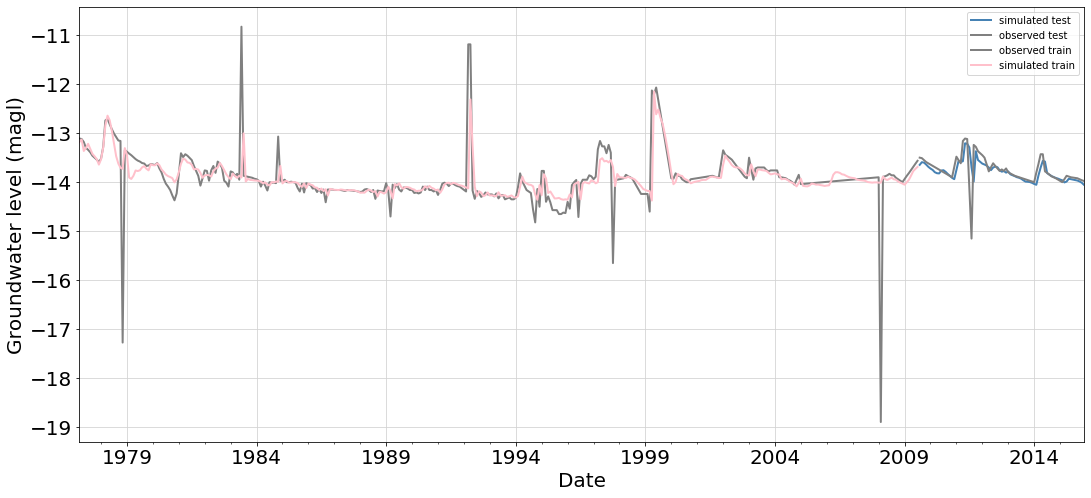

In [57]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima1.iloc[389:466].index)
df1['observed test']      = pima['2526CC00033'].iloc[389:466].values

df2 = pd.DataFrame(train_inverse_trans[6].values, columns = ['simulated train'],index =pima1.iloc[0:389].index)
df2['observed train'] = pima['2526CC00033'].iloc[0:389].values

out_df = df2.append(df1, sort=True)




#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed train'].plot(color='grey', linewidth=2)
out_df['simulated train'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [58]:
y_lstm = out_df['simulated test']

### GRU

In [59]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [60]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(77, 6)

    #running function
    gwl = 0.74532449
    test_forecast = X_test
    steps_ahead = 77
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(389, 6)
Train on 389 samples, validate on 77 samples
Epoch 1/1000
 96/389 [======>.......................] - ETA: 17s - loss: 0.4127 - mean_squared_error: 0.4127
Epoch 00001: val_loss improved from inf to 0.30114, saving model to model.h5
389/389 [==============================] - 9s 22ms/sample - loss: 1.0044 - mean_squared_error: 1.0044 - val_loss: 0.3011 - val_mean_squared_error: 0.3011
Epoch 2/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4832 - mean_squared_error: 0.4832
Epoch 00002: val_loss did not improve from 0.30114
389/389 [==============================] - 0s 127us/sample - loss: 0.9642 - mean_squared_error: 0.9642 - val_loss: 0.3031 - val_mean_squared_error: 0.3031
Epoch 3/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3718 - mean_squared_error: 0.3718
Epoch 00003: val_loss improved from 0.30114 to 0.30082, saving model to model.h5
389/389 [==============================] - 0s 176us/sample - loss: 0.9610 - mean_squared

 96/389 [======>.......................] - ETA: 0s - loss: 1.3695 - mean_squared_error: 1.3695
Epoch 00049: val_loss did not improve from 0.23164
389/389 [==============================] - 0s 125us/sample - loss: 0.8560 - mean_squared_error: 0.8560 - val_loss: 0.2343 - val_mean_squared_error: 0.2343
Epoch 50/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3187 - mean_squared_error: 0.3187
Epoch 00050: val_loss did not improve from 0.23164
389/389 [==============================] - 0s 137us/sample - loss: 0.8596 - mean_squared_error: 0.8596 - val_loss: 0.2342 - val_mean_squared_error: 0.2342
Epoch 51/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3297 - mean_squared_error: 0.3297
Epoch 00051: val_loss did not improve from 0.23164
389/389 [==============================] - 0s 128us/sample - loss: 0.8619 - mean_squared_error: 0.8619 - val_loss: 0.2338 - val_mean_squared_error: 0.2338
Epoch 52/1000
 96/389 [======>.......................] - ETA: 0s - lo

Epoch 100/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4257 - mean_squared_error: 0.4257
Epoch 00100: val_loss did not improve from 0.21627
389/389 [==============================] - 0s 145us/sample - loss: 0.8309 - mean_squared_error: 0.8309 - val_loss: 0.2177 - val_mean_squared_error: 0.2177
Epoch 101/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6277 - mean_squared_error: 1.6277
Epoch 00101: val_loss did not improve from 0.21627
389/389 [==============================] - 0s 124us/sample - loss: 0.8268 - mean_squared_error: 0.8268 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 102/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1449 - mean_squared_error: 1.1449
Epoch 00102: val_loss did not improve from 0.21627
389/389 [==============================] - 0s 122us/sample - loss: 0.7943 - mean_squared_error: 0.7943 - val_loss: 0.2171 - val_mean_squared_error: 0.2171
Epoch 103/1000
 96/389 [======>.....................

Epoch 126/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6901 - mean_squared_error: 0.6901
Epoch 00126: val_loss did not improve from 0.21187
389/389 [==============================] - 0s 122us/sample - loss: 0.7985 - mean_squared_error: 0.7985 - val_loss: 0.2132 - val_mean_squared_error: 0.2132
Epoch 127/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8884 - mean_squared_error: 0.8884
Epoch 00127: val_loss did not improve from 0.21187
389/389 [==============================] - 0s 122us/sample - loss: 0.8018 - mean_squared_error: 0.8018 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 128/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4305 - mean_squared_error: 0.4305
Epoch 00128: val_loss did not improve from 0.21187
389/389 [==============================] - 0s 114us/sample - loss: 0.7968 - mean_squared_error: 0.7968 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 129/1000
 96/389 [======>.....................

Epoch 152/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4371 - mean_squared_error: 0.4371
Epoch 00152: val_loss did not improve from 0.20734
389/389 [==============================] - 0s 163us/sample - loss: 0.7826 - mean_squared_error: 0.7826 - val_loss: 0.2090 - val_mean_squared_error: 0.2090
Epoch 153/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8944 - mean_squared_error: 0.8944
Epoch 00153: val_loss did not improve from 0.20734
389/389 [==============================] - 0s 123us/sample - loss: 0.7895 - mean_squared_error: 0.7895 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 154/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5957 - mean_squared_error: 1.5957
Epoch 00154: val_loss did not improve from 0.20734
389/389 [==============================] - 0s 148us/sample - loss: 0.7839 - mean_squared_error: 0.7839 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 155/1000
 96/389 [======>.....................

Epoch 178/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9846 - mean_squared_error: 0.9846
Epoch 00178: val_loss did not improve from 0.20633
389/389 [==============================] - 0s 137us/sample - loss: 0.7768 - mean_squared_error: 0.7768 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 179/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1383 - mean_squared_error: 0.1383
Epoch 00179: val_loss did not improve from 0.20633
389/389 [==============================] - 0s 141us/sample - loss: 0.7661 - mean_squared_error: 0.7661 - val_loss: 0.2105 - val_mean_squared_error: 0.2105
Epoch 180/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2143 - mean_squared_error: 0.2143
Epoch 00180: val_loss did not improve from 0.20633
389/389 [==============================] - 0s 134us/sample - loss: 0.7866 - mean_squared_error: 0.7866 - val_loss: 0.2087 - val_mean_squared_error: 0.2087
Epoch 181/1000
 96/389 [======>.....................

Epoch 229/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3200 - mean_squared_error: 1.3200
Epoch 00229: val_loss did not improve from 0.20029
389/389 [==============================] - 0s 143us/sample - loss: 0.7556 - mean_squared_error: 0.7556 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 230/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4668 - mean_squared_error: 0.4668
Epoch 00230: val_loss did not improve from 0.20029
389/389 [==============================] - 0s 141us/sample - loss: 0.7538 - mean_squared_error: 0.7538 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 231/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6049 - mean_squared_error: 0.6049
Epoch 00231: val_loss did not improve from 0.20029
389/389 [==============================] - 0s 115us/sample - loss: 0.7705 - mean_squared_error: 0.7705 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 232/1000
 96/389 [======>.....................

Epoch 255/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1842 - mean_squared_error: 0.1842
Epoch 00255: val_loss did not improve from 0.20029
389/389 [==============================] - 0s 129us/sample - loss: 0.7498 - mean_squared_error: 0.7498 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 256/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1313 - mean_squared_error: 1.1313
Epoch 00256: val_loss did not improve from 0.20029
389/389 [==============================] - 0s 157us/sample - loss: 0.7483 - mean_squared_error: 0.7483 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 257/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2336 - mean_squared_error: 1.2336
Epoch 00257: val_loss did not improve from 0.20029
389/389 [==============================] - 0s 139us/sample - loss: 0.7473 - mean_squared_error: 0.7473 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 258/1000
 96/389 [======>.....................

Epoch 281/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2576 - mean_squared_error: 0.2576
Epoch 00281: val_loss did not improve from 0.20029
389/389 [==============================] - 0s 181us/sample - loss: 0.7541 - mean_squared_error: 0.7541 - val_loss: 0.2028 - val_mean_squared_error: 0.2028
Epoch 282/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3810 - mean_squared_error: 0.3810
Epoch 00282: val_loss improved from 0.20029 to 0.19842, saving model to model.h5
389/389 [==============================] - 0s 251us/sample - loss: 0.7535 - mean_squared_error: 0.7535 - val_loss: 0.1984 - val_mean_squared_error: 0.1984
Epoch 283/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9498 - mean_squared_error: 0.9498
Epoch 00283: val_loss improved from 0.19842 to 0.19521, saving model to model.h5
389/389 [==============================] - 0s 272us/sample - loss: 0.7466 - mean_squared_error: 0.7466 - val_loss: 0.1952 - val_mean_squared_error:

Epoch 307/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2224 - mean_squared_error: 1.2224
Epoch 00307: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 114us/sample - loss: 0.7635 - mean_squared_error: 0.7635 - val_loss: 0.2022 - val_mean_squared_error: 0.2022
Epoch 308/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8190 - mean_squared_error: 0.8190
Epoch 00308: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 121us/sample - loss: 0.7535 - mean_squared_error: 0.7535 - val_loss: 0.2027 - val_mean_squared_error: 0.2027
Epoch 309/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2559 - mean_squared_error: 0.2559
Epoch 00309: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 155us/sample - loss: 0.7462 - mean_squared_error: 0.7462 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 310/1000
 96/389 [======>.....................

Epoch 333/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1215 - mean_squared_error: 0.1215
Epoch 00333: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 127us/sample - loss: 0.7535 - mean_squared_error: 0.7535 - val_loss: 0.2030 - val_mean_squared_error: 0.2030
Epoch 334/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1237 - mean_squared_error: 1.1237
Epoch 00334: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 135us/sample - loss: 0.7431 - mean_squared_error: 0.7431 - val_loss: 0.2035 - val_mean_squared_error: 0.2035
Epoch 335/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5366 - mean_squared_error: 1.5366
Epoch 00335: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 150us/sample - loss: 0.7386 - mean_squared_error: 0.7386 - val_loss: 0.2056 - val_mean_squared_error: 0.2056
Epoch 336/1000
 96/389 [======>.....................

Epoch 359/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8958 - mean_squared_error: 0.8958
Epoch 00359: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 132us/sample - loss: 0.7396 - mean_squared_error: 0.7396 - val_loss: 0.2068 - val_mean_squared_error: 0.2068
Epoch 360/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9379 - mean_squared_error: 0.9379
Epoch 00360: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 152us/sample - loss: 0.7367 - mean_squared_error: 0.7367 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 361/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6636 - mean_squared_error: 0.6636
Epoch 00361: val_loss did not improve from 0.19521
389/389 [==============================] - 0s 181us/sample - loss: 0.7624 - mean_squared_error: 0.7624 - val_loss: 0.2051 - val_mean_squared_error: 0.2051
Epoch 362/1000
 96/389 [======>.....................

Epoch 2/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9006 - mean_squared_error: 0.9006
Epoch 00002: val_loss improved from 0.36647 to 0.35910, saving model to model.h5
389/389 [==============================] - 0s 156us/sample - loss: 1.1973 - mean_squared_error: 1.1973 - val_loss: 0.3591 - val_mean_squared_error: 0.3591
Epoch 3/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0396 - mean_squared_error: 1.0396
Epoch 00003: val_loss improved from 0.35910 to 0.35513, saving model to model.h5
389/389 [==============================] - 0s 130us/sample - loss: 1.1452 - mean_squared_error: 1.1452 - val_loss: 0.3551 - val_mean_squared_error: 0.3551
Epoch 4/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5595 - mean_squared_error: 0.5595
Epoch 00004: val_loss improved from 0.35513 to 0.34792, saving model to model.h5
389/389 [==============================] - 0s 146us/sample - loss: 1.0919 - mean_squared_error: 1.0919 - val_loss: 0.3479 -

Epoch 26/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4874 - mean_squared_error: 0.4874
Epoch 00026: val_loss improved from 0.24857 to 0.24730, saving model to model.h5
389/389 [==============================] - 0s 106us/sample - loss: 0.8954 - mean_squared_error: 0.8954 - val_loss: 0.2473 - val_mean_squared_error: 0.2473
Epoch 27/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7734 - mean_squared_error: 0.7734
Epoch 00027: val_loss improved from 0.24730 to 0.24562, saving model to model.h5
389/389 [==============================] - 0s 105us/sample - loss: 0.8773 - mean_squared_error: 0.8773 - val_loss: 0.2456 - val_mean_squared_error: 0.2456
Epoch 28/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9490 - mean_squared_error: 0.9490
Epoch 00028: val_loss improved from 0.24562 to 0.24241, saving model to model.h5
389/389 [==============================] - 0s 120us/sample - loss: 0.8713 - mean_squared_error: 0.8713 - val_loss: 0.242

Epoch 77/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4378 - mean_squared_error: 0.4378
Epoch 00077: val_loss did not improve from 0.22672
389/389 [==============================] - 0s 71us/sample - loss: 0.8249 - mean_squared_error: 0.8249 - val_loss: 0.2274 - val_mean_squared_error: 0.2274
Epoch 78/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5552 - mean_squared_error: 0.5552
Epoch 00078: val_loss did not improve from 0.22672
389/389 [==============================] - 0s 91us/sample - loss: 0.8224 - mean_squared_error: 0.8224 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 79/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6116 - mean_squared_error: 1.6116
Epoch 00079: val_loss did not improve from 0.22672
389/389 [==============================] - 0s 80us/sample - loss: 0.8322 - mean_squared_error: 0.8322 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 80/1000
 96/389 [======>.......................] - E

Epoch 128/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0137 - mean_squared_error: 1.0137
Epoch 00128: val_loss did not improve from 0.21655
389/389 [==============================] - 0s 71us/sample - loss: 0.8029 - mean_squared_error: 0.8029 - val_loss: 0.2178 - val_mean_squared_error: 0.2178
Epoch 129/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6516 - mean_squared_error: 0.6516
Epoch 00129: val_loss did not improve from 0.21655
389/389 [==============================] - 0s 68us/sample - loss: 0.8146 - mean_squared_error: 0.8146 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 130/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6419 - mean_squared_error: 0.6419
Epoch 00130: val_loss did not improve from 0.21655
389/389 [==============================] - 0s 70us/sample - loss: 0.7735 - mean_squared_error: 0.7735 - val_loss: 0.2167 - val_mean_squared_error: 0.2167
Epoch 131/1000
 96/389 [======>.......................]

Epoch 154/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2466 - mean_squared_error: 1.2466
Epoch 00154: val_loss did not improve from 0.21283
389/389 [==============================] - 0s 71us/sample - loss: 0.7814 - mean_squared_error: 0.7814 - val_loss: 0.2163 - val_mean_squared_error: 0.2163
Epoch 155/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5496 - mean_squared_error: 0.5496
Epoch 00155: val_loss did not improve from 0.21283
389/389 [==============================] - 0s 67us/sample - loss: 0.7819 - mean_squared_error: 0.7819 - val_loss: 0.2160 - val_mean_squared_error: 0.2160
Epoch 156/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3360 - mean_squared_error: 0.3360
Epoch 00156: val_loss did not improve from 0.21283
389/389 [==============================] - 0s 72us/sample - loss: 0.7806 - mean_squared_error: 0.7806 - val_loss: 0.2157 - val_mean_squared_error: 0.2157
Epoch 157/1000
 96/389 [======>.......................]

Epoch 180/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1552 - mean_squared_error: 1.1552
Epoch 00180: val_loss improved from 0.20864 to 0.20769, saving model to model.h5
389/389 [==============================] - 0s 133us/sample - loss: 0.7817 - mean_squared_error: 0.7817 - val_loss: 0.2077 - val_mean_squared_error: 0.2077
Epoch 181/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.0387 - mean_squared_error: 2.0387
Epoch 00181: val_loss improved from 0.20769 to 0.20736, saving model to model.h5
389/389 [==============================] - 0s 122us/sample - loss: 0.7836 - mean_squared_error: 0.7836 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 182/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4824 - mean_squared_error: 0.4824
Epoch 00182: val_loss did not improve from 0.20736
389/389 [==============================] - 0s 73us/sample - loss: 0.7744 - mean_squared_error: 0.7744 - val_loss: 0.2080 - val_mean_squared_error: 

Epoch 206/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0861 - mean_squared_error: 1.0861
Epoch 00206: val_loss did not improve from 0.20736
389/389 [==============================] - 0s 69us/sample - loss: 0.7590 - mean_squared_error: 0.7590 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 207/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5647 - mean_squared_error: 0.5647
Epoch 00207: val_loss did not improve from 0.20736
389/389 [==============================] - 0s 72us/sample - loss: 0.7568 - mean_squared_error: 0.7568 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 208/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3380 - mean_squared_error: 0.3380
Epoch 00208: val_loss improved from 0.20736 to 0.20730, saving model to model.h5
389/389 [==============================] - 0s 106us/sample - loss: 0.7660 - mean_squared_error: 0.7660 - val_loss: 0.2073 - val_mean_squared_error: 0.2073
Epoch 209/1000
 96/389 [

Epoch 232/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8935 - mean_squared_error: 1.8935
Epoch 00232: val_loss did not improve from 0.20533
389/389 [==============================] - 0s 68us/sample - loss: 0.7458 - mean_squared_error: 0.7458 - val_loss: 0.2087 - val_mean_squared_error: 0.2087
Epoch 233/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4952 - mean_squared_error: 0.4952
Epoch 00233: val_loss did not improve from 0.20533
389/389 [==============================] - 0s 68us/sample - loss: 0.7681 - mean_squared_error: 0.7681 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 234/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1597 - mean_squared_error: 1.1597
Epoch 00234: val_loss did not improve from 0.20533
389/389 [==============================] - 0s 71us/sample - loss: 0.7671 - mean_squared_error: 0.7671 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 235/1000
 96/389 [======>.......................]

Epoch 258/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5067 - mean_squared_error: 1.5067
Epoch 00258: val_loss did not improve from 0.20533
389/389 [==============================] - 0s 70us/sample - loss: 0.7645 - mean_squared_error: 0.7645 - val_loss: 0.2097 - val_mean_squared_error: 0.2097
Epoch 259/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5369 - mean_squared_error: 0.5369
Epoch 00259: val_loss did not improve from 0.20533
389/389 [==============================] - 0s 72us/sample - loss: 0.7346 - mean_squared_error: 0.7346 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 260/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7728 - mean_squared_error: 0.7728
Epoch 00260: val_loss did not improve from 0.20533
389/389 [==============================] - 0s 72us/sample - loss: 0.7534 - mean_squared_error: 0.7534 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 261/1000
 96/389 [======>.......................]

Epoch 284/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7917 - mean_squared_error: 0.7917
Epoch 00284: val_loss did not improve from 0.20477
389/389 [==============================] - 0s 72us/sample - loss: 0.7689 - mean_squared_error: 0.7689 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 285/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8943 - mean_squared_error: 1.8943
Epoch 00285: val_loss did not improve from 0.20477
389/389 [==============================] - 0s 70us/sample - loss: 0.7766 - mean_squared_error: 0.7766 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 286/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0028 - mean_squared_error: 1.0028
Epoch 00286: val_loss did not improve from 0.20477
389/389 [==============================] - 0s 88us/sample - loss: 0.7462 - mean_squared_error: 0.7462 - val_loss: 0.2093 - val_mean_squared_error: 0.2093
Epoch 287/1000
 96/389 [======>.......................]

 96/389 [======>.......................] - ETA: 0s - loss: 0.1460 - mean_squared_error: 0.1460
Epoch 00310: val_loss did not improve from 0.20477
389/389 [==============================] - 0s 87us/sample - loss: 0.7547 - mean_squared_error: 0.7547 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 311/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2236 - mean_squared_error: 0.2236
Epoch 00311: val_loss did not improve from 0.20477
389/389 [==============================] - 0s 82us/sample - loss: 0.7365 - mean_squared_error: 0.7365 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 312/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0868 - mean_squared_error: 1.0868
Epoch 00312: val_loss did not improve from 0.20477
389/389 [==============================] - 0s 77us/sample - loss: 0.7670 - mean_squared_error: 0.7670 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 313/1000
 96/389 [======>.......................] - ETA: 0s - lo

Epoch 336/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6245 - mean_squared_error: 0.6245
Epoch 00336: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 76us/sample - loss: 0.7430 - mean_squared_error: 0.7430 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 337/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2214 - mean_squared_error: 0.2214
Epoch 00337: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 74us/sample - loss: 0.7484 - mean_squared_error: 0.7484 - val_loss: 0.2058 - val_mean_squared_error: 0.2058
Epoch 338/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2220 - mean_squared_error: 0.2220
Epoch 00338: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 71us/sample - loss: 0.7334 - mean_squared_error: 0.7334 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 339/1000
 96/389 [======>.......................]

Epoch 362/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0648 - mean_squared_error: 1.0648
Epoch 00362: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 71us/sample - loss: 0.7414 - mean_squared_error: 0.7414 - val_loss: 0.2079 - val_mean_squared_error: 0.2079
Epoch 363/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6415 - mean_squared_error: 0.6415
Epoch 00363: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 70us/sample - loss: 0.7328 - mean_squared_error: 0.7328 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 364/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1777 - mean_squared_error: 1.1777
Epoch 00364: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 83us/sample - loss: 0.7432 - mean_squared_error: 0.7432 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 365/1000
 96/389 [======>.......................]

 96/389 [======>.......................] - ETA: 0s - loss: 0.1483 - mean_squared_error: 0.1483
Epoch 00388: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 73us/sample - loss: 0.7608 - mean_squared_error: 0.7608 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 389/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4915 - mean_squared_error: 0.4915
Epoch 00389: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 69us/sample - loss: 0.7381 - mean_squared_error: 0.7381 - val_loss: 0.2026 - val_mean_squared_error: 0.2026
Epoch 390/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5967 - mean_squared_error: 0.5967
Epoch 00390: val_loss did not improve from 0.20197
389/389 [==============================] - 0s 73us/sample - loss: 0.7602 - mean_squared_error: 0.7602 - val_loss: 0.2035 - val_mean_squared_error: 0.2035
Epoch 391/1000
 96/389 [======>.......................] - ETA: 0s - lo

Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1960 - mean_squared_error: 0.1960
Epoch 00017: val_loss did not improve from 0.23774
389/389 [==============================] - 0s 87us/sample - loss: 0.8962 - mean_squared_error: 0.8962 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 18/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.0803 - mean_squared_error: 2.0803
Epoch 00018: val_loss improved from 0.23774 to 0.23507, saving model to model.h5
389/389 [==============================] - 0s 195us/sample - loss: 0.9088 - mean_squared_error: 0.9088 - val_loss: 0.2351 - val_mean_squared_error: 0.2351
Epoch 19/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8739 - mean_squared_error: 1.8739
Epoch 00019: val_loss did not improve from 0.23507
389/389 [==============================] - 0s 114us/sample - loss: 0.8929 - mean_squared_error: 0.8929 - val_loss: 0.2355 - val_mean_squared_error: 0.2355
Epoch 20/1000
 96/389 [===

 96/389 [======>.......................] - ETA: 0s - loss: 1.0173 - mean_squared_error: 1.0173
Epoch 00067: val_loss did not improve from 0.21908
389/389 [==============================] - 0s 89us/sample - loss: 0.8194 - mean_squared_error: 0.8194 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 68/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6536 - mean_squared_error: 0.6536
Epoch 00068: val_loss did not improve from 0.21908
389/389 [==============================] - 0s 92us/sample - loss: 0.8355 - mean_squared_error: 0.8355 - val_loss: 0.2254 - val_mean_squared_error: 0.2254
Epoch 69/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6444 - mean_squared_error: 0.6444
Epoch 00069: val_loss did not improve from 0.21908
389/389 [==============================] - 0s 116us/sample - loss: 0.8175 - mean_squared_error: 0.8175 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 70/1000
 96/389 [======>.......................] - ETA: 0s - loss

Epoch 93/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1770 - mean_squared_error: 0.1770
Epoch 00093: val_loss improved from 0.21606 to 0.21530, saving model to model.h5
389/389 [==============================] - 0s 151us/sample - loss: 0.8158 - mean_squared_error: 0.8158 - val_loss: 0.2153 - val_mean_squared_error: 0.2153
Epoch 94/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2682 - mean_squared_error: 1.2682
Epoch 00094: val_loss did not improve from 0.21530
389/389 [==============================] - 0s 151us/sample - loss: 0.8195 - mean_squared_error: 0.8195 - val_loss: 0.2159 - val_mean_squared_error: 0.2159
Epoch 95/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6478 - mean_squared_error: 1.6478
Epoch 00095: val_loss did not improve from 0.21530
389/389 [==============================] - 0s 119us/sample - loss: 0.8003 - mean_squared_error: 0.8003 - val_loss: 0.2164 - val_mean_squared_error: 0.2164
Epoch 96/1000
 96/389 [==

Epoch 119/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7180 - mean_squared_error: 0.7180
Epoch 00119: val_loss did not improve from 0.21089
389/389 [==============================] - 0s 102us/sample - loss: 0.7947 - mean_squared_error: 0.7947 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 120/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2213 - mean_squared_error: 0.2213
Epoch 00120: val_loss did not improve from 0.21089
389/389 [==============================] - 0s 98us/sample - loss: 0.7904 - mean_squared_error: 0.7904 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 121/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7045 - mean_squared_error: 0.7045
Epoch 00121: val_loss did not improve from 0.21089
389/389 [==============================] - 0s 99us/sample - loss: 0.7839 - mean_squared_error: 0.7839 - val_loss: 0.2132 - val_mean_squared_error: 0.2132
Epoch 122/1000
 96/389 [======>.......................

Epoch 145/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4127 - mean_squared_error: 1.4127
Epoch 00145: val_loss did not improve from 0.20823
389/389 [==============================] - 0s 164us/sample - loss: 0.8009 - mean_squared_error: 0.8009 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 146/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1591 - mean_squared_error: 1.1591
Epoch 00146: val_loss did not improve from 0.20823
389/389 [==============================] - 0s 120us/sample - loss: 0.7804 - mean_squared_error: 0.7804 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 147/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1891 - mean_squared_error: 1.1891
Epoch 00147: val_loss did not improve from 0.20823
389/389 [==============================] - 0s 122us/sample - loss: 0.7713 - mean_squared_error: 0.7713 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 148/1000
 96/389 [======>.....................

Epoch 171/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9777 - mean_squared_error: 0.9777
Epoch 00171: val_loss did not improve from 0.20823
389/389 [==============================] - 0s 86us/sample - loss: 0.7862 - mean_squared_error: 0.7862 - val_loss: 0.2109 - val_mean_squared_error: 0.2109
Epoch 172/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2525 - mean_squared_error: 0.2525
Epoch 00172: val_loss did not improve from 0.20823
389/389 [==============================] - 0s 91us/sample - loss: 0.7874 - mean_squared_error: 0.7874 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 173/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6607 - mean_squared_error: 0.6607
Epoch 00173: val_loss did not improve from 0.20823
389/389 [==============================] - 0s 75us/sample - loss: 0.7736 - mean_squared_error: 0.7736 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 174/1000
 96/389 [======>.......................]

Epoch 197/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0501 - mean_squared_error: 1.0501
Epoch 00197: val_loss did not improve from 0.20703
389/389 [==============================] - 0s 93us/sample - loss: 0.7682 - mean_squared_error: 0.7682 - val_loss: 0.2107 - val_mean_squared_error: 0.2107
Epoch 198/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4385 - mean_squared_error: 0.4385
Epoch 00198: val_loss did not improve from 0.20703
389/389 [==============================] - 0s 96us/sample - loss: 0.7547 - mean_squared_error: 0.7547 - val_loss: 0.2107 - val_mean_squared_error: 0.2107
Epoch 199/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2476 - mean_squared_error: 0.2476
Epoch 00199: val_loss did not improve from 0.20703
389/389 [==============================] - 0s 133us/sample - loss: 0.7680 - mean_squared_error: 0.7680 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 200/1000
 96/389 [======>.......................

Epoch 223/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 00223: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 98us/sample - loss: 0.7496 - mean_squared_error: 0.7496 - val_loss: 0.2092 - val_mean_squared_error: 0.2092
Epoch 224/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6379 - mean_squared_error: 0.6379
Epoch 00224: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 83us/sample - loss: 0.7576 - mean_squared_error: 0.7576 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 225/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4106 - mean_squared_error: 1.4106
Epoch 00225: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 87us/sample - loss: 0.7655 - mean_squared_error: 0.7655 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 226/1000
 96/389 [======>.......................]

Epoch 249/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3524 - mean_squared_error: 0.3524
Epoch 00249: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 82us/sample - loss: 0.7513 - mean_squared_error: 0.7513 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 250/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1470 - mean_squared_error: 1.1470
Epoch 00250: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 74us/sample - loss: 0.7616 - mean_squared_error: 0.7616 - val_loss: 0.2101 - val_mean_squared_error: 0.2101
Epoch 251/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7329 - mean_squared_error: 0.7329
Epoch 00251: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 74us/sample - loss: 0.7479 - mean_squared_error: 0.7479 - val_loss: 0.2107 - val_mean_squared_error: 0.2107
Epoch 252/1000
 96/389 [======>.......................]

Epoch 275/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7558 - mean_squared_error: 1.7558
Epoch 00275: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 110us/sample - loss: 0.7628 - mean_squared_error: 0.7628 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 276/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5864 - mean_squared_error: 0.5864
Epoch 00276: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 78us/sample - loss: 0.7646 - mean_squared_error: 0.7646 - val_loss: 0.2141 - val_mean_squared_error: 0.2141
Epoch 277/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5721 - mean_squared_error: 0.5721
Epoch 00277: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 81us/sample - loss: 0.7588 - mean_squared_error: 0.7588 - val_loss: 0.2141 - val_mean_squared_error: 0.2141
Epoch 278/1000
 96/389 [======>.......................

Epoch 301/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6541 - mean_squared_error: 0.6541
Epoch 00301: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 112us/sample - loss: 0.7453 - mean_squared_error: 0.7453 - val_loss: 0.2142 - val_mean_squared_error: 0.2142
Epoch 302/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4892 - mean_squared_error: 0.4892
Epoch 00302: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 84us/sample - loss: 0.7459 - mean_squared_error: 0.7459 - val_loss: 0.2130 - val_mean_squared_error: 0.2130
Epoch 303/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3561 - mean_squared_error: 1.3561
Epoch 00303: val_loss did not improve from 0.20521
389/389 [==============================] - 0s 80us/sample - loss: 0.7539 - mean_squared_error: 0.7539 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 304/1000
 96/389 [======>.......................

Epoch 15/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5943 - mean_squared_error: 1.5943
Epoch 00015: val_loss improved from 0.29665 to 0.29619, saving model to model.h5
389/389 [==============================] - 0s 153us/sample - loss: 0.9043 - mean_squared_error: 0.9043 - val_loss: 0.2962 - val_mean_squared_error: 0.2962
Epoch 16/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8296 - mean_squared_error: 1.8296
Epoch 00016: val_loss improved from 0.29619 to 0.29152, saving model to model.h5
389/389 [==============================] - 0s 158us/sample - loss: 0.8980 - mean_squared_error: 0.8980 - val_loss: 0.2915 - val_mean_squared_error: 0.2915
Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5373 - mean_squared_error: 0.5373
Epoch 00017: val_loss improved from 0.29152 to 0.28696, saving model to model.h5
389/389 [==============================] - 0s 130us/sample - loss: 0.8969 - mean_squared_error: 0.8969 - val_loss: 0.287

 96/389 [======>.......................] - ETA: 0s - loss: 0.4815 - mean_squared_error: 0.4815
Epoch 00064: val_loss improved from 0.22762 to 0.22668, saving model to model.h5
389/389 [==============================] - 0s 348us/sample - loss: 0.8476 - mean_squared_error: 0.8476 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 65/1000
384/389 [============================>.] - ETA: 0s - loss: 0.8527 - mean_squared_error: 0.8527
Epoch 00065: val_loss improved from 0.22668 to 0.22641, saving model to model.h5
389/389 [==============================] - 0s 578us/sample - loss: 0.8419 - mean_squared_error: 0.8419 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 66/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1491 - mean_squared_error: 1.1491
Epoch 00066: val_loss did not improve from 0.22641
389/389 [==============================] - 0s 144us/sample - loss: 0.8381 - mean_squared_error: 0.8381 - val_loss: 0.2276 - val_mean_squared_error: 0.2276
Epoch 67/

Epoch 90/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4936 - mean_squared_error: 0.4936
Epoch 00090: val_loss improved from 0.22336 to 0.22304, saving model to model.h5
389/389 [==============================] - 0s 200us/sample - loss: 0.8361 - mean_squared_error: 0.8361 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 91/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0841 - mean_squared_error: 1.0841
Epoch 00091: val_loss did not improve from 0.22304
389/389 [==============================] - 0s 165us/sample - loss: 0.8104 - mean_squared_error: 0.8104 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 92/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.1285 - mean_squared_error: 2.1285
Epoch 00092: val_loss did not improve from 0.22304
389/389 [==============================] - 0s 159us/sample - loss: 0.8291 - mean_squared_error: 0.8291 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 93/1000
 96/389 [==

Epoch 116/1000
192/389 [=============>................] - ETA: 0s - loss: 0.8204 - mean_squared_error: 0.8204
Epoch 00116: val_loss did not improve from 0.22145
389/389 [==============================] - 0s 282us/sample - loss: 0.8078 - mean_squared_error: 0.8078 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 117/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9932 - mean_squared_error: 0.9932
Epoch 00117: val_loss did not improve from 0.22145
389/389 [==============================] - 0s 135us/sample - loss: 0.8164 - mean_squared_error: 0.8164 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 118/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2554 - mean_squared_error: 0.2554
Epoch 00118: val_loss did not improve from 0.22145
389/389 [==============================] - 0s 150us/sample - loss: 0.7972 - mean_squared_error: 0.7972 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 119/1000
 96/389 [======>.....................

Epoch 142/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6082 - mean_squared_error: 0.6082
Epoch 00142: val_loss did not improve from 0.21577
389/389 [==============================] - 0s 167us/sample - loss: 0.7849 - mean_squared_error: 0.7849 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 143/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1317 - mean_squared_error: 1.1317
Epoch 00143: val_loss did not improve from 0.21577
389/389 [==============================] - 0s 103us/sample - loss: 0.7962 - mean_squared_error: 0.7962 - val_loss: 0.2182 - val_mean_squared_error: 0.2182
Epoch 144/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 00144: val_loss did not improve from 0.21577
389/389 [==============================] - 0s 127us/sample - loss: 0.7833 - mean_squared_error: 0.7833 - val_loss: 0.2173 - val_mean_squared_error: 0.2173
Epoch 145/1000
 96/389 [======>.....................

Epoch 168/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6531 - mean_squared_error: 1.6531
Epoch 00168: val_loss did not improve from 0.21267
389/389 [==============================] - 0s 114us/sample - loss: 0.7882 - mean_squared_error: 0.7882 - val_loss: 0.2181 - val_mean_squared_error: 0.2181
Epoch 169/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2159 - mean_squared_error: 0.2159
Epoch 00169: val_loss did not improve from 0.21267
389/389 [==============================] - 0s 117us/sample - loss: 0.7828 - mean_squared_error: 0.7828 - val_loss: 0.2180 - val_mean_squared_error: 0.2180
Epoch 170/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1259 - mean_squared_error: 0.1259
Epoch 00170: val_loss did not improve from 0.21267
389/389 [==============================] - 0s 118us/sample - loss: 0.7708 - mean_squared_error: 0.7708 - val_loss: 0.2169 - val_mean_squared_error: 0.2169
Epoch 171/1000
 96/389 [======>.....................

Epoch 194/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6460 - mean_squared_error: 0.6460
Epoch 00194: val_loss did not improve from 0.21029
389/389 [==============================] - 0s 222us/sample - loss: 0.7777 - mean_squared_error: 0.7777 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 195/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8322 - mean_squared_error: 1.8322
Epoch 00195: val_loss did not improve from 0.21029
389/389 [==============================] - 0s 111us/sample - loss: 0.7874 - mean_squared_error: 0.7874 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 196/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1046 - mean_squared_error: 0.1046
Epoch 00196: val_loss did not improve from 0.21029
389/389 [==============================] - 0s 109us/sample - loss: 0.7687 - mean_squared_error: 0.7687 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 197/1000
 96/389 [======>.....................

Epoch 220/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2354 - mean_squared_error: 1.2354
Epoch 00220: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 95us/sample - loss: 0.7781 - mean_squared_error: 0.7781 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 221/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8280 - mean_squared_error: 0.8280
Epoch 00221: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 122us/sample - loss: 0.7608 - mean_squared_error: 0.7608 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 222/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5269 - mean_squared_error: 0.5269
Epoch 00222: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 112us/sample - loss: 0.7785 - mean_squared_error: 0.7785 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 223/1000
 96/389 [======>......................

Epoch 246/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6917 - mean_squared_error: 0.6917
Epoch 00246: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 97us/sample - loss: 0.7548 - mean_squared_error: 0.7548 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 247/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1100 - mean_squared_error: 0.1100
Epoch 00247: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 81us/sample - loss: 0.7677 - mean_squared_error: 0.7677 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 248/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9376 - mean_squared_error: 0.9376
Epoch 00248: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 86us/sample - loss: 0.7784 - mean_squared_error: 0.7784 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 249/1000
 96/389 [======>.......................]

Epoch 272/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1594 - mean_squared_error: 0.1594
Epoch 00272: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 118us/sample - loss: 0.7788 - mean_squared_error: 0.7788 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 273/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5642 - mean_squared_error: 1.5642
Epoch 00273: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 113us/sample - loss: 0.7597 - mean_squared_error: 0.7597 - val_loss: 0.2079 - val_mean_squared_error: 0.2079
Epoch 274/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3399 - mean_squared_error: 0.3399
Epoch 00274: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 116us/sample - loss: 0.7366 - mean_squared_error: 0.7366 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 275/1000
 96/389 [======>.....................

Epoch 298/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1419 - mean_squared_error: 1.1419
Epoch 00298: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 118us/sample - loss: 0.7702 - mean_squared_error: 0.7702 - val_loss: 0.2165 - val_mean_squared_error: 0.2165
Epoch 299/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2716 - mean_squared_error: 1.2716
Epoch 00299: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 91us/sample - loss: 0.7640 - mean_squared_error: 0.7640 - val_loss: 0.2157 - val_mean_squared_error: 0.2157
Epoch 300/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 00300: val_loss did not improve from 0.20481
389/389 [==============================] - 0s 84us/sample - loss: 0.7529 - mean_squared_error: 0.7529 - val_loss: 0.2148 - val_mean_squared_error: 0.2148
Epoch 301/1000
 96/389 [======>.......................

Epoch 5/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9467 - mean_squared_error: 0.9467
Epoch 00005: val_loss improved from 0.41377 to 0.41262, saving model to model.h5
389/389 [==============================] - 0s 161us/sample - loss: 1.1452 - mean_squared_error: 1.1452 - val_loss: 0.4126 - val_mean_squared_error: 0.4126
Epoch 6/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.1765 - mean_squared_error: 2.1765
Epoch 00006: val_loss improved from 0.41262 to 0.40649, saving model to model.h5
389/389 [==============================] - 0s 202us/sample - loss: 1.1279 - mean_squared_error: 1.1279 - val_loss: 0.4065 - val_mean_squared_error: 0.4065
Epoch 7/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8470 - mean_squared_error: 1.8470
Epoch 00007: val_loss improved from 0.40649 to 0.40370, saving model to model.h5
389/389 [==============================] - 0s 139us/sample - loss: 1.0709 - mean_squared_error: 1.0709 - val_loss: 0.4037 -

Epoch 29/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.1095 - mean_squared_error: 2.1095
Epoch 00029: val_loss did not improve from 0.27293
389/389 [==============================] - 0s 109us/sample - loss: 0.8688 - mean_squared_error: 0.8688 - val_loss: 0.2760 - val_mean_squared_error: 0.2760
Epoch 30/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5854 - mean_squared_error: 0.5854
Epoch 00030: val_loss did not improve from 0.27293
389/389 [==============================] - 0s 100us/sample - loss: 0.8718 - mean_squared_error: 0.8718 - val_loss: 0.2749 - val_mean_squared_error: 0.2749
Epoch 31/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6631 - mean_squared_error: 1.6631
Epoch 00031: val_loss improved from 0.27293 to 0.27123, saving model to model.h5
389/389 [==============================] - 0s 180us/sample - loss: 0.9007 - mean_squared_error: 0.9007 - val_loss: 0.2712 - val_mean_squared_error: 0.2712
Epoch 32/1000
384/389 [==

Epoch 54/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8180 - mean_squared_error: 1.8180
Epoch 00054: val_loss improved from 0.23565 to 0.23148, saving model to model.h5
389/389 [==============================] - 0s 198us/sample - loss: 0.8726 - mean_squared_error: 0.8726 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 55/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0036 - mean_squared_error: 1.0036
Epoch 00055: val_loss improved from 0.23148 to 0.22776, saving model to model.h5
389/389 [==============================] - 0s 173us/sample - loss: 0.8552 - mean_squared_error: 0.8552 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 56/1000
384/389 [============================>.] - ETA: 0s - loss: 0.8316 - mean_squared_error: 0.8316
Epoch 00056: val_loss did not improve from 0.22776
389/389 [==============================] - 0s 197us/sample - loss: 0.8212 - mean_squared_error: 0.8212 - val_loss: 0.2282 - val_mean_squared_error: 0.

Epoch 80/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1320 - mean_squared_error: 0.1320
Epoch 00080: val_loss did not improve from 0.22776
389/389 [==============================] - 0s 152us/sample - loss: 0.8435 - mean_squared_error: 0.8435 - val_loss: 0.2351 - val_mean_squared_error: 0.2351
Epoch 81/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6753 - mean_squared_error: 0.6753
Epoch 00081: val_loss did not improve from 0.22776
389/389 [==============================] - 0s 120us/sample - loss: 0.8131 - mean_squared_error: 0.8131 - val_loss: 0.2356 - val_mean_squared_error: 0.2356
Epoch 82/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5027 - mean_squared_error: 0.5027
Epoch 00082: val_loss did not improve from 0.22776
389/389 [==============================] - 0s 118us/sample - loss: 0.8279 - mean_squared_error: 0.8279 - val_loss: 0.2326 - val_mean_squared_error: 0.2326
Epoch 83/1000
 96/389 [======>.......................] 

Epoch 106/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1526 - mean_squared_error: 0.1526
Epoch 00106: val_loss did not improve from 0.21757
389/389 [==============================] - 0s 113us/sample - loss: 0.8009 - mean_squared_error: 0.8009 - val_loss: 0.2187 - val_mean_squared_error: 0.2187
Epoch 107/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0188 - mean_squared_error: 1.0188
Epoch 00107: val_loss did not improve from 0.21757
389/389 [==============================] - 0s 95us/sample - loss: 0.7795 - mean_squared_error: 0.7795 - val_loss: 0.2178 - val_mean_squared_error: 0.2178
Epoch 108/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7422 - mean_squared_error: 0.7422
Epoch 00108: val_loss improved from 0.21757 to 0.21734, saving model to model.h5
389/389 [==============================] - 0s 133us/sample - loss: 0.8175 - mean_squared_error: 0.8175 - val_loss: 0.2173 - val_mean_squared_error: 0.2173
Epoch 109/1000
 96/389 

 96/389 [======>.......................] - ETA: 0s - loss: 1.2826 - mean_squared_error: 1.2826
Epoch 00156: val_loss improved from 0.20671 to 0.20661, saving model to model.h5
389/389 [==============================] - 0s 178us/sample - loss: 0.7896 - mean_squared_error: 0.7896 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 157/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7448 - mean_squared_error: 0.7448
Epoch 00157: val_loss did not improve from 0.20661
389/389 [==============================] - 0s 96us/sample - loss: 0.7636 - mean_squared_error: 0.7636 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 158/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1736 - mean_squared_error: 1.1736
Epoch 00158: val_loss did not improve from 0.20661
389/389 [==============================] - 0s 91us/sample - loss: 0.7861 - mean_squared_error: 0.7861 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 159/1000
 96/389 [======>........

Epoch 182/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.9768 - mean_squared_error: 1.9768
Epoch 00182: val_loss did not improve from 0.20636
389/389 [==============================] - 0s 148us/sample - loss: 0.7692 - mean_squared_error: 0.7692 - val_loss: 0.2082 - val_mean_squared_error: 0.2082
Epoch 183/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3087 - mean_squared_error: 0.3087
Epoch 00183: val_loss did not improve from 0.20636
389/389 [==============================] - 0s 81us/sample - loss: 0.7685 - mean_squared_error: 0.7685 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 184/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1536 - mean_squared_error: 0.1536
Epoch 00184: val_loss did not improve from 0.20636
389/389 [==============================] - 0s 84us/sample - loss: 0.7821 - mean_squared_error: 0.7821 - val_loss: 0.2097 - val_mean_squared_error: 0.2097
Epoch 185/1000
 96/389 [======>.......................

Epoch 208/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9179 - mean_squared_error: 0.9179
Epoch 00208: val_loss did not improve from 0.20379
389/389 [==============================] - 0s 78us/sample - loss: 0.7575 - mean_squared_error: 0.7575 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 209/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9063 - mean_squared_error: 0.9063
Epoch 00209: val_loss did not improve from 0.20379
389/389 [==============================] - 0s 78us/sample - loss: 0.7845 - mean_squared_error: 0.7845 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 210/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5781 - mean_squared_error: 0.5781
Epoch 00210: val_loss did not improve from 0.20379
389/389 [==============================] - 0s 86us/sample - loss: 0.7887 - mean_squared_error: 0.7887 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 211/1000
 96/389 [======>.......................]

Epoch 234/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6558 - mean_squared_error: 0.6558
Epoch 00234: val_loss did not improve from 0.20316
389/389 [==============================] - 0s 89us/sample - loss: 0.7792 - mean_squared_error: 0.7792 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 235/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1863 - mean_squared_error: 0.1863
Epoch 00235: val_loss did not improve from 0.20316
389/389 [==============================] - 0s 104us/sample - loss: 0.7757 - mean_squared_error: 0.7757 - val_loss: 0.2077 - val_mean_squared_error: 0.2077
Epoch 236/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5248 - mean_squared_error: 0.5248
Epoch 00236: val_loss did not improve from 0.20316
389/389 [==============================] - 0s 85us/sample - loss: 0.7622 - mean_squared_error: 0.7622 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 237/1000
 96/389 [======>.......................

Epoch 260/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1987 - mean_squared_error: 0.1987
Epoch 00260: val_loss did not improve from 0.20177
389/389 [==============================] - 0s 111us/sample - loss: 0.7709 - mean_squared_error: 0.7709 - val_loss: 0.2023 - val_mean_squared_error: 0.2023
Epoch 261/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7043 - mean_squared_error: 0.7043
Epoch 00261: val_loss did not improve from 0.20177
389/389 [==============================] - 0s 113us/sample - loss: 0.7668 - mean_squared_error: 0.7668 - val_loss: 0.2033 - val_mean_squared_error: 0.2033
Epoch 262/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 00262: val_loss did not improve from 0.20177
389/389 [==============================] - 0s 112us/sample - loss: 0.7517 - mean_squared_error: 0.7517 - val_loss: 0.2036 - val_mean_squared_error: 0.2036
Epoch 263/1000
 96/389 [======>.....................

Epoch 286/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4829 - mean_squared_error: 0.4829
Epoch 00286: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 124us/sample - loss: 0.7742 - mean_squared_error: 0.7742 - val_loss: 0.2063 - val_mean_squared_error: 0.2063
Epoch 287/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2966 - mean_squared_error: 0.2966
Epoch 00287: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 83us/sample - loss: 0.7556 - mean_squared_error: 0.7556 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 288/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1100 - mean_squared_error: 0.1100
Epoch 00288: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 110us/sample - loss: 0.7527 - mean_squared_error: 0.7527 - val_loss: 0.2101 - val_mean_squared_error: 0.2101
Epoch 289/1000
 96/389 [======>......................

Epoch 312/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0330 - mean_squared_error: 1.0330
Epoch 00312: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 147us/sample - loss: 0.7666 - mean_squared_error: 0.7666 - val_loss: 0.2056 - val_mean_squared_error: 0.2056
Epoch 313/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0795 - mean_squared_error: 1.0795
Epoch 00313: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 104us/sample - loss: 0.7749 - mean_squared_error: 0.7749 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 314/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6857 - mean_squared_error: 0.6857
Epoch 00314: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 108us/sample - loss: 0.7636 - mean_squared_error: 0.7636 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 315/1000
 96/389 [======>.....................

Epoch 338/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6456 - mean_squared_error: 1.6456
Epoch 00338: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 118us/sample - loss: 0.7420 - mean_squared_error: 0.7420 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 339/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2600 - mean_squared_error: 0.2600
Epoch 00339: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 183us/sample - loss: 0.7457 - mean_squared_error: 0.7457 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 340/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6266 - mean_squared_error: 0.6266
Epoch 00340: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 127us/sample - loss: 0.7769 - mean_squared_error: 0.7769 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 341/1000
 96/389 [======>.....................

Epoch 364/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6713 - mean_squared_error: 0.6713
Epoch 00364: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 119us/sample - loss: 0.7431 - mean_squared_error: 0.7431 - val_loss: 0.2092 - val_mean_squared_error: 0.2092
Epoch 365/1000
384/389 [============================>.] - ETA: 0s - loss: 0.7764 - mean_squared_error: 0.7764
Epoch 00365: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 320us/sample - loss: 0.7716 - mean_squared_error: 0.7716 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 366/1000
384/389 [============================>.] - ETA: 0s - loss: 0.7639 - mean_squared_error: 0.7639
Epoch 00366: val_loss did not improve from 0.20026
389/389 [==============================] - 0s 587us/sample - loss: 0.7548 - mean_squared_error: 0.7548 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 367/1000
 96/389 [======>.....................

Epoch 23/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1490 - mean_squared_error: 1.1490
Epoch 00023: val_loss did not improve from 0.22960
389/389 [==============================] - 0s 108us/sample - loss: 0.8539 - mean_squared_error: 0.8539 - val_loss: 0.2375 - val_mean_squared_error: 0.2375
Epoch 24/1000
288/389 [=====================>........] - ETA: 0s - loss: 0.9292 - mean_squared_error: 0.9292
Epoch 00024: val_loss did not improve from 0.22960
389/389 [==============================] - 0s 272us/sample - loss: 0.8598 - mean_squared_error: 0.8598 - val_loss: 0.2372 - val_mean_squared_error: 0.2372
Epoch 25/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1078 - mean_squared_error: 1.1078
Epoch 00025: val_loss did not improve from 0.22960
389/389 [==============================] - 0s 96us/sample - loss: 0.8550 - mean_squared_error: 0.8550 - val_loss: 0.2368 - val_mean_squared_error: 0.2368
Epoch 26/1000
 96/389 [======>.......................] -

Epoch 49/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4630 - mean_squared_error: 1.4630
Epoch 00049: val_loss did not improve from 0.22019
389/389 [==============================] - 0s 109us/sample - loss: 0.8321 - mean_squared_error: 0.8321 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 50/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.2189 - mean_squared_error: 2.2189
Epoch 00050: val_loss did not improve from 0.22019
389/389 [==============================] - 0s 127us/sample - loss: 0.8380 - mean_squared_error: 0.8380 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 51/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3027 - mean_squared_error: 0.3027
Epoch 00051: val_loss did not improve from 0.22019
389/389 [==============================] - 0s 130us/sample - loss: 0.8398 - mean_squared_error: 0.8398 - val_loss: 0.2243 - val_mean_squared_error: 0.2243
Epoch 52/1000
 96/389 [======>.......................] 

 96/389 [======>.......................] - ETA: 0s - loss: 1.0369 - mean_squared_error: 1.0369
Epoch 00075: val_loss did not improve from 0.22019
389/389 [==============================] - 0s 121us/sample - loss: 0.8112 - mean_squared_error: 0.8112 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 76/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0835 - mean_squared_error: 1.0835
Epoch 00076: val_loss did not improve from 0.22019
389/389 [==============================] - 0s 122us/sample - loss: 0.8125 - mean_squared_error: 0.8125 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 77/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5293 - mean_squared_error: 0.5293
Epoch 00077: val_loss did not improve from 0.22019
389/389 [==============================] - 0s 172us/sample - loss: 0.8308 - mean_squared_error: 0.8308 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 78/1000
288/389 [=====================>........] - ETA: 0s - lo

Epoch 101/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1228 - mean_squared_error: 1.1228
Epoch 00101: val_loss did not improve from 0.21411
389/389 [==============================] - 0s 128us/sample - loss: 0.8007 - mean_squared_error: 0.8007 - val_loss: 0.2171 - val_mean_squared_error: 0.2171
Epoch 102/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4666 - mean_squared_error: 0.4666
Epoch 00102: val_loss did not improve from 0.21411
389/389 [==============================] - 0s 160us/sample - loss: 0.7964 - mean_squared_error: 0.7964 - val_loss: 0.2176 - val_mean_squared_error: 0.2176
Epoch 103/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.9269 - mean_squared_error: 1.9269
Epoch 00103: val_loss did not improve from 0.21411
389/389 [==============================] - 0s 173us/sample - loss: 0.7895 - mean_squared_error: 0.7895 - val_loss: 0.2178 - val_mean_squared_error: 0.2178
Epoch 104/1000
 96/389 [======>.....................

Epoch 127/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0072 - mean_squared_error: 1.0072
Epoch 00127: val_loss did not improve from 0.21110
389/389 [==============================] - 0s 150us/sample - loss: 0.7916 - mean_squared_error: 0.7916 - val_loss: 0.2138 - val_mean_squared_error: 0.2138
Epoch 128/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3548 - mean_squared_error: 0.3548
Epoch 00128: val_loss did not improve from 0.21110
389/389 [==============================] - 0s 133us/sample - loss: 0.8090 - mean_squared_error: 0.8090 - val_loss: 0.2161 - val_mean_squared_error: 0.2161
Epoch 129/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3457 - mean_squared_error: 0.3457
Epoch 00129: val_loss did not improve from 0.21110
389/389 [==============================] - 0s 145us/sample - loss: 0.8043 - mean_squared_error: 0.8043 - val_loss: 0.2175 - val_mean_squared_error: 0.2175
Epoch 130/1000
 96/389 [======>.....................

Epoch 153/1000
384/389 [============================>.] - ETA: 0s - loss: 0.7632 - mean_squared_error: 0.7632
Epoch 00153: val_loss did not improve from 0.21033
389/389 [==============================] - 0s 392us/sample - loss: 0.7563 - mean_squared_error: 0.7562 - val_loss: 0.2159 - val_mean_squared_error: 0.2159
Epoch 154/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 00154: val_loss did not improve from 0.21033
389/389 [==============================] - 0s 164us/sample - loss: 0.7871 - mean_squared_error: 0.7871 - val_loss: 0.2153 - val_mean_squared_error: 0.2153
Epoch 155/1000
384/389 [============================>.] - ETA: 0s - loss: 0.7306 - mean_squared_error: 0.7306
Epoch 00155: val_loss did not improve from 0.21033
389/389 [==============================] - 0s 318us/sample - loss: 0.7631 - mean_squared_error: 0.7631 - val_loss: 0.2180 - val_mean_squared_error: 0.2180
Epoch 156/1000
 96/389 [======>.....................

Epoch 179/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0865 - mean_squared_error: 0.0865
Epoch 00179: val_loss did not improve from 0.21033
389/389 [==============================] - 0s 129us/sample - loss: 0.7529 - mean_squared_error: 0.7529 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 180/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6303 - mean_squared_error: 1.6303
Epoch 00180: val_loss did not improve from 0.21033
389/389 [==============================] - 0s 131us/sample - loss: 0.7619 - mean_squared_error: 0.7619 - val_loss: 0.2121 - val_mean_squared_error: 0.2121
Epoch 181/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6866 - mean_squared_error: 0.6866
Epoch 00181: val_loss did not improve from 0.21033
389/389 [==============================] - 0s 144us/sample - loss: 0.7966 - mean_squared_error: 0.7966 - val_loss: 0.2125 - val_mean_squared_error: 0.2125
Epoch 182/1000
 96/389 [======>.....................

Epoch 205/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4460 - mean_squared_error: 0.4460
Epoch 00205: val_loss improved from 0.20648 to 0.20646, saving model to model.h5
389/389 [==============================] - 0s 161us/sample - loss: 0.7671 - mean_squared_error: 0.7671 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 206/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5308 - mean_squared_error: 0.5308
Epoch 00206: val_loss did not improve from 0.20646
389/389 [==============================] - 0s 107us/sample - loss: 0.7660 - mean_squared_error: 0.7660 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 207/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2451 - mean_squared_error: 0.2451
Epoch 00207: val_loss did not improve from 0.20646
389/389 [==============================] - 0s 110us/sample - loss: 0.7789 - mean_squared_error: 0.7789 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 208/1000
 96/389

Epoch 231/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9514 - mean_squared_error: 0.9514
Epoch 00231: val_loss did not improve from 0.20494
389/389 [==============================] - 0s 105us/sample - loss: 0.7628 - mean_squared_error: 0.7628 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 232/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5056 - mean_squared_error: 0.5056
Epoch 00232: val_loss did not improve from 0.20494
389/389 [==============================] - 0s 154us/sample - loss: 0.7611 - mean_squared_error: 0.7611 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 233/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1312 - mean_squared_error: 0.1312
Epoch 00233: val_loss did not improve from 0.20494
389/389 [==============================] - 0s 151us/sample - loss: 0.7512 - mean_squared_error: 0.7512 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 234/1000
 96/389 [======>.....................

Epoch 257/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1722 - mean_squared_error: 1.1722
Epoch 00257: val_loss did not improve from 0.20494
389/389 [==============================] - 0s 116us/sample - loss: 0.7573 - mean_squared_error: 0.7573 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 258/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9268 - mean_squared_error: 0.9268
Epoch 00258: val_loss did not improve from 0.20494
389/389 [==============================] - 0s 120us/sample - loss: 0.7497 - mean_squared_error: 0.7497 - val_loss: 0.2112 - val_mean_squared_error: 0.2112
Epoch 259/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6455 - mean_squared_error: 0.6455
Epoch 00259: val_loss did not improve from 0.20494
389/389 [==============================] - 0s 127us/sample - loss: 0.7613 - mean_squared_error: 0.7613 - val_loss: 0.2096 - val_mean_squared_error: 0.2096
Epoch 260/1000
 96/389 [======>.....................

Epoch 283/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6411 - mean_squared_error: 1.6411
Epoch 00283: val_loss did not improve from 0.20324
389/389 [==============================] - 0s 143us/sample - loss: 0.7642 - mean_squared_error: 0.7642 - val_loss: 0.2052 - val_mean_squared_error: 0.2052
Epoch 284/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5216 - mean_squared_error: 1.5216
Epoch 00284: val_loss did not improve from 0.20324
389/389 [==============================] - 0s 122us/sample - loss: 0.7467 - mean_squared_error: 0.7467 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 285/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0981 - mean_squared_error: 0.0981
Epoch 00285: val_loss did not improve from 0.20324
389/389 [==============================] - 0s 112us/sample - loss: 0.7592 - mean_squared_error: 0.7592 - val_loss: 0.2051 - val_mean_squared_error: 0.2051
Epoch 286/1000
 96/389 [======>.....................

Epoch 309/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7568 - mean_squared_error: 1.7568
Epoch 00309: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 152us/sample - loss: 0.7594 - mean_squared_error: 0.7594 - val_loss: 0.2025 - val_mean_squared_error: 0.2025
Epoch 310/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5567 - mean_squared_error: 0.5567
Epoch 00310: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 136us/sample - loss: 0.7576 - mean_squared_error: 0.7576 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 311/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2540 - mean_squared_error: 0.2540
Epoch 00311: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 181us/sample - loss: 0.7518 - mean_squared_error: 0.7518 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 312/1000
 96/389 [======>.....................

Epoch 335/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2661 - mean_squared_error: 0.2661
Epoch 00335: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 115us/sample - loss: 0.7606 - mean_squared_error: 0.7606 - val_loss: 0.2053 - val_mean_squared_error: 0.2053
Epoch 336/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7627 - mean_squared_error: 0.7627
Epoch 00336: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 120us/sample - loss: 0.7569 - mean_squared_error: 0.7569 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 337/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8153 - mean_squared_error: 0.8153
Epoch 00337: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 127us/sample - loss: 0.7468 - mean_squared_error: 0.7468 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 338/1000
 96/389 [======>.....................

Epoch 361/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4066 - mean_squared_error: 0.4066
Epoch 00361: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 144us/sample - loss: 0.7516 - mean_squared_error: 0.7516 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 362/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1543 - mean_squared_error: 0.1543
Epoch 00362: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 134us/sample - loss: 0.7624 - mean_squared_error: 0.7624 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 363/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9284 - mean_squared_error: 0.9284
Epoch 00363: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 154us/sample - loss: 0.7338 - mean_squared_error: 0.7338 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 364/1000
 96/389 [======>.....................

Epoch 387/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4396 - mean_squared_error: 0.4396
Epoch 00387: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 106us/sample - loss: 0.7557 - mean_squared_error: 0.7557 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 388/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2174 - mean_squared_error: 1.2174
Epoch 00388: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 93us/sample - loss: 0.7478 - mean_squared_error: 0.7478 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 389/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6517 - mean_squared_error: 0.6517
Epoch 00389: val_loss did not improve from 0.20130
389/389 [==============================] - 0s 125us/sample - loss: 0.7273 - mean_squared_error: 0.7273 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 390/1000
 96/389 [======>......................

Epoch 31/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1674 - mean_squared_error: 1.1674
Epoch 00031: val_loss did not improve from 0.23774
389/389 [==============================] - 0s 91us/sample - loss: 0.8750 - mean_squared_error: 0.8750 - val_loss: 0.2392 - val_mean_squared_error: 0.2392
Epoch 32/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0792 - mean_squared_error: 1.0792
Epoch 00032: val_loss did not improve from 0.23774
389/389 [==============================] - 0s 80us/sample - loss: 0.8737 - mean_squared_error: 0.8737 - val_loss: 0.2386 - val_mean_squared_error: 0.2386
Epoch 33/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1706 - mean_squared_error: 1.1706
Epoch 00033: val_loss did not improve from 0.23774
389/389 [==============================] - 0s 83us/sample - loss: 0.8544 - mean_squared_error: 0.8544 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 34/1000
 96/389 [======>.......................] - E

Epoch 82/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3630 - mean_squared_error: 1.3630
Epoch 00082: val_loss did not improve from 0.22133
389/389 [==============================] - 0s 112us/sample - loss: 0.8150 - mean_squared_error: 0.8150 - val_loss: 0.2224 - val_mean_squared_error: 0.2224
Epoch 83/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3161 - mean_squared_error: 1.3161
Epoch 00083: val_loss improved from 0.22133 to 0.22093, saving model to model.h5
389/389 [==============================] - 0s 123us/sample - loss: 0.8091 - mean_squared_error: 0.8091 - val_loss: 0.2209 - val_mean_squared_error: 0.2209
Epoch 84/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3440 - mean_squared_error: 0.3440
Epoch 00084: val_loss did not improve from 0.22093
389/389 [==============================] - 0s 85us/sample - loss: 0.8128 - mean_squared_error: 0.8128 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 85/1000
 96/389 [===

Epoch 108/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5137 - mean_squared_error: 0.5137
Epoch 00108: val_loss did not improve from 0.21547
389/389 [==============================] - 0s 104us/sample - loss: 0.7965 - mean_squared_error: 0.7965 - val_loss: 0.2187 - val_mean_squared_error: 0.2187
Epoch 109/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8188 - mean_squared_error: 0.8188
Epoch 00109: val_loss did not improve from 0.21547
389/389 [==============================] - 0s 83us/sample - loss: 0.7988 - mean_squared_error: 0.7988 - val_loss: 0.2179 - val_mean_squared_error: 0.2179
Epoch 110/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4433 - mean_squared_error: 0.4433
Epoch 00110: val_loss did not improve from 0.21547
389/389 [==============================] - 0s 81us/sample - loss: 0.7977 - mean_squared_error: 0.7977 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 111/1000
 96/389 [======>.......................

Epoch 134/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7326 - mean_squared_error: 1.7326
Epoch 00134: val_loss did not improve from 0.21389
389/389 [==============================] - 0s 84us/sample - loss: 0.8190 - mean_squared_error: 0.8190 - val_loss: 0.2156 - val_mean_squared_error: 0.2156
Epoch 135/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6483 - mean_squared_error: 0.6483
Epoch 00135: val_loss did not improve from 0.21389
389/389 [==============================] - 0s 89us/sample - loss: 0.7881 - mean_squared_error: 0.7881 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 136/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1554 - mean_squared_error: 0.1554
Epoch 00136: val_loss improved from 0.21389 to 0.21277, saving model to model.h5
389/389 [==============================] - 0s 126us/sample - loss: 0.7862 - mean_squared_error: 0.7862 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 137/1000
 96/389 [

 96/389 [======>.......................] - ETA: 0s - loss: 0.4994 - mean_squared_error: 0.4994
Epoch 00185: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 96us/sample - loss: 0.7757 - mean_squared_error: 0.7757 - val_loss: 0.2068 - val_mean_squared_error: 0.2068
Epoch 186/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7320 - mean_squared_error: 0.7320
Epoch 00186: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 86us/sample - loss: 0.7754 - mean_squared_error: 0.7754 - val_loss: 0.2068 - val_mean_squared_error: 0.2068
Epoch 187/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1811 - mean_squared_error: 0.1811
Epoch 00187: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 84us/sample - loss: 0.7628 - mean_squared_error: 0.7628 - val_loss: 0.2090 - val_mean_squared_error: 0.2090
Epoch 188/1000
 96/389 [======>.......................] - ETA: 0s - lo

 96/389 [======>.......................] - ETA: 0s - loss: 0.7921 - mean_squared_error: 0.7921
Epoch 00211: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 91us/sample - loss: 0.7702 - mean_squared_error: 0.7702 - val_loss: 0.2143 - val_mean_squared_error: 0.2143
Epoch 212/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5215 - mean_squared_error: 0.5215
Epoch 00212: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 86us/sample - loss: 0.7601 - mean_squared_error: 0.7601 - val_loss: 0.2135 - val_mean_squared_error: 0.2135
Epoch 213/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8015 - mean_squared_error: 0.8015
Epoch 00213: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 86us/sample - loss: 0.7664 - mean_squared_error: 0.7664 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 214/1000
 96/389 [======>.......................] - ETA: 0s - lo

 96/389 [======>.......................] - ETA: 0s - loss: 1.7203 - mean_squared_error: 1.7203
Epoch 00237: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 88us/sample - loss: 0.7566 - mean_squared_error: 0.7566 - val_loss: 0.2070 - val_mean_squared_error: 0.2070
Epoch 238/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7062 - mean_squared_error: 1.7062
Epoch 00238: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 83us/sample - loss: 0.7498 - mean_squared_error: 0.7498 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 239/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1081 - mean_squared_error: 0.1081
Epoch 00239: val_loss did not improve from 0.20209
389/389 [==============================] - 0s 79us/sample - loss: 0.7388 - mean_squared_error: 0.7388 - val_loss: 0.2089 - val_mean_squared_error: 0.2089
Epoch 240/1000
 96/389 [======>.......................] - ETA: 0s - lo

Epoch 8/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0393 - mean_squared_error: 1.0393
Epoch 00008: val_loss improved from 0.41056 to 0.40294, saving model to model.h5
389/389 [==============================] - 0s 126us/sample - loss: 1.0510 - mean_squared_error: 1.0510 - val_loss: 0.4029 - val_mean_squared_error: 0.4029
Epoch 9/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8867 - mean_squared_error: 0.8867
Epoch 00009: val_loss improved from 0.40294 to 0.38101, saving model to model.h5
389/389 [==============================] - 0s 144us/sample - loss: 1.0288 - mean_squared_error: 1.0288 - val_loss: 0.3810 - val_mean_squared_error: 0.3810
Epoch 10/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0498 - mean_squared_error: 1.0498
Epoch 00010: val_loss improved from 0.38101 to 0.37244, saving model to model.h5
389/389 [==============================] - 0s 117us/sample - loss: 1.0240 - mean_squared_error: 1.0240 - val_loss: 0.3724 

Epoch 32/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3357 - mean_squared_error: 1.3357
Epoch 00032: val_loss improved from 0.24587 to 0.24406, saving model to model.h5
389/389 [==============================] - 0s 133us/sample - loss: 0.8572 - mean_squared_error: 0.8572 - val_loss: 0.2441 - val_mean_squared_error: 0.2441
Epoch 33/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3675 - mean_squared_error: 0.3675
Epoch 00033: val_loss improved from 0.24406 to 0.23826, saving model to model.h5
389/389 [==============================] - 0s 121us/sample - loss: 0.8541 - mean_squared_error: 0.8541 - val_loss: 0.2383 - val_mean_squared_error: 0.2383
Epoch 34/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5251 - mean_squared_error: 0.5251
Epoch 00034: val_loss improved from 0.23826 to 0.23615, saving model to model.h5
389/389 [==============================] - 0s 128us/sample - loss: 0.8523 - mean_squared_error: 0.8523 - val_loss: 0.236

Epoch 57/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5446 - mean_squared_error: 0.5446
Epoch 00057: val_loss did not improve from 0.21497
389/389 [==============================] - 0s 103us/sample - loss: 0.8105 - mean_squared_error: 0.8105 - val_loss: 0.2191 - val_mean_squared_error: 0.2191
Epoch 58/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7997 - mean_squared_error: 0.7997
Epoch 00058: val_loss did not improve from 0.21497
389/389 [==============================] - 0s 87us/sample - loss: 0.8003 - mean_squared_error: 0.8003 - val_loss: 0.2198 - val_mean_squared_error: 0.2198
Epoch 59/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8404 - mean_squared_error: 0.8404
Epoch 00059: val_loss did not improve from 0.21497
389/389 [==============================] - 0s 77us/sample - loss: 0.7998 - mean_squared_error: 0.7998 - val_loss: 0.2212 - val_mean_squared_error: 0.2212
Epoch 60/1000
 96/389 [======>.......................] - 

Epoch 109/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4230 - mean_squared_error: 0.4230
Epoch 00109: val_loss improved from 0.20690 to 0.20681, saving model to model.h5
389/389 [==============================] - 0s 124us/sample - loss: 0.7844 - mean_squared_error: 0.7844 - val_loss: 0.2068 - val_mean_squared_error: 0.2068
Epoch 110/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6370 - mean_squared_error: 1.6370
Epoch 00110: val_loss did not improve from 0.20681
389/389 [==============================] - 0s 86us/sample - loss: 0.7854 - mean_squared_error: 0.7854 - val_loss: 0.2079 - val_mean_squared_error: 0.2079
Epoch 111/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3553 - mean_squared_error: 1.3553
Epoch 00111: val_loss did not improve from 0.20681
389/389 [==============================] - 0s 120us/sample - loss: 0.7935 - mean_squared_error: 0.7935 - val_loss: 0.2097 - val_mean_squared_error: 0.2097
Epoch 112/1000
 96/389 

Epoch 135/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2893 - mean_squared_error: 1.2893
Epoch 00135: val_loss did not improve from 0.20151
389/389 [==============================] - 0s 84us/sample - loss: 0.7824 - mean_squared_error: 0.7824 - val_loss: 0.2055 - val_mean_squared_error: 0.2055
Epoch 136/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4404 - mean_squared_error: 0.4404
Epoch 00136: val_loss did not improve from 0.20151
389/389 [==============================] - 0s 80us/sample - loss: 0.7780 - mean_squared_error: 0.7780 - val_loss: 0.2036 - val_mean_squared_error: 0.2036
Epoch 137/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8732 - mean_squared_error: 0.8732
Epoch 00137: val_loss did not improve from 0.20151
389/389 [==============================] - 0s 83us/sample - loss: 0.7805 - mean_squared_error: 0.7805 - val_loss: 0.2036 - val_mean_squared_error: 0.2036
Epoch 138/1000
 96/389 [======>.......................]

Epoch 161/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4833 - mean_squared_error: 0.4833
Epoch 00161: val_loss did not improve from 0.19979
389/389 [==============================] - 0s 82us/sample - loss: 0.7557 - mean_squared_error: 0.7557 - val_loss: 0.2070 - val_mean_squared_error: 0.2070
Epoch 162/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8855 - mean_squared_error: 0.8855
Epoch 00162: val_loss did not improve from 0.19979
389/389 [==============================] - 0s 82us/sample - loss: 0.7681 - mean_squared_error: 0.7681 - val_loss: 0.2124 - val_mean_squared_error: 0.2124
Epoch 163/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3828 - mean_squared_error: 0.3828
Epoch 00163: val_loss did not improve from 0.19979
389/389 [==============================] - 0s 84us/sample - loss: 0.7700 - mean_squared_error: 0.7700 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 164/1000
 96/389 [======>.......................]

Epoch 187/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6219 - mean_squared_error: 0.6219
Epoch 00187: val_loss did not improve from 0.19894
389/389 [==============================] - 0s 113us/sample - loss: 0.7679 - mean_squared_error: 0.7679 - val_loss: 0.1999 - val_mean_squared_error: 0.1999
Epoch 188/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6142 - mean_squared_error: 0.6142
Epoch 00188: val_loss did not improve from 0.19894
389/389 [==============================] - 0s 91us/sample - loss: 0.7741 - mean_squared_error: 0.7741 - val_loss: 0.2004 - val_mean_squared_error: 0.2004
Epoch 189/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5602 - mean_squared_error: 0.5602
Epoch 00189: val_loss did not improve from 0.19894
389/389 [==============================] - 0s 85us/sample - loss: 0.7689 - mean_squared_error: 0.7689 - val_loss: 0.2023 - val_mean_squared_error: 0.2023
Epoch 190/1000
 96/389 [======>.......................

Epoch 213/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6386 - mean_squared_error: 0.6386
Epoch 00213: val_loss did not improve from 0.19801
389/389 [==============================] - 0s 90us/sample - loss: 0.7750 - mean_squared_error: 0.7750 - val_loss: 0.2020 - val_mean_squared_error: 0.2020
Epoch 214/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4801 - mean_squared_error: 1.4801
Epoch 00214: val_loss did not improve from 0.19801
389/389 [==============================] - 0s 87us/sample - loss: 0.7730 - mean_squared_error: 0.7730 - val_loss: 0.2033 - val_mean_squared_error: 0.2033
Epoch 215/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6050 - mean_squared_error: 1.6050
Epoch 00215: val_loss did not improve from 0.19801
389/389 [==============================] - 0s 98us/sample - loss: 0.7798 - mean_squared_error: 0.7798 - val_loss: 0.2047 - val_mean_squared_error: 0.2047
Epoch 216/1000
 96/389 [======>.......................]

Epoch 239/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4331 - mean_squared_error: 0.4331
Epoch 00239: val_loss did not improve from 0.19786
389/389 [==============================] - 0s 83us/sample - loss: 0.7839 - mean_squared_error: 0.7839 - val_loss: 0.2035 - val_mean_squared_error: 0.2035
Epoch 240/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9439 - mean_squared_error: 0.9439
Epoch 00240: val_loss did not improve from 0.19786
389/389 [==============================] - 0s 101us/sample - loss: 0.7600 - mean_squared_error: 0.7600 - val_loss: 0.2026 - val_mean_squared_error: 0.2026
Epoch 241/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1642 - mean_squared_error: 1.1642
Epoch 00241: val_loss did not improve from 0.19786
389/389 [==============================] - 0s 90us/sample - loss: 0.7479 - mean_squared_error: 0.7479 - val_loss: 0.2024 - val_mean_squared_error: 0.2024
Epoch 242/1000
 96/389 [======>.......................

Epoch 265/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 00265: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 101us/sample - loss: 0.7555 - mean_squared_error: 0.7555 - val_loss: 0.2036 - val_mean_squared_error: 0.2036
Epoch 266/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.8227 - mean_squared_error: 1.8227
Epoch 00266: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 101us/sample - loss: 0.7717 - mean_squared_error: 0.7717 - val_loss: 0.2039 - val_mean_squared_error: 0.2039
Epoch 267/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8895 - mean_squared_error: 0.8895
Epoch 00267: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 116us/sample - loss: 0.7564 - mean_squared_error: 0.7564 - val_loss: 0.2029 - val_mean_squared_error: 0.2029
Epoch 268/1000
 96/389 [======>.....................

Epoch 291/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6182 - mean_squared_error: 1.6182
Epoch 00291: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 124us/sample - loss: 0.7620 - mean_squared_error: 0.7620 - val_loss: 0.1961 - val_mean_squared_error: 0.1961
Epoch 292/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 00292: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 116us/sample - loss: 0.7418 - mean_squared_error: 0.7418 - val_loss: 0.1949 - val_mean_squared_error: 0.1949
Epoch 293/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6598 - mean_squared_error: 0.6598
Epoch 00293: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 134us/sample - loss: 0.7488 - mean_squared_error: 0.7488 - val_loss: 0.1983 - val_mean_squared_error: 0.1983
Epoch 294/1000
 96/389 [======>.....................

Epoch 317/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8302 - mean_squared_error: 0.8302
Epoch 00317: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 91us/sample - loss: 0.7521 - mean_squared_error: 0.7521 - val_loss: 0.1987 - val_mean_squared_error: 0.1987
Epoch 318/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.9783 - mean_squared_error: 1.9783
Epoch 00318: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 84us/sample - loss: 0.7545 - mean_squared_error: 0.7545 - val_loss: 0.1999 - val_mean_squared_error: 0.1999
Epoch 319/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5730 - mean_squared_error: 1.5730
Epoch 00319: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 131us/sample - loss: 0.7524 - mean_squared_error: 0.7524 - val_loss: 0.2016 - val_mean_squared_error: 0.2016
Epoch 320/1000
 96/389 [======>.......................

Epoch 343/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3214 - mean_squared_error: 0.3214
Epoch 00343: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 99us/sample - loss: 0.7518 - mean_squared_error: 0.7518 - val_loss: 0.2039 - val_mean_squared_error: 0.2039
Epoch 344/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1903 - mean_squared_error: 0.1903
Epoch 00344: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 89us/sample - loss: 0.7497 - mean_squared_error: 0.7497 - val_loss: 0.2053 - val_mean_squared_error: 0.2053
Epoch 345/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9986 - mean_squared_error: 0.9986
Epoch 00345: val_loss did not improve from 0.19353
389/389 [==============================] - 0s 91us/sample - loss: 0.7678 - mean_squared_error: 0.7678 - val_loss: 0.2041 - val_mean_squared_error: 0.2041
Epoch 346/1000
 96/389 [======>.......................]

389/389 [==============================] - 0s 123us/sample - loss: 0.9511 - mean_squared_error: 0.9511 - val_loss: 0.3116 - val_mean_squared_error: 0.3116
Epoch 17/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4350 - mean_squared_error: 0.4350
Epoch 00017: val_loss improved from 0.31160 to 0.30924, saving model to model.h5
389/389 [==============================] - 0s 134us/sample - loss: 0.9606 - mean_squared_error: 0.9606 - val_loss: 0.3092 - val_mean_squared_error: 0.3092
Epoch 18/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3316 - mean_squared_error: 1.3316
Epoch 00018: val_loss improved from 0.30924 to 0.30590, saving model to model.h5
389/389 [==============================] - 0s 153us/sample - loss: 0.9407 - mean_squared_error: 0.9407 - val_loss: 0.3059 - val_mean_squared_error: 0.3059
Epoch 19/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5017 - mean_squared_error: 1.5017
Epoch 00019: val_loss improved from 0.30590 to

Epoch 66/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3127 - mean_squared_error: 0.3127
Epoch 00066: val_loss improved from 0.24587 to 0.24369, saving model to model.h5
389/389 [==============================] - 0s 131us/sample - loss: 0.8554 - mean_squared_error: 0.8554 - val_loss: 0.2437 - val_mean_squared_error: 0.2437
Epoch 67/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1241 - mean_squared_error: 1.1241
Epoch 00067: val_loss improved from 0.24369 to 0.24162, saving model to model.h5
389/389 [==============================] - 0s 156us/sample - loss: 0.8386 - mean_squared_error: 0.8386 - val_loss: 0.2416 - val_mean_squared_error: 0.2416
Epoch 68/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9975 - mean_squared_error: 0.9975
Epoch 00068: val_loss improved from 0.24162 to 0.24097, saving model to model.h5
389/389 [==============================] - 0s 150us/sample - loss: 0.8684 - mean_squared_error: 0.8684 - val_loss: 0.241

Epoch 91/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5458 - mean_squared_error: 0.5458
Epoch 00091: val_loss did not improve from 0.22835
389/389 [==============================] - 0s 91us/sample - loss: 0.8164 - mean_squared_error: 0.8164 - val_loss: 0.2296 - val_mean_squared_error: 0.2296
Epoch 92/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1404 - mean_squared_error: 0.1404
Epoch 00092: val_loss did not improve from 0.22835
389/389 [==============================] - 0s 91us/sample - loss: 0.8266 - mean_squared_error: 0.8266 - val_loss: 0.2289 - val_mean_squared_error: 0.2289
Epoch 93/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1806 - mean_squared_error: 0.1806
Epoch 00093: val_loss improved from 0.22835 to 0.22479, saving model to model.h5
389/389 [==============================] - 0s 160us/sample - loss: 0.8162 - mean_squared_error: 0.8162 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 94/1000
 96/389 [====

 96/389 [======>.......................] - ETA: 0s - loss: 0.3188 - mean_squared_error: 0.3188
Epoch 00116: val_loss did not improve from 0.22046
389/389 [==============================] - 0s 95us/sample - loss: 0.8316 - mean_squared_error: 0.8316 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 117/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0976 - mean_squared_error: 1.0976
Epoch 00117: val_loss did not improve from 0.22046
389/389 [==============================] - 0s 87us/sample - loss: 0.8028 - mean_squared_error: 0.8028 - val_loss: 0.2213 - val_mean_squared_error: 0.2213
Epoch 118/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4721 - mean_squared_error: 0.4721
Epoch 00118: val_loss did not improve from 0.22046
389/389 [==============================] - 0s 93us/sample - loss: 0.8357 - mean_squared_error: 0.8357 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 119/1000
 96/389 [======>.......................] - ETA: 0s - lo

Epoch 142/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3741 - mean_squared_error: 0.3741
Epoch 00142: val_loss did not improve from 0.21174
389/389 [==============================] - 0s 81us/sample - loss: 0.7999 - mean_squared_error: 0.7999 - val_loss: 0.2156 - val_mean_squared_error: 0.2156
Epoch 143/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0918 - mean_squared_error: 0.0918
Epoch 00143: val_loss did not improve from 0.21174
389/389 [==============================] - 0s 77us/sample - loss: 0.7956 - mean_squared_error: 0.7956 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 144/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4933 - mean_squared_error: 0.4933
Epoch 00144: val_loss did not improve from 0.21174
389/389 [==============================] - 0s 81us/sample - loss: 0.8043 - mean_squared_error: 0.8043 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 145/1000
 96/389 [======>.......................]

Epoch 168/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1650 - mean_squared_error: 0.1650
Epoch 00168: val_loss did not improve from 0.21045
389/389 [==============================] - 0s 85us/sample - loss: 0.8037 - mean_squared_error: 0.8037 - val_loss: 0.2130 - val_mean_squared_error: 0.2130
Epoch 169/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2018 - mean_squared_error: 1.2018
Epoch 00169: val_loss did not improve from 0.21045
389/389 [==============================] - 0s 84us/sample - loss: 0.7610 - mean_squared_error: 0.7610 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 170/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0300 - mean_squared_error: 1.0300
Epoch 00170: val_loss did not improve from 0.21045
389/389 [==============================] - 0s 86us/sample - loss: 0.7725 - mean_squared_error: 0.7725 - val_loss: 0.2157 - val_mean_squared_error: 0.2157
Epoch 171/1000
 96/389 [======>.......................]

389/389 [==============================] - 0s 162us/sample - loss: 0.7814 - mean_squared_error: 0.7814 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 194/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6891 - mean_squared_error: 0.6891
Epoch 00194: val_loss did not improve from 0.20499
389/389 [==============================] - 0s 87us/sample - loss: 0.7748 - mean_squared_error: 0.7748 - val_loss: 0.2085 - val_mean_squared_error: 0.2085
Epoch 195/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0960 - mean_squared_error: 1.0960
Epoch 00195: val_loss did not improve from 0.20499
389/389 [==============================] - 0s 87us/sample - loss: 0.8119 - mean_squared_error: 0.8119 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 196/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3938 - mean_squared_error: 0.3938
Epoch 00196: val_loss did not improve from 0.20499
389/389 [==============================] - 0s 86us/sam

Epoch 245/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5345 - mean_squared_error: 1.5345
Epoch 00245: val_loss did not improve from 0.19748
389/389 [==============================] - 0s 94us/sample - loss: 0.7554 - mean_squared_error: 0.7554 - val_loss: 0.2023 - val_mean_squared_error: 0.2023
Epoch 246/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4162 - mean_squared_error: 1.4162
Epoch 00246: val_loss did not improve from 0.19748
389/389 [==============================] - 0s 84us/sample - loss: 0.7602 - mean_squared_error: 0.7602 - val_loss: 0.2026 - val_mean_squared_error: 0.2026
Epoch 247/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6799 - mean_squared_error: 0.6799
Epoch 00247: val_loss did not improve from 0.19748
389/389 [==============================] - 0s 81us/sample - loss: 0.7493 - mean_squared_error: 0.7493 - val_loss: 0.2042 - val_mean_squared_error: 0.2042
Epoch 248/1000
 96/389 [======>.......................]

Epoch 271/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1161 - mean_squared_error: 1.1161
Epoch 00271: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 91us/sample - loss: 0.7739 - mean_squared_error: 0.7739 - val_loss: 0.2055 - val_mean_squared_error: 0.2055
Epoch 272/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7090 - mean_squared_error: 0.7090
Epoch 00272: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 90us/sample - loss: 0.7572 - mean_squared_error: 0.7572 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 273/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7345 - mean_squared_error: 1.7345
Epoch 00273: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 86us/sample - loss: 0.7348 - mean_squared_error: 0.7348 - val_loss: 0.2053 - val_mean_squared_error: 0.2053
Epoch 274/1000
 96/389 [======>.......................]

Epoch 297/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3230 - mean_squared_error: 0.3230
Epoch 00297: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 89us/sample - loss: 0.7647 - mean_squared_error: 0.7647 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 298/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4361 - mean_squared_error: 0.4361
Epoch 00298: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 110us/sample - loss: 0.7345 - mean_squared_error: 0.7345 - val_loss: 0.2030 - val_mean_squared_error: 0.2030
Epoch 299/1000
288/389 [=====================>........] - ETA: 0s - loss: 0.6483 - mean_squared_error: 0.6483
Epoch 00299: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 226us/sample - loss: 0.7534 - mean_squared_error: 0.7534 - val_loss: 0.2022 - val_mean_squared_error: 0.2022
Epoch 300/1000
 96/389 [======>......................

Epoch 323/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4197 - mean_squared_error: 1.4197
Epoch 00323: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 96us/sample - loss: 0.7695 - mean_squared_error: 0.7695 - val_loss: 0.1985 - val_mean_squared_error: 0.1985
Epoch 324/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.6425 - mean_squared_error: 1.6425
Epoch 00324: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 84us/sample - loss: 0.7397 - mean_squared_error: 0.7397 - val_loss: 0.1991 - val_mean_squared_error: 0.1991
Epoch 325/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3689 - mean_squared_error: 0.3689
Epoch 00325: val_loss did not improve from 0.19613
389/389 [==============================] - 0s 86us/sample - loss: 0.7831 - mean_squared_error: 0.7831 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 326/1000
 96/389 [======>.......................]

Epoch 349/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3833 - mean_squared_error: 0.3833
Epoch 00349: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 114us/sample - loss: 0.7397 - mean_squared_error: 0.7397 - val_loss: 0.2014 - val_mean_squared_error: 0.2014
Epoch 350/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2552 - mean_squared_error: 0.2552
Epoch 00350: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 127us/sample - loss: 0.7445 - mean_squared_error: 0.7445 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 351/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7221 - mean_squared_error: 0.7221
Epoch 00351: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 112us/sample - loss: 0.7382 - mean_squared_error: 0.7382 - val_loss: 0.2049 - val_mean_squared_error: 0.2049
Epoch 352/1000
 96/389 [======>.....................

Epoch 375/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0219 - mean_squared_error: 1.0219
Epoch 00375: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 102us/sample - loss: 0.7546 - mean_squared_error: 0.7546 - val_loss: 0.2009 - val_mean_squared_error: 0.2009
Epoch 376/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2610 - mean_squared_error: 0.2610
Epoch 00376: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 104us/sample - loss: 0.7769 - mean_squared_error: 0.7769 - val_loss: 0.2009 - val_mean_squared_error: 0.2009
Epoch 377/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5896 - mean_squared_error: 0.5896
Epoch 00377: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 101us/sample - loss: 0.7504 - mean_squared_error: 0.7504 - val_loss: 0.2011 - val_mean_squared_error: 0.2011
Epoch 378/1000
 96/389 [======>.....................

Epoch 401/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8012 - mean_squared_error: 0.8012
Epoch 00401: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 108us/sample - loss: 0.7803 - mean_squared_error: 0.7803 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 402/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0995 - mean_squared_error: 1.0995
Epoch 00402: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 86us/sample - loss: 0.7572 - mean_squared_error: 0.7572 - val_loss: 0.2063 - val_mean_squared_error: 0.2063
Epoch 403/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0801 - mean_squared_error: 1.0801
Epoch 00403: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 87us/sample - loss: 0.7569 - mean_squared_error: 0.7569 - val_loss: 0.2051 - val_mean_squared_error: 0.2051
Epoch 404/1000
 96/389 [======>.......................

 96/389 [======>.......................] - ETA: 0s - loss: 0.1343 - mean_squared_error: 0.1343
Epoch 00427: val_loss did not improve from 0.19499
389/389 [==============================] - 0s 80us/sample - loss: 0.7665 - mean_squared_error: 0.7665 - val_loss: 0.2034 - val_mean_squared_error: 0.2034
Running fold 10
(389, 6)
Train on 389 samples, validate on 77 samples
Epoch 1/1000
 96/389 [======>.......................] - ETA: 5s - loss: 1.4957 - mean_squared_error: 1.4957
Epoch 00001: val_loss improved from inf to 0.38841, saving model to model.h5
389/389 [==============================] - 6s 15ms/sample - loss: 1.1630 - mean_squared_error: 1.1630 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 2/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9703 - mean_squared_error: 0.9703
Epoch 00002: val_loss improved from 0.38841 to 0.37767, saving model to model.h5
389/389 [==============================] - 0s 120us/sample - loss: 1.0903 - mean_squared_error: 1.0903

Epoch 24/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2776 - mean_squared_error: 1.2776
Epoch 00024: val_loss improved from 0.27734 to 0.27439, saving model to model.h5
389/389 [==============================] - 0s 120us/sample - loss: 0.9024 - mean_squared_error: 0.9024 - val_loss: 0.2744 - val_mean_squared_error: 0.2744
Epoch 25/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6402 - mean_squared_error: 0.6402
Epoch 00025: val_loss improved from 0.27439 to 0.27258, saving model to model.h5
389/389 [==============================] - 0s 119us/sample - loss: 0.8963 - mean_squared_error: 0.8963 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 26/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3994 - mean_squared_error: 0.3994
Epoch 00026: val_loss improved from 0.27258 to 0.27083, saving model to model.h5
389/389 [==============================] - 0s 120us/sample - loss: 0.8929 - mean_squared_error: 0.8929 - val_loss: 0.270

Epoch 73/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4916 - mean_squared_error: 0.4916
Epoch 00073: val_loss did not improve from 0.23198
389/389 [==============================] - 0s 112us/sample - loss: 0.8463 - mean_squared_error: 0.8463 - val_loss: 0.2337 - val_mean_squared_error: 0.2337
Epoch 74/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 00074: val_loss improved from 0.23198 to 0.23093, saving model to model.h5
389/389 [==============================] - 0s 143us/sample - loss: 0.8192 - mean_squared_error: 0.8192 - val_loss: 0.2309 - val_mean_squared_error: 0.2309
Epoch 75/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7539 - mean_squared_error: 1.7539
Epoch 00075: val_loss did not improve from 0.23093
389/389 [==============================] - 0s 82us/sample - loss: 0.8415 - mean_squared_error: 0.8415 - val_loss: 0.2312 - val_mean_squared_error: 0.2312
Epoch 76/1000
 96/389 [===

Epoch 98/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2848 - mean_squared_error: 0.2848
Epoch 00098: val_loss did not improve from 0.22289
389/389 [==============================] - 0s 87us/sample - loss: 0.8208 - mean_squared_error: 0.8208 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 99/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.4872 - mean_squared_error: 2.4872
Epoch 00099: val_loss did not improve from 0.22289
389/389 [==============================] - 0s 91us/sample - loss: 0.8111 - mean_squared_error: 0.8111 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 100/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7383 - mean_squared_error: 1.7383
Epoch 00100: val_loss did not improve from 0.22289
389/389 [==============================] - 0s 96us/sample - loss: 0.7985 - mean_squared_error: 0.7985 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 101/1000
 96/389 [======>.......................] -

Epoch 149/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7571 - mean_squared_error: 0.7571
Epoch 00149: val_loss did not improve from 0.20778
389/389 [==============================] - 0s 102us/sample - loss: 0.7960 - mean_squared_error: 0.7960 - val_loss: 0.2082 - val_mean_squared_error: 0.2082
Epoch 150/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7485 - mean_squared_error: 0.7485
Epoch 00150: val_loss did not improve from 0.20778
389/389 [==============================] - 0s 91us/sample - loss: 0.7956 - mean_squared_error: 0.7956 - val_loss: 0.2081 - val_mean_squared_error: 0.2081
Epoch 151/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.8315 - mean_squared_error: 0.8315
Epoch 00151: val_loss did not improve from 0.20778
389/389 [==============================] - 0s 83us/sample - loss: 0.7763 - mean_squared_error: 0.7763 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 152/1000
 96/389 [======>.......................

Epoch 175/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 00175: val_loss did not improve from 0.20778
389/389 [==============================] - 0s 98us/sample - loss: 0.7778 - mean_squared_error: 0.7778 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 176/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7128 - mean_squared_error: 0.7128
Epoch 00176: val_loss did not improve from 0.20778
389/389 [==============================] - 0s 80us/sample - loss: 0.7718 - mean_squared_error: 0.7718 - val_loss: 0.2121 - val_mean_squared_error: 0.2121
Epoch 177/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1158 - mean_squared_error: 0.1158
Epoch 00177: val_loss did not improve from 0.20778
389/389 [==============================] - 0s 83us/sample - loss: 0.7846 - mean_squared_error: 0.7846 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 178/1000
 96/389 [======>.......................]

Epoch 201/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1237 - mean_squared_error: 0.1237
Epoch 00201: val_loss did not improve from 0.20408
389/389 [==============================] - 0s 85us/sample - loss: 0.7853 - mean_squared_error: 0.7853 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 202/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.5971 - mean_squared_error: 1.5971
Epoch 00202: val_loss did not improve from 0.20408
389/389 [==============================] - 0s 105us/sample - loss: 0.7638 - mean_squared_error: 0.7638 - val_loss: 0.2108 - val_mean_squared_error: 0.2108
Epoch 203/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4054 - mean_squared_error: 1.4054
Epoch 00203: val_loss did not improve from 0.20408
389/389 [==============================] - 0s 111us/sample - loss: 0.7850 - mean_squared_error: 0.7850 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 204/1000
 96/389 [======>......................

Epoch 227/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2436 - mean_squared_error: 1.2436
Epoch 00227: val_loss did not improve from 0.20176
389/389 [==============================] - 0s 96us/sample - loss: 0.7710 - mean_squared_error: 0.7710 - val_loss: 0.2033 - val_mean_squared_error: 0.2033
Epoch 228/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.0586 - mean_squared_error: 2.0586
Epoch 00228: val_loss did not improve from 0.20176
389/389 [==============================] - 0s 93us/sample - loss: 0.7747 - mean_squared_error: 0.7747 - val_loss: 0.2030 - val_mean_squared_error: 0.2030
Epoch 229/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4644 - mean_squared_error: 0.4644
Epoch 00229: val_loss did not improve from 0.20176
389/389 [==============================] - 0s 104us/sample - loss: 0.7559 - mean_squared_error: 0.7559 - val_loss: 0.2034 - val_mean_squared_error: 0.2034
Epoch 230/1000
 96/389 [======>.......................

Epoch 253/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.3452 - mean_squared_error: 2.3452
Epoch 00253: val_loss did not improve from 0.20176
389/389 [==============================] - 0s 122us/sample - loss: 0.7653 - mean_squared_error: 0.7653 - val_loss: 0.2041 - val_mean_squared_error: 0.2041
Epoch 254/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4682 - mean_squared_error: 0.4682
Epoch 00254: val_loss did not improve from 0.20176
389/389 [==============================] - 0s 94us/sample - loss: 0.7577 - mean_squared_error: 0.7577 - val_loss: 0.2044 - val_mean_squared_error: 0.2044
Epoch 255/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2106 - mean_squared_error: 1.2106
Epoch 00255: val_loss did not improve from 0.20176
389/389 [==============================] - 0s 92us/sample - loss: 0.7747 - mean_squared_error: 0.7747 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 256/1000
 96/389 [======>.......................

Epoch 279/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.1476 - mean_squared_error: 1.1476
Epoch 00279: val_loss did not improve from 0.20164
389/389 [==============================] - 0s 103us/sample - loss: 0.7573 - mean_squared_error: 0.7573 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 280/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.0892 - mean_squared_error: 1.0892
Epoch 00280: val_loss did not improve from 0.20164
389/389 [==============================] - 0s 110us/sample - loss: 0.7567 - mean_squared_error: 0.7567 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 281/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1599 - mean_squared_error: 0.1599
Epoch 00281: val_loss did not improve from 0.20164
389/389 [==============================] - 0s 94us/sample - loss: 0.7451 - mean_squared_error: 0.7451 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 282/1000
 96/389 [======>......................

Epoch 305/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.3071 - mean_squared_error: 0.3071
Epoch 00305: val_loss did not improve from 0.20164
389/389 [==============================] - 0s 83us/sample - loss: 0.7356 - mean_squared_error: 0.7356 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 306/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 00306: val_loss did not improve from 0.20164
389/389 [==============================] - 0s 80us/sample - loss: 0.7566 - mean_squared_error: 0.7566 - val_loss: 0.2058 - val_mean_squared_error: 0.2058
Epoch 307/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6822 - mean_squared_error: 0.6822
Epoch 00307: val_loss did not improve from 0.20164
389/389 [==============================] - 0s 81us/sample - loss: 0.7590 - mean_squared_error: 0.7590 - val_loss: 0.2056 - val_mean_squared_error: 0.2056
Epoch 308/1000
 96/389 [======>.......................]

Epoch 331/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1864 - mean_squared_error: 0.1864
Epoch 00331: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 88us/sample - loss: 0.7547 - mean_squared_error: 0.7547 - val_loss: 0.2097 - val_mean_squared_error: 0.2097
Epoch 332/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1674 - mean_squared_error: 0.1674
Epoch 00332: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 82us/sample - loss: 0.7653 - mean_squared_error: 0.7653 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 333/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 00333: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 104us/sample - loss: 0.7658 - mean_squared_error: 0.7658 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 334/1000
 96/389 [======>.......................

Epoch 357/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7367 - mean_squared_error: 1.7367
Epoch 00357: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 89us/sample - loss: 0.7528 - mean_squared_error: 0.7528 - val_loss: 0.2051 - val_mean_squared_error: 0.2051
Epoch 358/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4354 - mean_squared_error: 1.4354
Epoch 00358: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 81us/sample - loss: 0.7525 - mean_squared_error: 0.7525 - val_loss: 0.2052 - val_mean_squared_error: 0.2052
Epoch 359/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6330 - mean_squared_error: 0.6330
Epoch 00359: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 82us/sample - loss: 0.7550 - mean_squared_error: 0.7550 - val_loss: 0.2043 - val_mean_squared_error: 0.2043
Epoch 360/1000
 96/389 [======>.......................]

Epoch 383/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9866 - mean_squared_error: 0.9866
Epoch 00383: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 92us/sample - loss: 0.7470 - mean_squared_error: 0.7470 - val_loss: 0.2109 - val_mean_squared_error: 0.2109
Epoch 384/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7637 - mean_squared_error: 1.7637
Epoch 00384: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 95us/sample - loss: 0.7506 - mean_squared_error: 0.7506 - val_loss: 0.2098 - val_mean_squared_error: 0.2098
Epoch 385/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.2802 - mean_squared_error: 0.2802
Epoch 00385: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 82us/sample - loss: 0.7412 - mean_squared_error: 0.7412 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 386/1000
 96/389 [======>.......................]

Epoch 409/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4286 - mean_squared_error: 0.4286
Epoch 00409: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 85us/sample - loss: 0.7344 - mean_squared_error: 0.7344 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 410/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6129 - mean_squared_error: 0.6129
Epoch 00410: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 89us/sample - loss: 0.7647 - mean_squared_error: 0.7647 - val_loss: 0.2053 - val_mean_squared_error: 0.2053
Epoch 411/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4900 - mean_squared_error: 0.4900
Epoch 00411: val_loss did not improve from 0.19988
389/389 [==============================] - 0s 84us/sample - loss: 0.7366 - mean_squared_error: 0.7366 - val_loss: 0.2044 - val_mean_squared_error: 0.2044
Epoch 412/1000
 96/389 [======>.......................]

In [61]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.204     0.452   0.264    0.215
1   Iteration_2    0.210     0.458   0.243    0.209
2   Iteration_3    0.212     0.460   0.236    0.211
3   Iteration_4    0.213     0.462   0.230    0.202
4   Iteration_5    0.206     0.454   0.258    0.202
5   Iteration_6    0.212     0.461   0.234    0.213
6   Iteration_7    0.207     0.455   0.251    0.214
7   Iteration_8    0.197     0.444   0.288    0.214
8   Iteration_9    0.204     0.451   0.266    0.212
9  Iteration_10    0.203     0.450   0.269    0.208

In [62]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:389, 6].values

In [63]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[389:466, 6].values

In [64]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:389]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[389:466]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.733
Root mean squared error is: 0.856
Mean absolute error is: 0.297
R^2 score is:  0.35

The model performance for the test set
--------------------------------------
R^2 score is:  0.254
Mean squared error is: 0.207
Root mean squared error is: 0.455
Mean absolute error is: 0.21


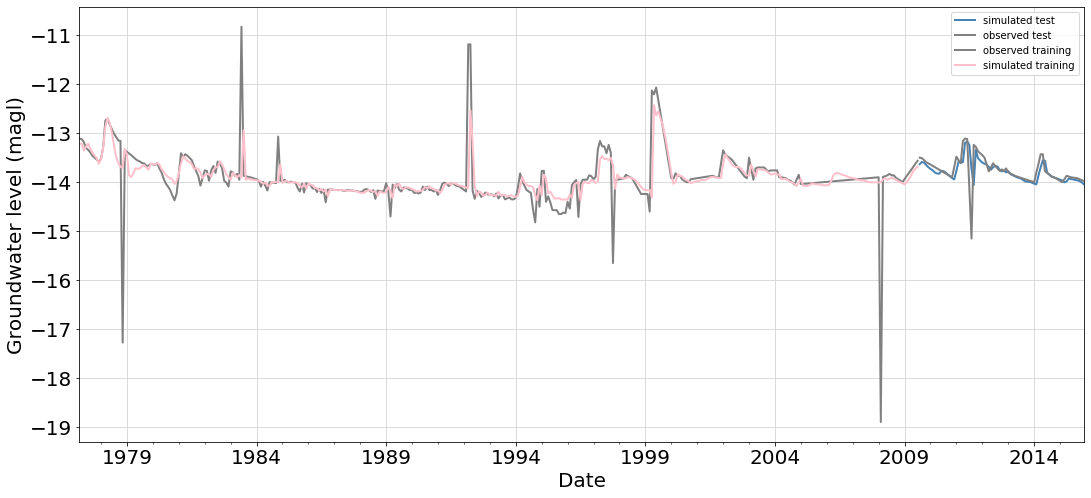

In [65]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[389:466].index)
df1['observed test']      = pima.iloc[389:466, 0].values

df2 = pd.DataFrame(pima.iloc[0:389, 0].values, columns = ['observed training'],index =pima.iloc[0:389].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [66]:
y_gru = out_df['simulated test']

### FFNN

In [71]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)
    model = Sequential()
    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(77, 6)

    #running function
    gwl = 0.74532449
    test_forecast = X_test
    steps_ahead = 77
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(389, 6)
Train on 389 samples, validate on 77 samples
Epoch 1/1000
 96/389 [======>.......................] - ETA: 2s - loss: 1.5989 - mean_squared_error: 1.5989
Epoch 00001: val_loss improved from inf to 0.45674, saving model to model.h5
389/389 [==============================] - 6s 15ms/sample - loss: 1.1748 - mean_squared_error: 1.1881 - val_loss: 0.4567 - val_mean_squared_error: 0.4567
Epoch 2/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7195 - mean_squared_error: 0.7195
Epoch 00002: val_loss improved from 0.45674 to 0.42241, saving model to model.h5
389/389 [==============================] - 0s 160us/sample - loss: 1.1504 - mean_squared_error: 1.1556 - val_loss: 0.4224 - val_mean_squared_error: 0.4224
Epoch 3/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.7356 - mean_squared_error: 1.7356
Epoch 00003: val_loss improved from 0.42241 to 0.40612, saving model to model.h5
389/389 [==============================] - 0s 171us/sample 

Epoch 52/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.3497 - mean_squared_error: 1.3497
Epoch 00052: val_loss improved from 0.33727 to 0.33495, saving model to model.h5
389/389 [==============================] - 0s 111us/sample - loss: 1.1336 - mean_squared_error: 1.1342 - val_loss: 0.3349 - val_mean_squared_error: 0.3349
Epoch 53/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5202 - mean_squared_error: 0.5202
Epoch 00053: val_loss did not improve from 0.33495
389/389 [==============================] - 0s 57us/sample - loss: 1.1334 - mean_squared_error: 1.1381 - val_loss: 0.3811 - val_mean_squared_error: 0.3811
Epoch 54/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.5977 - mean_squared_error: 0.5977
Epoch 00054: val_loss did not improve from 0.33495
389/389 [==============================] - 0s 58us/sample - loss: 1.1298 - mean_squared_error: 1.1272 - val_loss: 0.3587 - val_mean_squared_error: 0.3587
Epoch 55/1000
 96/389 [====

Epoch 78/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6427 - mean_squared_error: 0.6427
Epoch 00078: val_loss did not improve from 0.32962
389/389 [==============================] - 0s 116us/sample - loss: 1.1317 - mean_squared_error: 1.1431 - val_loss: 0.3849 - val_mean_squared_error: 0.3849
Epoch 79/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.2311 - mean_squared_error: 2.2311
Epoch 00079: val_loss did not improve from 0.32962
389/389 [==============================] - 0s 71us/sample - loss: 1.1306 - mean_squared_error: 1.1400 - val_loss: 0.3772 - val_mean_squared_error: 0.3772
Epoch 80/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4155 - mean_squared_error: 0.4155
Epoch 00080: val_loss did not improve from 0.32962
389/389 [==============================] - 0s 66us/sample - loss: 1.1320 - mean_squared_error: 1.1348 - val_loss: 0.3443 - val_mean_squared_error: 0.3443
Epoch 81/1000
 96/389 [======>.......................] - 

Epoch 130/1000
 96/389 [======>.......................] - ETA: 0s - loss: 2.6529 - mean_squared_error: 2.6529
Epoch 00130: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 58us/sample - loss: 1.1294 - mean_squared_error: 1.1395 - val_loss: 0.3739 - val_mean_squared_error: 0.3739
Epoch 131/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.6255 - mean_squared_error: 0.6255
Epoch 00131: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 53us/sample - loss: 1.1299 - mean_squared_error: 1.1431 - val_loss: 0.3801 - val_mean_squared_error: 0.3801
Epoch 132/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.2438 - mean_squared_error: 1.2438
Epoch 00132: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 56us/sample - loss: 1.1310 - mean_squared_error: 1.1425 - val_loss: 0.3698 - val_mean_squared_error: 0.3698
Epoch 133/1000
 96/389 [======>.......................]

 96/389 [======>.......................] - ETA: 0s - loss: 1.6836 - mean_squared_error: 1.6836
Epoch 00156: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 54us/sample - loss: 1.1296 - mean_squared_error: 1.1394 - val_loss: 0.3382 - val_mean_squared_error: 0.3382
Epoch 157/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.7211 - mean_squared_error: 0.7211
Epoch 00157: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 58us/sample - loss: 1.1300 - mean_squared_error: 1.1427 - val_loss: 0.3617 - val_mean_squared_error: 0.3617
Epoch 158/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.4496 - mean_squared_error: 0.4496
Epoch 00158: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 64us/sample - loss: 1.1288 - mean_squared_error: 1.1424 - val_loss: 0.3787 - val_mean_squared_error: 0.3787
Epoch 159/1000
 96/389 [======>.......................] - ETA: 0s - lo

 96/389 [======>.......................] - ETA: 0s - loss: 1.7006 - mean_squared_error: 1.7006
Epoch 00208: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 57us/sample - loss: 1.1291 - mean_squared_error: 1.1412 - val_loss: 0.3623 - val_mean_squared_error: 0.3623
Epoch 209/1000
 96/389 [======>.......................] - ETA: 0s - loss: 0.9014 - mean_squared_error: 0.9014
Epoch 00209: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 53us/sample - loss: 1.1302 - mean_squared_error: 1.1349 - val_loss: 0.3800 - val_mean_squared_error: 0.3800
Epoch 210/1000
 96/389 [======>.......................] - ETA: 0s - loss: 1.4884 - mean_squared_error: 1.4884
Epoch 00210: val_loss did not improve from 0.32754
389/389 [==============================] - 0s 75us/sample - loss: 1.1336 - mean_squared_error: 1.0392 - val_loss: 0.4214 - val_mean_squared_error: 0.4214
Epoch 211/1000
 96/389 [======>.......................] - ETA: 0s - lo

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
summary

In [ ]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:389, 6].values

In [ ]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[389:466, 6].values

In [ ]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:389]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[389:466]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

In [ ]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[389:466].index)
df1['observed test']      = pima.iloc[389:466, 0].values

df2 = pd.DataFrame(pima.iloc[0:389, 0].values, columns = ['observed training'],index =pima.iloc[0:389].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [ ]:
y_ff = out_df['simulated test']

## Static Models

In [72]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','2526CC00033']]

In [73]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['2526CC00033'].values
y = y.reshape(-1,1)

In [74]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(389, 6) (389, 1)
(77, 6) (77, 1)


In [75]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [76]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(389, 6)
Running fold 2
(389, 6)
Running fold 3
(389, 6)
Running fold 4
(389, 6)
Running fold 5
(389, 6)
Running fold 6
(389, 6)
Running fold 7
(389, 6)
Running fold 8
(389, 6)
Running fold 9
(389, 6)
Running fold 10
(389, 6)


In [77]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.454    0.674 -5.088   0.261
1   Iteration_2   0.408    0.639 -4.476   0.207
2   Iteration_3   0.452    0.672 -5.068   0.262
3   Iteration_4   0.453    0.673 -5.083   0.262
4   Iteration_5   0.409    0.639 -4.484   0.208
5   Iteration_6   0.406    0.637 -4.444   0.208
6   Iteration_7   0.454    0.674 -5.091   0.259
7   Iteration_8   0.403    0.635 -4.414   0.200
8   Iteration_9   0.410    0.640 -4.503   0.213
9  Iteration_10   0.412    0.642 -4.533   0.211

In [78]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:389, 6].values

In [79]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  -4.718
Mean squared error is: 0.426
Root mean squared error is: 0.653
Mean absolute error is: 0.229


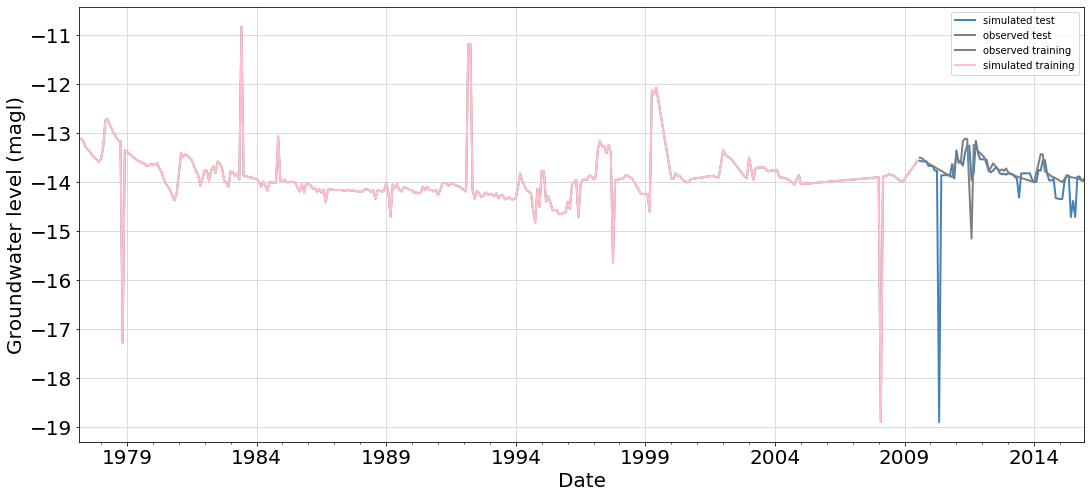

In [80]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[389:466].index)
df1['observed test']      = pima.iloc[389:466, 0].values

df2 = pd.DataFrame(pima.iloc[0:389, 0].values, columns = ['observed training'],index =pima.iloc[0:389].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [81]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(389, 6)
Running fold 2
(389, 6)
Running fold 3
(389, 6)
Running fold 4
(389, 6)
Running fold 5
(389, 6)
Running fold 6
(389, 6)
Running fold 7
(389, 6)
Running fold 8
(389, 6)
Running fold 9
(389, 6)
Running fold 10
(389, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [82]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.051     0.226   0.314    0.091
1   Iteration_2    0.051     0.226   0.314    0.091
2   Iteration_3    0.051     0.226   0.314    0.091
3   Iteration_4    0.051     0.226   0.314    0.091
4   Iteration_5    0.051     0.226   0.314    0.091
5   Iteration_6    0.051     0.226   0.314    0.091
6   Iteration_7    0.051     0.226   0.314    0.091
7   Iteration_8    0.051     0.226   0.314    0.091
8   Iteration_9    0.051     0.226   0.314    0.091
9  Iteration_10    0.051     0.226   0.314    0.091

In [83]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:389, 6].values

In [84]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.208
Root mean squared error is: 0.456
Mean absolute error is: 0.144
R^2 score is:  0.315

The model performance for the test set
--------------------------------------
R^2 score is:  0.314
Mean squared error is: 0.051
Root mean squared error is: 0.226
Mean absolute error is: 0.091


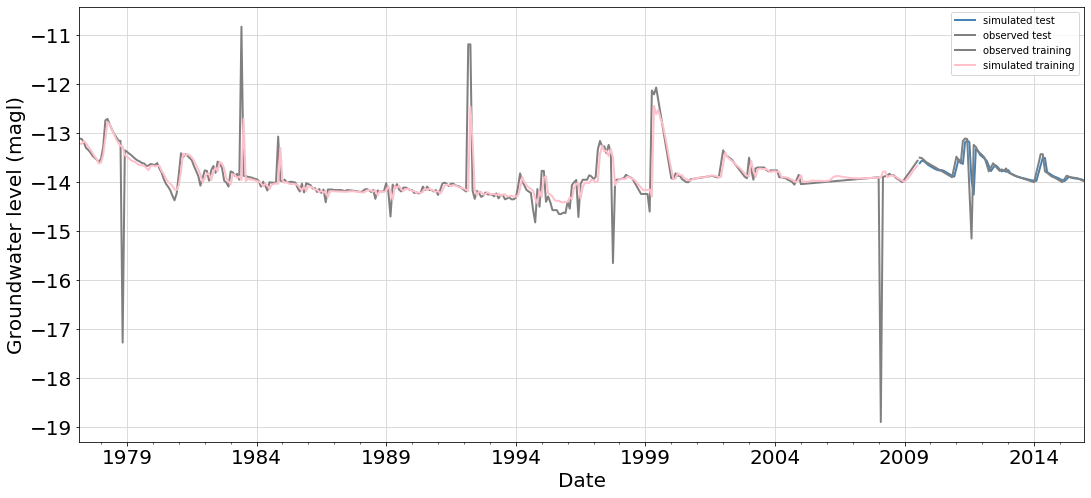

In [85]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[389:466].index)
df1['observed test']      = pima.iloc[389:466, 0].values

df2 = pd.DataFrame(pima.iloc[0:389, 0].values, columns = ['observed training'],index =pima.iloc[0:389].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(389, 6)
Running fold 2
(389, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 3
(389, 6)
Running fold 4
(389, 6)
Running fold 5
(389, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 6
(389, 6)
Running fold 7
(389, 6)
Running fold 8
(389, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 9
(389, 6)
Running fold 10
(389, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [87]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.065    0.254  0.132   0.139
1   Iteration_2   0.064    0.253  0.142   0.138
2   Iteration_3   0.064    0.253  0.141   0.139
3   Iteration_4   0.065    0.254  0.131   0.139
4   Iteration_5   0.063    0.252  0.148   0.137
5   Iteration_6   0.064    0.253  0.144   0.138
6   Iteration_7   0.064    0.253  0.141   0.138
7   Iteration_8   0.064    0.253  0.141   0.138
8   Iteration_9   0.064    0.253  0.142   0.138
9  Iteration_10   0.064    0.254  0.137   0.139

In [88]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:389, 6].values

In [89]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.02
Root mean squared error is: 0.141
Mean absolute error is: 0.077
R^2 score is:  0.934

The model performance for the test set
--------------------------------------
R^2 score is:  0.14
Mean squared error is: 0.064
Root mean squared error is: 0.253
Mean absolute error is: 0.138


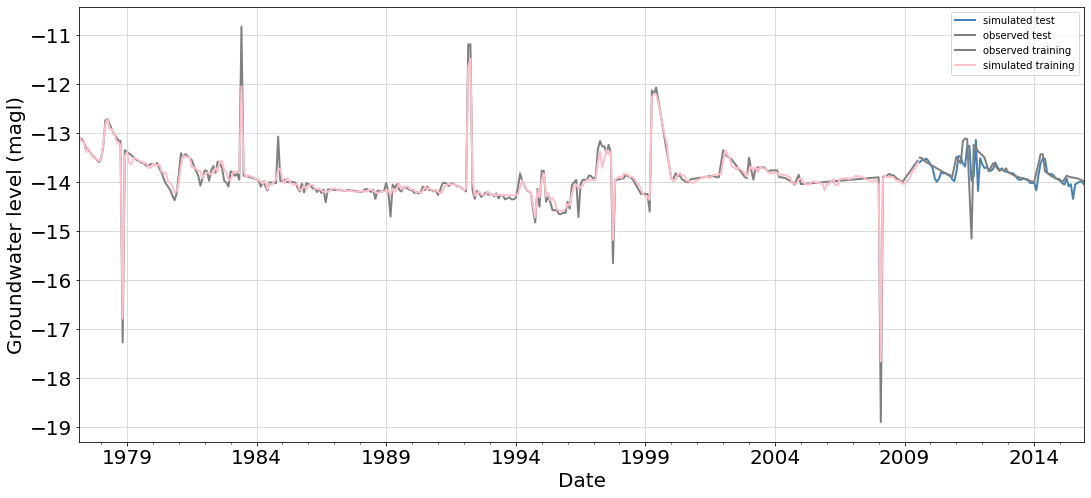

In [90]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[389:466].index)
df1['observed test']      = pima.iloc[389:466, 0].values

df2 = pd.DataFrame(pima.iloc[0:389, 0].values, columns = ['observed training'],index =pima.iloc[0:389].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(389, 6)
Running fold 2
(389, 6)
Running fold 3
(389, 6)
Running fold 4
(389, 6)
Running fold 5
(389, 6)
Running fold 6
(389, 6)
Running fold 7
(389, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 8
(389, 6)
Running fold 9
(389, 6)
Running fold 10
(389, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [92]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.106    0.325 -0.418   0.180
1   Iteration_2   0.058    0.240  0.226   0.121
2   Iteration_3   0.065    0.255  0.125   0.144
3   Iteration_4   0.197    0.444 -1.648   0.213
4   Iteration_5   0.095    0.308 -0.274   0.157
5   Iteration_6   0.103    0.321 -0.387   0.204
6   Iteration_7   0.106    0.325 -0.416   0.172
7   Iteration_8   0.093    0.305 -0.245   0.160
8   Iteration_9   0.132    0.363 -0.769   0.180
9  Iteration_10   0.103    0.321 -0.385   0.153

In [93]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:389, 6].values

In [94]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.02
Root mean squared error is: 0.141
Mean absolute error is: 0.077
R^2 score is:  0.934

The model performance for the test set
--------------------------------------
R^2 score is:  -0.419
Mean squared error is: 0.106
Root mean squared error is: 0.321
Mean absolute error is: 0.168


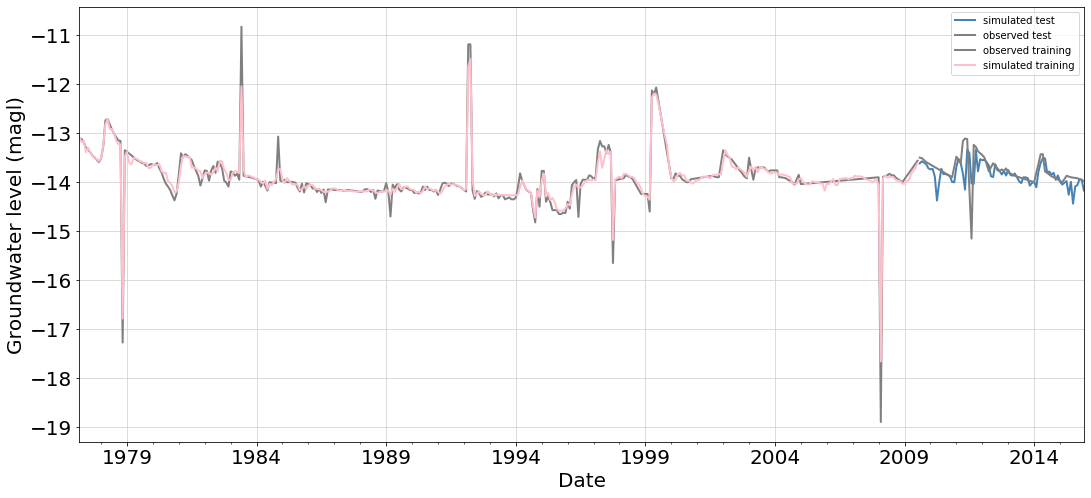

In [95]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[389:466].index)
df1['observed test']      = pima.iloc[389:466, 0].values

df2 = pd.DataFrame(pima.iloc[0:389, 0].values, columns = ['observed training'],index =pima.iloc[0:389].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [96]:
vs = pd.DataFrame(pima.iloc[389:466, 0].values, columns = ['Observed'],index =pima.iloc[389:466].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

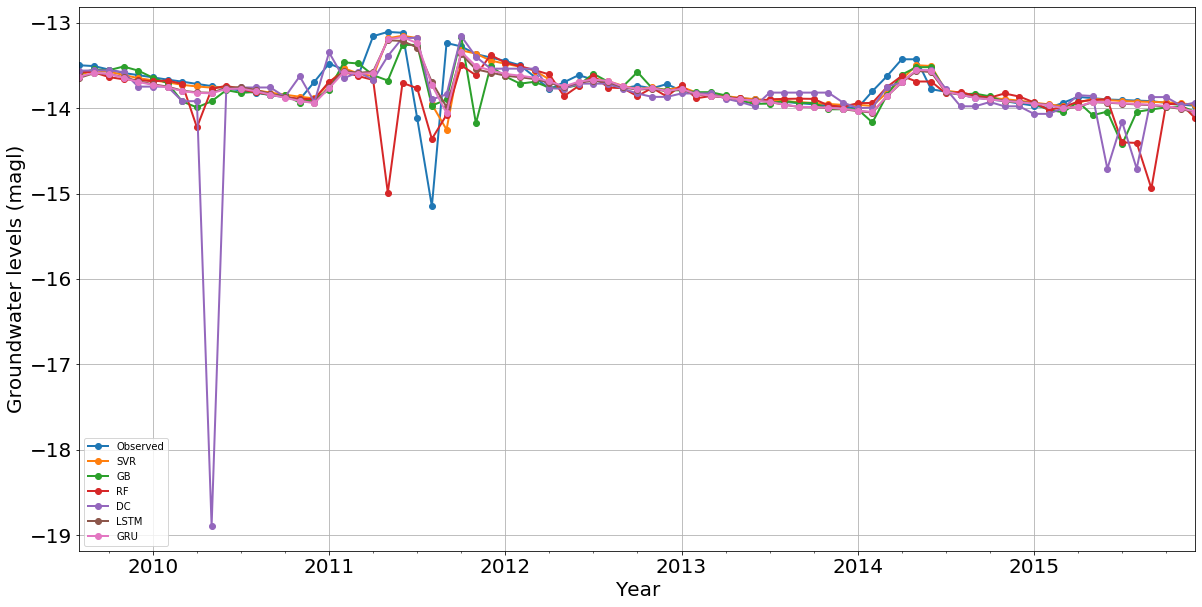

In [97]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)